# Proyecto 03 - Sistemas de Recomendación

## Dataset: STEAM

**Descargar el dataset de [aquí](https://github.com/kang205/SASRec). Son dos archivos, uno de calificaciones y otro de información sobre los juegos.**

---
---
---

# **STEAM**

---
## **1- Entendimiento del negocio**
---

Steam es una plataforma de distribución digital de videojuegos desarrollada por Valve Corporation. Fue lanzada en septiembre de 2003 como una forma para Valve de proveer actualizaciones automáticas a sus juegos, pero finalmente se amplió para incluir juegos que no son de Valve sino de terceros. Steam ofrece protección contra piratería1​2​, servidores de emparejamiento, transmisiones de vídeo y servicios de redes sociales. También proporciona al usuario la instalación y la actualización automática de juegos y características de comunidad como grupos y listas de amigos, guardado en la nube, voz en el juego y funcionalidad de chat.

Se utiliza tanto por pequeños desarrolladores independientes como grandes corporaciones de software para la distribución de videojuegos y material multimedia relacionado.

Para poder disfrutar de todos estos servicios, es necesario estar registrado en el servicio mediante la creación de una cuenta gratuita, a la que se vinculan los videojuegos comprados por el jugador. Estos juegos pueden ser tanto los juegos que se ofrecen para la compra en la propia plataforma como ciertos juegos comprados en tiendas físicas. 

### **Objetivos de negocio**

* Implementar un Sistema de Recomendación para videojuegos de la plataforma Steam.

### **Objetivos de minería de datos**

* Explorar los datasets, limpiar los datos, identificar las columnas que sean de utilidad, etc.
* Crear una matriz de utilidad a partir de los datasets de Reviews y de Juegos de la plataforma

### **Plan de proceso**

Crear un modelo de Machine Learning que, dadas los gustos de cada usuario, pueda realizar recomendaciones al mismo.

Responder o intentar responder las siguientes preguntas:
1. ¿Todas las columnas presentan información relevante?
1. ¿Puedo mezclar los datos de diversas columnas en una para reducir la dimension de los datasets?
1. ¿Puedo otorgarle un valor al texto de la review?
1. ¿Puedo elaborar un sistema de recomendacion basado en contenido? ¿ Y uno colaborativo? ¿Puedo evaluar cuál es mejor?
1. ¿Puedo elaborar un sistema de recomendacion hibrido, es decir, basado en contenido como colaborativo?
1. ¿Cuáles son los generos más populares? ¿Y las especificaciones?


---
## **2- Entendimiento de los datos**
---

En esta sección exploraremos los datasets.

### **Recoleción y descripción de los datos**

In [1]:
import gzip
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime
import random

def parse(path):
    g = gzip.open(path, 'r')
    for l in g:
        yield eval(l)

#### **Reviews**

In [22]:
contador = 0
data_reviews = []
# Vamos a guardar una de cada 10 reviews para no llenar la memoria RAM. Si pones n = 3, 
# abrira uno de cada tres, y asi.
n = 10
for l in parse('steam_reviews.json.gz'):
    if contador%n == 0:
        data_reviews.append(l)
    else:
        pass
    contador += 1


In [23]:
data_reviews = pd.DataFrame(data_reviews)

In [24]:
print("\nEl dataset tiene {} filas y {} columnas\n".format(data_reviews.shape[0],data_reviews.shape[1]))


El dataset tiene 779307 filas y 13 columnas



In [25]:
data_reviews.head(5)

,username,product_id,page_order,text,hours,recommended,products,date,early_access,page,user_id,compensation,found_funny
0,Chaos Syren,725280,0,This would not be acceptable as an entertainme...,0.1,True,41.0,2017-12-17,False,1,NaN,NaN,NaN
1,Ariman1,328100,2,Addictive RPG ! Works fine on linux though it ...,13.2,True,1386.0,2017-08-02,False,1,NaN,NaN,NaN
2,freakfantom,725280,5,Прикольная стрелялка. Взял дешево на распродаже.,0.1,True,1706.0,2017-11-12,False,1,NaN,NaN,NaN
3,The_Cpt_FROGGY,631920,0,Somewhere on Zibylon:\n~~~~~~~~~~~~~~~~~~\nZib...,7.8,True,2217.0,2017-12-11,False,1,76561198003030375,Product received for free,NaN
4,the_maker988,35140,7,"This game was way to linear for me, and compar...",8.2,True,18.0,2018-01-02,False,1,76561198353396844,NaN,NaN


In [26]:
data_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779307 entries, 0 to 779306
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   username      779307 non-null  object 
 1   product_id    779307 non-null  object 
 2   page_order    779307 non-null  int64  
 3   text          779307 non-null  object 
 4   hours         776670 non-null  float64
 5   recommended   779307 non-null  bool   
 6   products      777741 non-null  float64
 7   date          779307 non-null  object 
 8   early_access  779307 non-null  bool   
 9   page          779307 non-null  int64  
 10  user_id       317340 non-null  object 
 11  compensation  14588 non-null   object 
 12  found_funny   120164 non-null  float64
dtypes: bool(2), float64(3), int64(2), object(6)
memory usage: 66.9+ MB


In [27]:
data_reviews.isna().sum()

username             0
product_id           0
page_order           0
text                 0
hours             2637
recommended          0
products          1566
date                 0
early_access         0
page                 0
user_id         461967
compensation    764719
found_funny     659143
dtype: int64

In [28]:
print(data_reviews.groupby('compensation').agg({'compensation': 'count'}))
print(data_reviews.groupby('found_funny').agg({'found_funny': 'count'}))
print(data_reviews.groupby('early_access').agg({'early_access': 'count'}))

                           compensation
compensation                           
Product received for free         14588
             found_funny
found_funny             
1.0                70119
2.0                19612
3.0                 8487
4.0                 4859
5.0                 2909
...                  ...
4051.0                 1
4080.0                 1
6106.0                 1
6277.0                 1
6524.0                 1

[634 rows x 1 columns]
              early_access
early_access              
False               671616
True                107691


In [29]:
data_reviews.nunique()

username        540341
product_id       12665
page_order          10
text            718779
hours            21762
recommended          1
products          3926
date              2617
early_access         2
page             18368
user_id         262058
compensation         1
found_funny        634
dtype: int64

Por lo tanto, observando las columnas del dataset y analizando con los metodos info() deducimos loo siguiente:

0. **username:** Nombre del usuario que realizó la review. (Texto)
1. **product_id:** ID del juego que fué calificado. (Numérica discreta)
2. **page_order:** Número de página de la review. (Numérica discreta)
3. **text:** Texto de la review. (Texto)
4. **hours:** Horas jugadas por el usuario al momento de realizar la review. (Numérica continua)
5. **recommended:** Si recomienda el juego o no. (Booleana)
6. **products:** Cantidad de productos. (Numérica discreta)
7. **date:** Fecha de la review. (Fecha)
8. **early_access:** Si el usuario realizó la review en un early access del juego. (Boolenana)
9. **page:** Número de página. (Numérica discreta)
10. **user_id:** ID del usuario. (Numérica discreta)
11. **compensation:** Si hubo compensación o  no. (Booleana, los valores son nulos o "Product received for free")
12. **found_funny:** A cuantos usuarios la review les divertio. (Numerica discreta)


Entonces, analizando el dataset review, considero que los pasos a seguir seran los siguientes:

* Transformar todas las variables de tipo object, a un tipo que sea congruente con la informacion que contiene. Por ejemplo fecha, entero, etc.
* Considerar que los valores nulos de en las categorias found_funny pueden llegar a ser reemplazados por un cero, indicando que todavia ningun usuario marco como divertida la review.
* Las variables compensation y early access pueden ser reemplazados por valores booleanos, y de esta manera eliminariamos los valores faltantes.
* No hay la misma cantidad de nombres de usuarios como de id de usuarios, lo que resulta raro, sabiendo que a cada usuario le corresponde un ID.
* Hay reviews que no indican la hora jugada, esto puedo indicar que se realizo la review sin haber sido jugado primero, se analizara si estos juegos coinciden con los que contengan un valor en la columna product nulo. Indicando que el juego no fue ni vendido ni jugado pero que se le realizo una review de igual manera.
* Analizar la relación entre el texto de la review con la cantidad de horas jugadas y si recomienda o no el juego.
* Los valores que toma la categoria recommended son todos los mismos, por lo que notamos que este dataset contiene solo reviews de usuarios que recomiendan el juego y podemos eliminar la categoria ya que todos sus valores son los mismos.

#### **Games**

In [30]:
data_games = []
for l in parse('steam_games.json.gz'):
    data_games.append(l)
data_games = pd.DataFrame(data_games)

In [31]:
print("\nEl dataset tiene {} filas y {} columnas\n".format(data_games.shape[0],data_games.shape[1]))


El dataset tiene 32135 filas y 16 columnas



In [32]:
data_games.head(5)

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",4.49,http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,False,761140,Kotoshiro,NaN,NaN
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",NaN,http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,643980,Secret Level SRL,Mostly Positive,NaN
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",NaN,http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,670290,Poolians.com,Mostly Positive,NaN
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",0.83,http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,False,767400,彼岸领域,NaN,NaN
4,NaN,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaN,"[Action, Indie, Casual, Sports]",1.79,http://steamcommunity.com/app/773570/reviews/?...,"[Single-player, Full controller support, HTC V...",2.99,False,773570,NaN,NaN,NaN


In [33]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32135 entries, 0 to 32134
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   publisher       24083 non-null  object 
 1   genres          28852 non-null  object 
 2   app_name        32133 non-null  object 
 3   title           30085 non-null  object 
 4   url             32135 non-null  object 
 5   release_date    30068 non-null  object 
 6   tags            31972 non-null  object 
 7   discount_price  225 non-null    float64
 8   reviews_url     32133 non-null  object 
 9   specs           31465 non-null  object 
 10  price           30758 non-null  object 
 11  early_access    32135 non-null  bool   
 12  id              32133 non-null  object 
 13  developer       28836 non-null  object 
 14  sentiment       24953 non-null  object 
 15  metascore       2677 non-null   object 
dtypes: bool(1), float64(1), object(14)
memory usage: 3.7+ MB


In [34]:
data_games.isna().sum()

publisher          8052
genres             3283
app_name              2
title              2050
url                   0
release_date       2067
tags                163
discount_price    31910
reviews_url           2
specs               670
price              1377
early_access          0
id                    2
developer          3299
sentiment          7182
metascore         29458
dtype: int64

In [35]:
app_name_equals_title = []
for i in data_games.index:
    app_name_equals_title.append(data_games.app_name[i] == data_games.title[i])
    
print("La cantidad de valores de app_name iguales a title es de: ",app_name_equals_title.count(True))
print("La cantidad de valores de app_name distintos a title es de: ",app_name_equals_title.count(False))
print('\nEl {}% de los valores de title son iguales a los de app_name.\n'.format((app_name_equals_title.count(True)/(app_name_equals_title.count(True)+app_name_equals_title.count(False))*100)))


La cantidad de valores de app_name iguales a title es de:  29530
La cantidad de valores de app_name distintos a title es de:  2605

El 91.89357398475182% de los valores de title son iguales a los de app_name.



In [36]:
print(data_games.groupby('sentiment').agg({'sentiment': 'count'}))
print(data_games.groupby('metascore').agg({'metascore': 'count'}))
print(data_games.groupby('early_access').agg({'early_access': 'count'}))

                         sentiment
sentiment                         
1 user reviews                2496
2 user reviews                1756
3 user reviews                1231
4 user reviews                 964
5 user reviews                 846
6 user reviews                 756
7 user reviews                 619
8 user reviews                 537
9 user reviews                 488
Mixed                         4103
Mostly Negative                802
Mostly Positive               2744
Negative                       123
Overwhelmingly Negative          7
Overwhelmingly Positive        303
Positive                      3281
Very Negative                   29
Very Positive                 3868
           metascore
metascore           
20                 1
24                 1
27                 1
29                 1
30                 1
...              ...
93                 6
94                 9
95                 1
96                 4
NA                70

[71 rows x 1 columns]
    

Por lo tanto, observando las columnas del dataset y analizando con los metodos info() deducimos lo siguiente:

0. **publisher:** Nombre del publicador del juego. (Texto)
1. **genres:** Generos del juego. (Texto)
2. **app_name:** Nombre de la aplicacion. (Texto)
3. **title:** Titulo del juego. (Texto)
4. **url:** Link a la pagina del juego en steam. (Texto)
5. **release_date:** Fecha de lanzamiento del juego. (Fecha)
6. **tags:** Tags con lo que se describe al juego. (Texto)
7. **discount_price:** Precio de descuento del juego. (Numerica continua)
8. **reviews_url:** Link hacia la pagina de steam con las reviews del juego. (Texto)
9. **specs:** Especificaciones del juego. (Texto)
10. **price:** Precio del juego. (Numerica continua)
11. **early_access:** Si hubo un early access al juego. (Booleana)
12. **id:** ID del juego. (Numerica discreta)
13. **developer:** Desarrolllador del juego. (Texto)
14. **sentiment:** Sentimientos sobre el juego. (Categorica ordinal - va desde Overwhelmingly Negative a Overwhelmingly Positive)
15. **metascore:** Calificacion del juego en metascore. (Numerica discreta - toma valores de 0 a 100)


Entonces, analizando el dataset games, considero que los pasos a seguir seran los siguientes:

* Transformar todas las variables de tipo object, a un tipo que sea congruente con la informacion que contiene. Por ejemplo fecha, entero, etc.
* Las variables genres, specs y tags toman valores similares y todas contienen información que considero que deben ser tratadas de alguna manera para darles algún valor categórico.
* Buscar algo que me indique que puede llegar a indicar que representan los valores  de 'n user review' en la variable sentiment.
* Analizar si la variable early_access tiene alguna correlación con las variables sentiment o el valor el metascore, posiblemente un juego en early access tenga mas bugs, glitches, errores; por lo que puede estar más propenso a malas críticas.
* Analizar la relación entre las variable app_name y title, supongo que son "iguales" ya que el 92% se sus valores son exactamente iguales, y creo que el resto que no son los mismo se puede deber a que alguno de los dos tenga un valor nulo y el otro sea el que contenga el nombre del juego.
* Buscar cuantos de los juegos tienen el mismo publicador y desarrollador.
* La fecha de lanzamiento del juego puede influir de alguna manera en la critica de un juego? O quizas puede indicar una categoria, como por ejemplo "Nuevo", "Viejo", etc. Los gustos de algunos usuarios puede estar basado en la antiguedad del juego.




### **Verificar la calidad de los datos**

#### **Reviews**

In [37]:
data_reviews.count()

username        779307
product_id      779307
page_order      779307
text            779307
hours           776670
recommended     779307
products        777741
date            779307
early_access    779307
page            779307
user_id         317340
compensation     14588
found_funny     120164
dtype: int64

In [38]:
data_reviews.isnull().sum()

username             0
product_id           0
page_order           0
text                 0
hours             2637
recommended          0
products          1566
date                 0
early_access         0
page                 0
user_id         461967
compensation    764719
found_funny     659143
dtype: int64

In [39]:
print("El porcentaje de valores nulos en la variable 'hours' es del {}%".format((data_reviews.hours.isnull().sum()/779307)*100))
print("El porcentaje de valores nulos en la variable 'products' es del {}%".format((data_reviews.products.isnull().sum()/779307)*100))
print("El porcentaje de valores nulos en la variable 'user_id' es del {}%".format((data_reviews.user_id.isnull().sum()/779307)*100))
print("El porcentaje de valores nulos en la variable 'compensation' es del {}%".format((data_reviews.compensation.isnull().sum()/779307)*100))
print("El porcentaje de valores nulos en la variable 'found_funny' es del {}%".format((data_reviews.found_funny.isnull().sum()/779307)*100))

El porcentaje de valores nulos en la variable 'hours' es del 0.33837755852314944%
El porcentaje de valores nulos en la variable 'products' es del 0.2009477651297884%
El porcentaje de valores nulos en la variable 'user_id' es del 59.27920575588311%
El porcentaje de valores nulos en la variable 'compensation' es del 98.1280804612303%
El porcentaje de valores nulos en la variable 'found_funny' es del 84.5806594833615%


Las comlumnas user_id, compensation y found_funny tienen más del 50% de sus valores nulos y consideramos que no aportan información relevante para el análisis que se va a realizar. User_id deja de ser relavante también ya que contamos con la variable username, la cual no contiene instancias de valores nulos.

Los valores nulos de las columnas hours y products son practicamente irrelevantes en relación a la cantidad de instancias del dataset, por lo que para simplificar el trabajo a realizar, se los puede eliminar y no estaríamos realizando una modificación sustancial a los datos.

#### **Games**

In [40]:
data_games.count()

publisher         24083
genres            28852
app_name          32133
title             30085
url               32135
release_date      30068
tags              31972
discount_price      225
reviews_url       32133
specs             31465
price             30758
early_access      32135
id                32133
developer         28836
sentiment         24953
metascore          2677
dtype: int64

In [41]:
data_games.isnull().sum()

publisher          8052
genres             3283
app_name              2
title              2050
url                   0
release_date       2067
tags                163
discount_price    31910
reviews_url           2
specs               670
price              1377
early_access          0
id                    2
developer          3299
sentiment          7182
metascore         29458
dtype: int64

In [42]:
print("El porcentaje de valores nulos en la variable 'publisher' es del {}%".format((data_games.publisher.isnull().sum()/32135)*100))
print("El porcentaje de valores nulos en la variable 'genres' es del {}%".format((data_games.genres.isnull().sum()/32135)*100))
print("El porcentaje de valores nulos en la variable 'app_name' es del {}%".format((data_games.app_name.isnull().sum()/32135)*100))
print("El porcentaje de valores nulos en la variable 'title' es del {}%".format((data_games.title.isnull().sum()/32135)*100))
print("El porcentaje de valores nulos en la variable 'release_date' es del {}%".format((data_games.release_date.isnull().sum()/32135)*100))
print("El porcentaje de valores nulos en la variable 'tags' es del {}%".format((data_games.tags.isnull().sum()/32135)*100))
print("El porcentaje de valores nulos en la variable 'discount_price' es del {}%".format((data_games.discount_price.isnull().sum()/32135)*100))
print("El porcentaje de valores nulos en la variable 'reviews_url' es del {}%".format((data_games.reviews_url.isnull().sum()/32135)*100))
print("El porcentaje de valores nulos en la variable 'specs' es del {}%".format((data_games.specs.isnull().sum()/32135)*100))
print("El porcentaje de valores nulos en la variable 'price' es del {}%".format((data_games.price.isnull().sum()/32135)*100))
print("El porcentaje de valores nulos en la variable 'id' es del {}%".format((data_games.id.isnull().sum()/32135)*100))
print("El porcentaje de valores nulos en la variable 'developer' es del {}%".format((data_games.developer.isnull().sum()/32135)*100))
print("El porcentaje de valores nulos en la variable 'sentiment' es del {}%".format((data_games.sentiment.isnull().sum()/32135)*100))
print("El porcentaje de valores nulos en la variable 'metascore' es del {}%".format((data_games.metascore.isnull().sum()/32135)*100))

El porcentaje de valores nulos en la variable 'publisher' es del 25.056791660183602%
El porcentaje de valores nulos en la variable 'genres' es del 10.216275089466315%
El porcentaje de valores nulos en la variable 'app_name' es del 0.006223743581764431%
El porcentaje de valores nulos en la variable 'title' es del 6.379337171308543%
El porcentaje de valores nulos en la variable 'release_date' es del 6.4322389917535405%
El porcentaje de valores nulos en la variable 'tags' es del 0.5072351019138012%
El porcentaje de valores nulos en la variable 'discount_price' es del 99.2998288470515%
El porcentaje de valores nulos en la variable 'reviews_url' es del 0.006223743581764431%
El porcentaje de valores nulos en la variable 'specs' es del 2.0849540998910845%
El porcentaje de valores nulos en la variable 'price' es del 4.285047456044811%
El porcentaje de valores nulos en la variable 'id' es del 0.006223743581764431%
El porcentaje de valores nulos en la variable 'developer' es del 10.2660650381204

La variable metascore tiene más del 90% de sus valores nulos, por lo que podemos eliminar la variable ya que contiene demasiadas instancias nulas. También la podemos reemplazar por algún tipo de variable categórica. Metascore es el puntaje que la página metacritic le da a a ciertas cosas, en este caso a los videojuegos. Éstas críticas en general se dan en juegos que son más pópulares. Por lo que la categoría metascore se podría reemplazar por alguna que indique la popularidad o algo similar. No consideramos que la cantidad de instancias nulas en esta categoría sea algo anormal.

Las variables genres, tags y specs es posible que las combinemos más adelante de alguna manera por lo que no consideramos tener en cuenta la cantidad de valores nulos de cada una.

La cantidad de valores nulos en discount price es casi del 100% entonces creemos que la mejor opción sería eliminarlo, también consideramos que el descuento no influye tanto en la valoración de un juego como si lo hacen otros factores técnicos del mismo o la variable price. El descuento puedo influir a la hora de comprarlo, pero no tanto como a la hora de calificarlo.

La variable price tiene 4.3% de instancias nulas, las cuales podrían eliminarse ya que no es una cantidad elevada de instancias nulas y sabemos que el precio de un producto puedo influir de manera que el usuario suele pensar en la relación precio/calidad en los productos. 

Las intancias nulas de reviews_url podrian reemplazarse transformando la variable en una categórica que indique si tiene o no reviews.

Las instancias nulas de id consideramos correcto eliminarlas ya que sin el id del juego no podremos conectar el dataset de games con el de reviews y también porque solamente representan el 0.006% de las instancias.

Las instancias de valores nulos de publisher y price se analizarán de manera más exhaustiva más adelante ya que consideramos que están fuertemente relacionadas ya que un desarrollador de videojuegos también puede ser el publicador del mismo.

---
## **3- Preparación de los datos**
---

### **Reviews**

#### **Seleccion de los datos**

Para explorar de mejor manera los datos, primero realizaremos las transformaciones de variables de tipo object a los respectivos tipos que nombramos previamente.

In [43]:
data_reviews['username']=data_reviews['username'].astype('string')
data_reviews['product_id']=data_reviews['product_id'].apply(pd.to_numeric)
data_reviews['text']=data_reviews['text'].astype('string')
data_reviews['date']=pd.to_datetime(data_reviews['date'], format='%Y-%m-%d')
data_reviews['user_id']=data_reviews['user_id'].apply(pd.to_numeric)

In [44]:
data_reviews['compensation'] = data_reviews['compensation'].apply(lambda x: 'True' if x == 'Product received for free' else 'False')

In [45]:
import ast
data_reviews['compensation']=data_reviews['compensation'].map(ast.literal_eval)

In [46]:
data_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779307 entries, 0 to 779306
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   username      779307 non-null  string        
 1   product_id    779307 non-null  int64         
 2   page_order    779307 non-null  int64         
 3   text          779307 non-null  string        
 4   hours         776670 non-null  float64       
 5   recommended   779307 non-null  bool          
 6   products      777741 non-null  float64       
 7   date          779307 non-null  datetime64[ns]
 8   early_access  779307 non-null  bool          
 9   page          779307 non-null  int64         
 10  user_id       317340 non-null  float64       
 11  compensation  779307 non-null  bool          
 12  found_funny   120164 non-null  float64       
dtypes: bool(3), datetime64[ns](1), float64(4), int64(3), string(2)
memory usage: 61.7 MB


In [47]:
data_reviews.head(2)

,username,product_id,page_order,text,hours,recommended,products,date,early_access,page,user_id,compensation,found_funny
0,Chaos Syren,725280,0,This would not be acceptable as an entertainme...,0.1,True,41.0,2017-12-17,False,1,NaN,False,NaN
1,Ariman1,328100,2,Addictive RPG ! Works fine on linux though it ...,13.2,True,1386.0,2017-08-02,False,1,NaN,False,NaN


In [48]:
data_reviews.isnull().sum()

username             0
product_id           0
page_order           0
text                 0
hours             2637
recommended          0
products          1566
date                 0
early_access         0
page                 0
user_id         461967
compensation         0
found_funny     659143
dtype: int64

Realizaremos las siguientes transformaciones comentadas previamente para poder explorar el dataset de una manera mas clara:

* Los valores nulos de en las categorias found_funny, hours y products se reemplazaran por un cero, indicando que todavia ningun usuario marco como divertida la review, que el usuario que realizo la review jugo 0 horas o que todavia no hay productos de ese juego en poder de los usuarios (puede ocurrir que un usuario haya adiquirido un juego y luego realizado una devolucion ya que steam lo permite).
* Las variables compensation y early access se reemplazaron por valores booleanos, y de esta manera eliminamos los valores faltantes.

In [207]:
data_reviews_fill_na = data_reviews.copy()
data_reviews_fill_na = data_reviews_fill_na.fillna({'hours' : 0})
data_reviews_fill_na = data_reviews_fill_na.fillna({'found_funny' : 0})
data_reviews_fill_na = data_reviews_fill_na.fillna({'products' : 0})
data_reviews_fill_na.isnull().sum()

username             0
product_id           0
page_order           0
text                 0
hours                0
recommended          0
products             0
date                 0
early_access         0
page                 0
user_id         461967
compensation         0
found_funny          0
dtype: int64

Necesito que todos los username tengan un user_id relacionado, por lo que trabajare a continuacion con ambas variables. Ya que la columna user_id no se encuentra completa, procedere a eliminarla y crear una columna con un id a cada usuario creado por mi. 

In [50]:
#Creo un dataset con solo la columna username
username_userid = data_reviews_fill_na.iloc[:,[0]]
#Elimino las columnas duplicadas
username_userid = username_userid.drop_duplicates()
#Creo un dicionario con los username el cual tendra asignado un user_id
dict_username_userid = dict(zip(username_userid.username, username_userid.index))
#Creo la columna new_user_id
data_reviews_fill_na['new_user_id'] = np.nan
#Lleno la columna new_user_id a partir del valor que tenga en username
for i in data_reviews_fill_na.index:    
    data_reviews_fill_na.new_user_id[i] = dict_username_userid[data_reviews_fill_na.username[i]]

<ipython-input-50-097171c604c3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_reviews_fill_na.new_user_id[i] = dict_username_userid[data_reviews_fill_na.username[i]]


In [51]:
data_reviews_fill_na.nunique()

username        540341
product_id       12665
page_order          10
text            718779
hours            21762
recommended          1
products          3927
date              2617
early_access         2
page             18368
user_id         259975
compensation         2
found_funny        635
new_user_id     540341
dtype: int64

Por lo tanto ahora tenemos como resultado el mismo dataset pero con un new_user_id asignado a cada uno de los username.

Ahora procederemos explorando los datos:

In [52]:
data_reviews_fill_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779307 entries, 0 to 779306
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   username      779307 non-null  string        
 1   product_id    779307 non-null  int64         
 2   page_order    779307 non-null  int64         
 3   text          779307 non-null  string        
 4   hours         779307 non-null  float64       
 5   recommended   779307 non-null  bool          
 6   products      779307 non-null  float64       
 7   date          779307 non-null  datetime64[ns]
 8   early_access  779307 non-null  bool          
 9   page          779307 non-null  int64         
 10  user_id       317340 non-null  float64       
 11  compensation  779307 non-null  bool          
 12  found_funny   779307 non-null  float64       
 13  new_user_id   779307 non-null  float64       
dtypes: bool(3), datetime64[ns](1), float64(5), int64(3), string(2)
memor

Se encuentran 14 columnas en el dataset, 3 booleanas, 1 de fecha, 8 numericas y 2 de texto. La unica variable con valores nulos es user_id.

In [53]:
data_reviews_fill_na.describe()

,product_id,page_order,hours,products,page,user_id,found_funny,new_user_id
count,779307.000000,779307.000000,779307.000000,779307.000000,779307.000000,3.173400e+05,779307.000000,779307.000000
mean,251489.822053,4.417743,111.465377,236.517702,893.581355,7.656120e+16,1.189313,296413.677955
std,149975.370469,2.897848,389.538884,485.661872,1928.272966,1.007694e+08,28.591400,229309.994969
min,10.000000,0.000000,0.000000,0.000000,1.000000,7.656120e+16,0.000000,0.000000
25%,203770.000000,2.000000,3.900000,45.000000,53.000000,7.656120e+16,0.000000,89859.500000
50%,252490.000000,4.000000,15.200000,110.000000,238.000000,7.656120e+16,0.000000,250179.000000
75%,346110.000000,7.000000,59.300000,246.000000,829.000000,7.656120e+16,0.000000,477624.500000
max,773900.000000,9.000000,28164.000000,13540.000000,18371.000000,7.656120e+16,6524.000000,779306.000000


La media de horas jugadas en juegos que recibieron reviews es de 110 hs pero su desviacion estandar es masomenos 3.5 veces la media, por lo que es una categoria muy variable. 

La categoria found_funny me indica a cuantos usuarios les parecio graciosa la review. Esta tambien es una categoria muy variable debido a que su desviacion estandar es 28 veces la media.

In [54]:
data_reviews_fill_na.nunique()

username        540341
product_id       12665
page_order          10
text            718779
hours            21762
recommended          1
products          3927
date              2617
early_access         2
page             18368
user_id         259975
compensation         2
found_funny        635
new_user_id     540341
dtype: int64

In [55]:
print(data_reviews.groupby('recommended').agg({'recommended': 'count'}))
print(data_reviews.groupby('early_access').agg({'early_access': 'count'}))
print(data_reviews.groupby('compensation').agg({'compensation': 'count'}))

             recommended
recommended             
True              779307
              early_access
early_access              
False               671616
True                107691
              compensation
compensation              
False               764719
True                 14588


In [56]:
data_reviews_fill_na

,username,product_id,page_order,text,hours,recommended,products,date,early_access,page,user_id,compensation,found_funny,new_user_id
0,Chaos Syren,725280,0,This would not be acceptable as an entertainme...,0.1,True,41.0,2017-12-17,False,1,NaN,False,0.0,0.0
1,Ariman1,328100,2,Addictive RPG ! Works fine on linux though it ...,13.2,True,1386.0,2017-08-02,False,1,NaN,False,0.0,1.0
2,freakfantom,725280,5,Прикольная стрелялка. Взял дешево на распродаже.,0.1,True,1706.0,2017-11-12,False,1,NaN,False,0.0,2.0
3,The_Cpt_FROGGY,631920,0,Somewhere on Zibylon: ~~~~~~~~~~~~~~~~~~ Zibyl...,7.8,True,2217.0,2017-12-11,False,1,7.656120e+16,True,0.0,3.0
4,the_maker988,35140,7,"This game was way to linear for me, and compar...",8.2,True,18.0,2018-01-02,False,1,7.656120e+16,False,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779302,Vidaar,252490,1,Summary: Rust is a survival game created by Fa...,783.5,True,353.0,2013-12-11,True,10217,NaN,False,0.0,15957.0
779303,Nikolai Belinski,252490,1,Coolest Game Eva,55.1,True,204.0,2013-12-11,True,10218,NaN,False,0.0,593736.0
779304,RancorZealot,252490,1,Should you buy RUST? Uh... YES. The BEST Survi...,203.5,True,173.0,2013-12-11,True,10219,7.656120e+16,False,0.0,779304.0
779305,Jerry,252490,1,Great game!,139.8,True,79.0,2013-12-11,True,10220,7.656120e+16,False,0.0,44904.0


<AxesSubplot:>

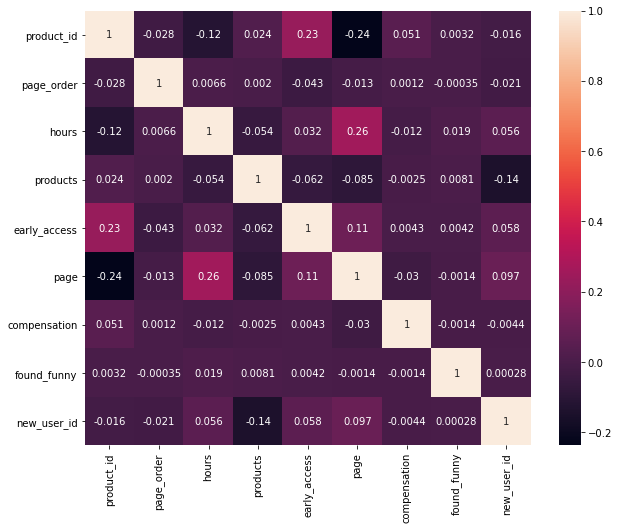

In [57]:
plt.figure(figsize = (10,8))
sns.heatmap(data_reviews_fill_na.iloc[:,[1,2,4,6,8,9,11,12,13]].corr(), annot = True,  cbar_kws= {'orientation': 'vertical'})

No se encuentra una correlacion considerable entre las columnas del dataset.

In [58]:
data_reviews_fill_na.text[0]

'This would not be acceptable as an entertainment even back in the day when these graphics were all there was to be had. No effort has been made to bring the player into any story or even entertain.'

La review de la primera instancia del dataset es obviamente negativa. Por lo que diremos que la columna recommended, la cual contiene solo valores True esta mal ya que no es posible que un usuario recomiende un juego con la review que realizo. Vamos a eliminar la columna.

Por lo tanto se decidio lo siguiente:

* Eliminar la columna recommended ya que todos sus valores son True y no reflejan lo que el usuario plantea en el texto de la rerview.
* Eliminar la columna user_id ya que creamos la variable new_user_id que tiene el mismo fin pero sin contener valores nulos
* Las columnas page_order y page las consideramos innecesarias para nuestro analisis por lo que decidimos eliminarlas ya que no aportan informacion util
* La columna username pasa a ser redundante ya que con new_user_id ya podemos identificar al usuario que realizo la review.

Entonces el dataset con la seleccion realizada es el siguiente:

In [59]:
data_reviews_clean = data_reviews_fill_na.copy()
data_reviews_clean = data_reviews_clean.drop(['recommended','page_order','page','user_id','username'],axis=1)

In [60]:
data_reviews_clean.head(10)

,product_id,text,hours,products,date,early_access,compensation,found_funny,new_user_id
0,725280,This would not be acceptable as an entertainme...,0.1,41.0,2017-12-17,False,False,0.0,0.0
1,328100,Addictive RPG ! Works fine on linux though it ...,13.2,1386.0,2017-08-02,False,False,0.0,1.0
2,725280,Прикольная стрелялка. Взял дешево на распродаже.,0.1,1706.0,2017-11-12,False,False,0.0,2.0
3,631920,Somewhere on Zibylon: ~~~~~~~~~~~~~~~~~~ Zibyl...,7.8,2217.0,2017-12-11,False,True,0.0,3.0
4,35140,"This game was way to linear for me, and compar...",8.2,18.0,2018-01-02,False,False,0.0,4.0
5,288690,"<23:32:55> ""Pit"": Hello, my name is dominik di...",0.2,155.0,2016-08-31,False,True,3.0,5.0
6,35600,I like the art style and the idea but what a b...,2.7,264.0,2017-04-15,False,False,0.0,6.0
7,620900,"Very, very good game. I love dungeon crawlers,...",4.0,136.0,2017-09-11,False,False,1.0,7.0
8,1840,WAY PAST COOL,34.8,3.0,2018-01-04,False,False,0.0,8.0
9,671270,Putting a hat on your head has disasterous rep...,0.1,548.0,2017-07-09,False,True,1.0,9.0


Guardo el dataset con las modificaciones reazalidas hasta el momento.

In [61]:
data_reviews_clean.to_csv('data_reviews_clean.csv',index=False)

In [62]:
data_reviews_clean = pd.read_csv("data_reviews_clean.csv")
data_reviews_clean.head(1)

,product_id,text,hours,products,date,early_access,compensation,found_funny,new_user_id
0,725280,This would not be acceptable as an entertainme...,0.1,41.0,2017-12-17,False,False,0.0,0.0


#### **Exploracion de los datos  seleccionados**

Primero realizaremos un analisis bivariado entre las variables de nuestro dataset. El analisis va orientado a encoontrar algun tipo de relacion entre ella y tambien a solo entender de mejor manera los datos con los que estamos trabajando.

Text(0.5, 1.0, 'product_id vs found_funny')

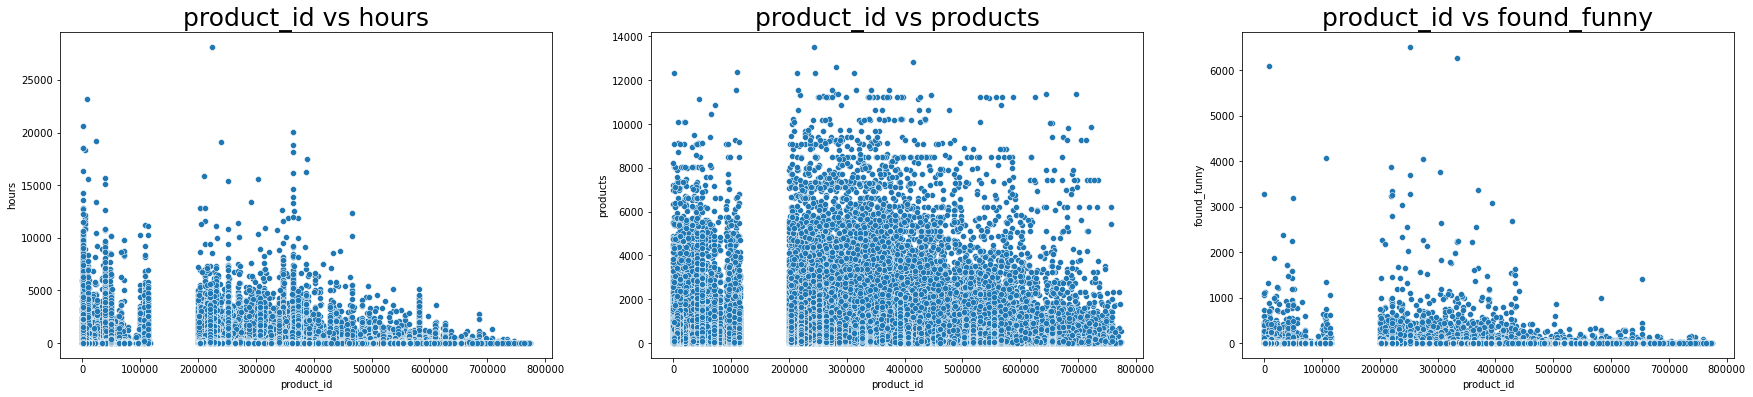

In [63]:
plt.figure(figsize = (30,6))

plt.subplot(1,3,1)
sns.scatterplot(data=data_reviews_clean, y='hours', x='product_id') 
plt.gca().set_title('product_id vs hours', fontsize=25)
plt.subplot(1,3,2)
sns.scatterplot(data=data_reviews_clean, y='products', x='product_id') 
plt.gca().set_title('product_id vs products', fontsize=25)
plt.subplot(1,3,3)
sns.scatterplot(data=data_reviews_clean, y='found_funny', x='product_id') 
plt.gca().set_title('product_id vs found_funny', fontsize=25)


Las observaciones obtenidas fueron las siguientes:

* Al parecer, los productos con id altos pueden corresponder a juegos mas nuevos, debido a que tienen menos horas jugadas, menos productos vendidos y sus criticas tienen menos evaluaciones en found_funny.
* Hay un sector de product_id sin datos, que solo esta diviendo la muestra en 2 secciones.

Text(0.5, 1.0, 'new_user_id vs products')

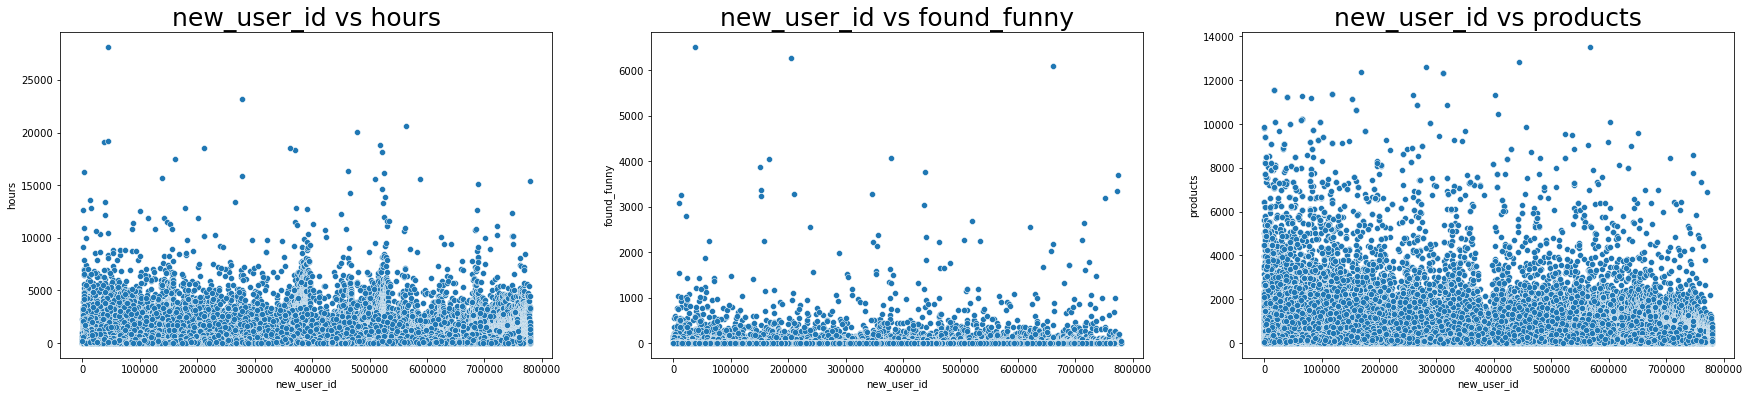

In [64]:
plt.figure(figsize = (30,6))
plt.subplot(1,3,1)
sns.scatterplot(data=data_reviews_clean, y='hours', x='new_user_id') 
plt.gca().set_title('new_user_id vs hours', fontsize=25)
plt.subplot(1,3,2)
sns.scatterplot(data=data_reviews_clean, y='found_funny', x='new_user_id') 
plt.gca().set_title('new_user_id vs found_funny', fontsize=25)
plt.subplot(1,3,3)
sns.scatterplot(data=data_reviews_clean, y='products', x='new_user_id') 
plt.gca().set_title('new_user_id vs products', fontsize=25)

Las observaciones obtenidas fueron las siguientes:

* La variable new_user_id representa con un valor numerico a todos los usuarios que realizaron reviews. Y al comparar esta variable vs hours, found_funny y products; podemos concluir que todas se encuentran distribuidas de manera aleatoria y no hay una relacion entre ellas.

Text(0.5, 1.0, 'compensation vs hours')

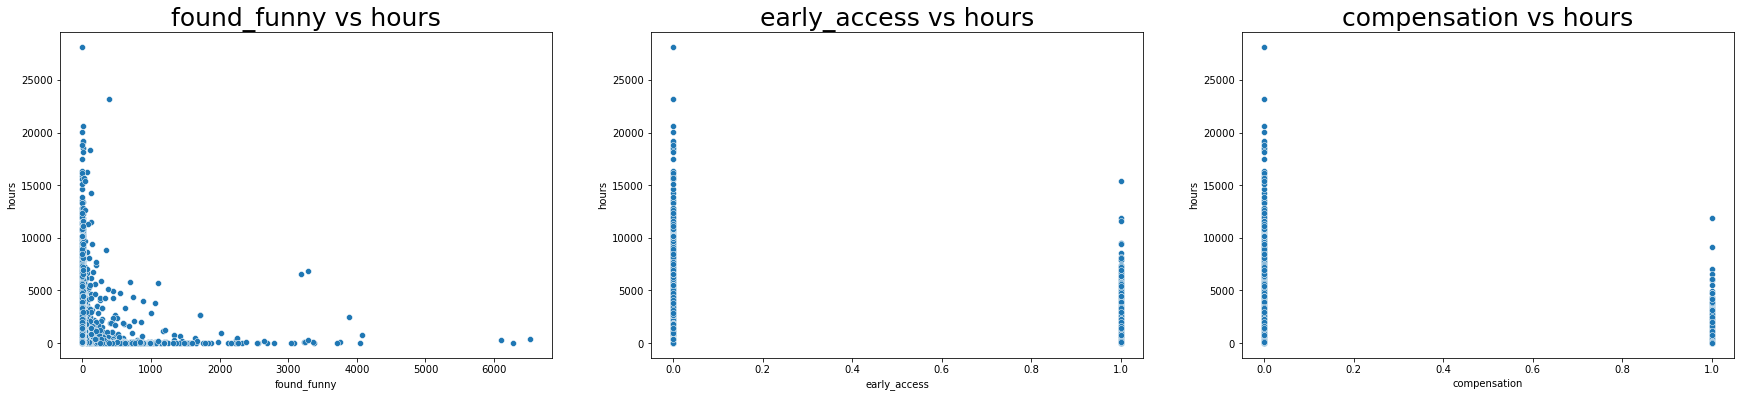

In [65]:
plt.figure(figsize = (30,6))
plt.subplot(1,3,1)
sns.scatterplot(data=data_reviews_clean, y='hours', x='found_funny') 
plt.gca().set_title('found_funny vs hours', fontsize=25)
plt.subplot(1,3,2)
sns.scatterplot(data=data_reviews_clean, y='hours', x='early_access') 
plt.gca().set_title('early_access vs hours', fontsize=25)
plt.subplot(1,3,3)
sns.scatterplot(data=data_reviews_clean, y='hours', x='compensation') 
plt.gca().set_title('compensation vs hours', fontsize=25)

Las observaciones obtenidas fueron las siguientes:

* Debido a que la gran mayoria de los datos de early_access y compensation son False, se encuentra un mayor numero de horas jugadas para ese estado de dichas variables en vez de cuando toman valor True. Consideramos que no hay un gran relacion entre hours con ambas variables.

* Las variable found_funny vs hours nos muestra que las reviews mas graciosas (found_funny alto) son las que menos horas jugadas tienen y cuanto mas alta la cantidad de horas jugadas, menos graciosa es la review. Esto puede ocurrir debido a que cuando alguien juega muchas horas un juego es porque debe haberlo disfrutado y al compartir una review del mismo, el usuario intenta convencer a otros de probarlo y dan sus puntos de porque jugarlo. Por lo tanto, creemos que a niveles altos de hours nos puede indicar de review positiva al juego.

Text(0.5, 1.0, 'compensation vs found_funny')

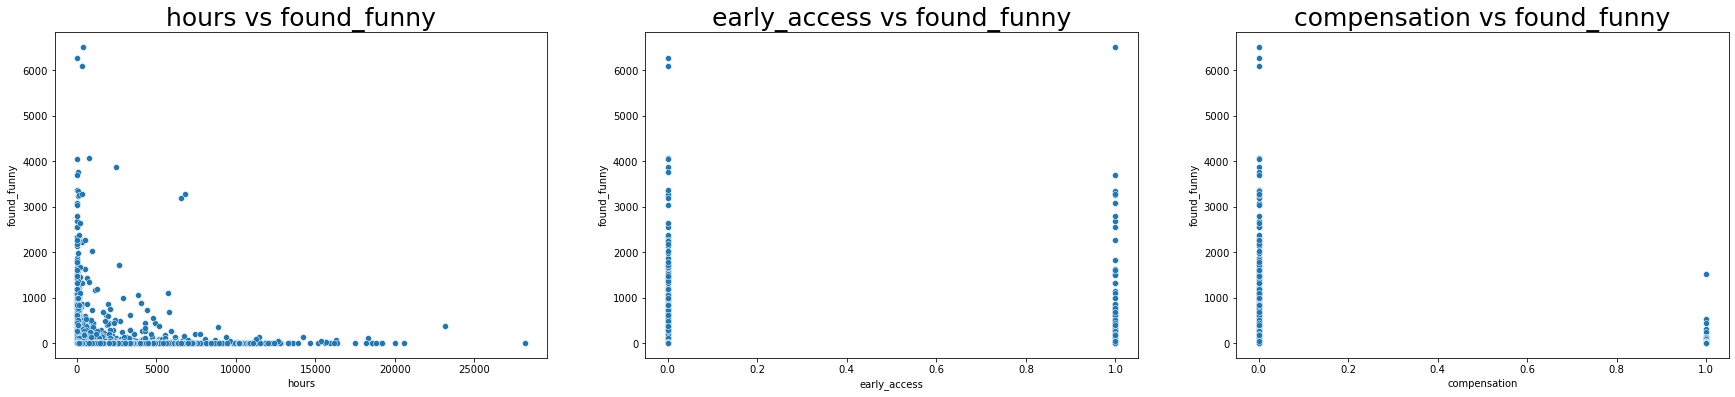

In [66]:
plt.figure(figsize = (30,6))
plt.subplot(1,3,1)
sns.scatterplot(data=data_reviews_clean, y='found_funny', x='hours') 
plt.gca().set_title('hours vs found_funny', fontsize=25)
plt.subplot(1,3,2)
sns.scatterplot(data=data_reviews_clean, y='found_funny', x='early_access') 
plt.gca().set_title('early_access vs found_funny', fontsize=25)
plt.subplot(1,3,3)
sns.scatterplot(data=data_reviews_clean, y='found_funny', x='compensation') 
plt.gca().set_title('compensation vs found_funny', fontsize=25)

Las observaciones obtenidas fueron las siguientes:

* Debido a que la gran mayoria de los datos de early_access y compensation son False, se encuentra un valor mas elevado de found_funny para ese estado de dichas variables en vez de cuando toman valor True. Consideramos que no hay un gran relacion entre found_funny con ambas variables.

* Las variable found_funny vs hours nos muestra que las reviews mas graciosas (found_funny alto) son las que menos horas jugadas tienen y cuanto mas alta la cantidad de horas jugadas, menos graciosa es la review. Puede ocurrir que cuando un usuario juega solo un breve periodo de tiempo a un juego y no le gusto (o hasta lo odio), este usuario puede llegar a realizar una critica negativa al juego y hasta hacerlo de forma ironica o graciosa, lo que puede llevar a que la review sea considerada graciosa por muchos usuarios. Por lo tanto, creemos que a valores altos de found_funny, puede ser un indicador de mala critica al juego y a niveles altos de hours nos puede indicar de review positiva al juego. 

Text(0.5, 1.0, 'found_funny antes de limpiar los outliers')

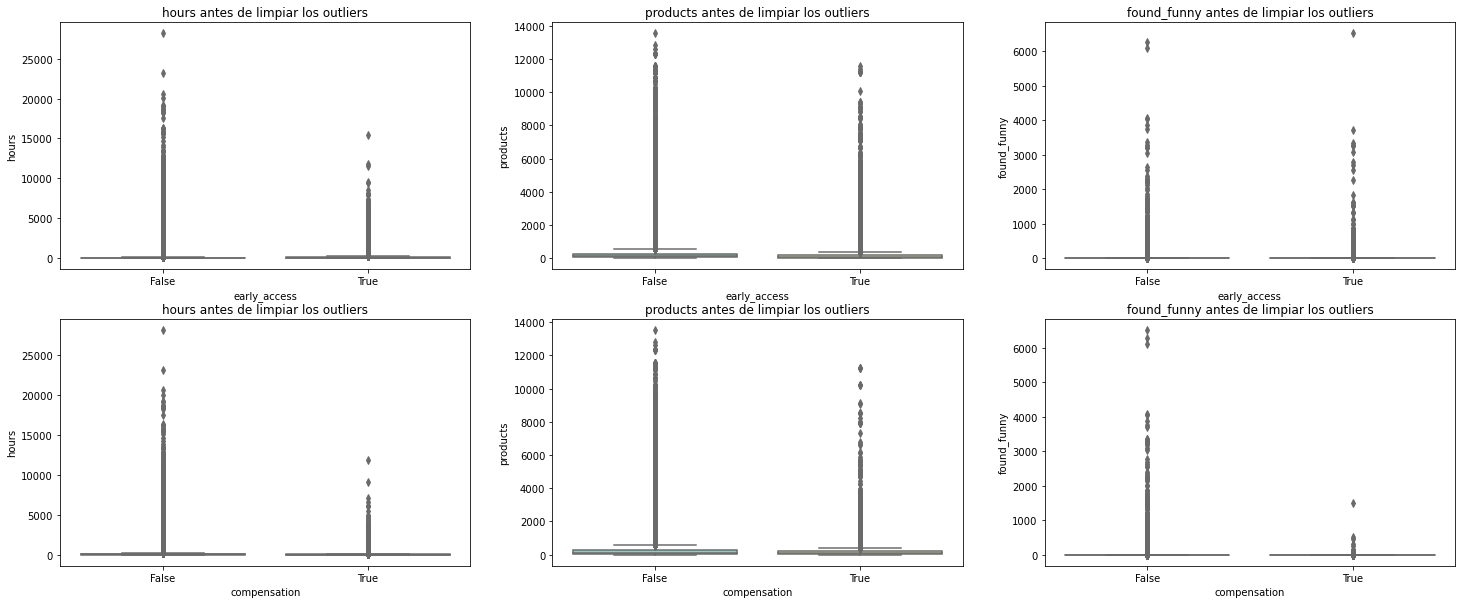

In [67]:
fig, axs = plt.subplots(nrows=2,ncols=3,figsize=(25,10))

#Boxplots relacionados con el tipo de propiedad
sns.boxplot(x="early_access", y="hours",data=data_reviews_clean, palette="Set3", ax=axs[0][0]).set_title('hours antes de limpiar los outliers')
sns.boxplot(x="early_access", y="products",data=data_reviews_clean, palette="Set3", ax=axs[0][1]).set_title('products antes de limpiar los outliers')
sns.boxplot(x="early_access", y="found_funny",data=data_reviews_clean, palette="Set3", ax=axs[0][2]).set_title('found_funny antes de limpiar los outliers')
sns.boxplot(x="compensation",y="hours",data=data_reviews_clean, palette="Set3", ax=axs[1][0]).set_title('hours antes de limpiar los outliers')
sns.boxplot(x="compensation",y="products",data=data_reviews_clean, palette="Set3", ax=axs[1][1]).set_title('products antes de limpiar los outliers')
sns.boxplot(x="compensation",y="found_funny",data=data_reviews_clean, palette="Set3", ax=axs[1][2]).set_title('found_funny antes de limpiar los outliers')

En consecuencia, analizando las variables hours, products y found_funny en relacion con las variables boolenas compensation y early_access se puede notar que estas varian mucho con respecto de la media en todos los casos posibles.

A continuacion se realizara un analisis univariado de las variables del dataset:

In [68]:
list_most_found_funny = data_reviews_clean.text[data_reviews_clean.found_funny > 3100]
print("Las {} reviews mas graciosas fueron: ".format(list_most_found_funny.count()))
c=1
for i in list_most_found_funny:
    print("\n{})\n{}\n".format(c,i))
    c= c+1

Las 15 reviews mas graciosas fueron: 

1)
Day 1: This game looks pretty good, ill get it!
Day 2: This is hard to learn but ill stick to it!
Day 10: So THAT's how you land.
Day 50: These spaceplanes are hard to build...
Day 200: YES! MY 1:1 SCALE MODEL OF THE DEATH STAR IS DONE!!!!!!!!
Day 500: Havent seen the sun in weeks... so... hungry...
Day ????: Jeb is love... jeb is life...


2)
Parachutes do not work on the moon. Many Kerbals died to bring us this information.
11/10


3)
I convinced town that I was a medium and can listen to the dead.
I then went to each persons house to perform a ritual to speak to their lost ancestors.
Night by night I would brutally murder each and every one of them.
They never knew I was the serial killer out to get them all.
After they were all gone I decided to come home and play some Town of Salem and found it was alright.


4)
Arma 3 is like anal,
Hard and painful, but you'll get used to it.


5)
My crew attempted a mutiny, upset and frightened from bein

De las 10 reviews calificadas como las mas graciosas se obtuvo lo siguiente:

1. Review positiva sobre el juego de manera ironica.
1. Review positiva sobre el juego de manera ironica.
1. Review positiva sobre el juego contando una historia ironica. 
1. Review positiva sobre el juego de manera ironica. 
1. Review positiva sobre el juego contando una historia.
1. Review positiva sobre el juego de manera ironica.
1. Review positiva sobre el juego de manera ironica. 
1. Review positiva sobre el juego contando una historia ironica. 
1. Review positiva sobre el juego de manera ironica. 
1. Review positiva sobre el juego de manera ironica.
1. Review positiva sobre el juego contando una historia ironica. 
1. Review ambigua, contando de manera ironica que el early access esta durando mucho.
1. Review **negativa** sobre el juego de manera ironica.
1. Review positiva sobre el juego contando una historia ironica. 
1. Review positiva sobre el juego de manera ironica.

Solo 1 de las 15 reviews mas graciosas fue negativa. Esto se contradice con la suposicion que habiamos hecho previamente en la que decia que cuanto mas alto era el valor en found_funny la review tenia mas chances de ser negativa. Esto requiere un analisis mas exhaustivo ya que el dataset es muy grande para evaluar una por una si la review fue positiva o negativa, y del dataset solo la columna text es la que nos puede otorgar esa respuesta. Se deberia implementar un procesamiento de lenguaje natural para obtener dicha respuesta. 

Tambien, consideramos que el hecho de que una review sea positiva o negativa es el factor fundamental si es que el sistema de recomendacion a emplear sea colaborativo, pero en el caso de plantear un sistema de recomendacion basado en contenido si se puede llegar a trabajar sin la necesidad de saber si la review fue positiva o negativa. Con la columna de cantidad de horas jugadas y utilizando loos datos especificos de los juegos (desde el dataset games) se puede llegar a realizar la recomendacion basada en contenido.

In [69]:
data_reviews_clean.head(1)

,product_id,text,hours,products,date,early_access,compensation,found_funny,new_user_id
0,725280,This would not be acceptable as an entertainme...,0.1,41.0,2017-12-17,False,False,0.0,0.0


Text(0.5, 1.0, 'found_funny antes de limpiar los outliers')

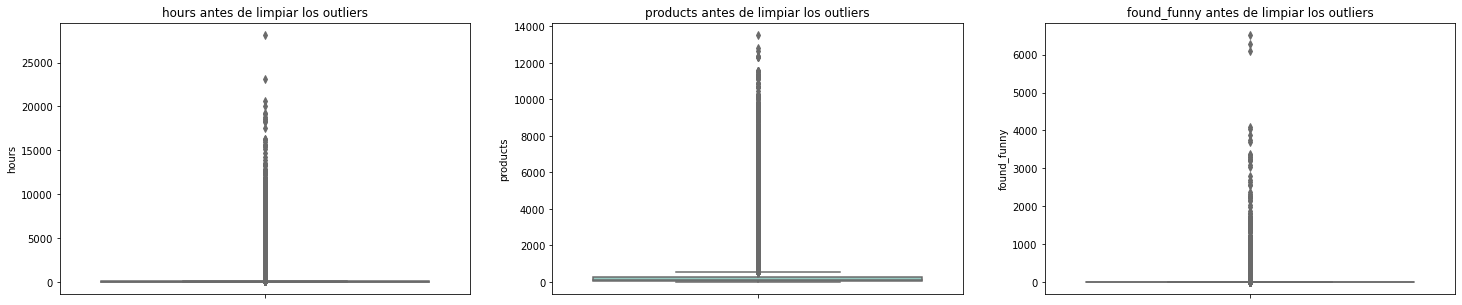

In [70]:
fig, axs = plt.subplots(ncols=3,figsize=(25,5))

#Boxplots relacionados con el tipo de propiedad
sns.boxplot(y="hours",data=data_reviews_clean, palette="Set3", ax=axs[0]).set_title('hours antes de limpiar los outliers')
sns.boxplot(y="products",data=data_reviews_clean, palette="Set3", ax=axs[1]).set_title('products antes de limpiar los outliers')
sns.boxplot(y="found_funny",data=data_reviews_clean, palette="Set3", ax=axs[2]).set_title('found_funny antes de limpiar los outliers')

In [71]:
data_reviews_clean.describe()

,product_id,hours,products,found_funny,new_user_id
count,779307.000000,779307.000000,779307.000000,779307.000000,779307.000000
mean,251489.822053,111.465377,236.517702,1.189313,296413.677955
std,149975.370469,389.538884,485.661872,28.591400,229309.994969
min,10.000000,0.000000,0.000000,0.000000,0.000000
25%,203770.000000,3.900000,45.000000,0.000000,89859.500000
50%,252490.000000,15.200000,110.000000,0.000000,250179.000000
75%,346110.000000,59.300000,246.000000,0.000000,477624.500000
max,773900.000000,28164.000000,13540.000000,6524.000000,779306.000000


Por consiguiente, como se habia detallado previamente, las variables hours, products y found_funny varian mucho con respecto de la media.

### **Games**

#### **Seleccion de los datos**

Para seleccionar los datos que utilizaremos, tendremos en cuenta lo mencionado previamente:

La variable metascore tiene más del 90% de sus valores nulos, por lo que podemos eliminar la variable ya que contiene demasiadas instancias nulas. También la podemos reemplazar por algún tipo de variable categórica. Metascore es el puntaje que la página metacritic le da a a ciertas cosas, en este caso a los videojuegos. Éstas críticas en general se dan en juegos que son más pópulares. Por lo que la categoría metascore se podría reemplazar por alguna que indique la popularidad o algo similar. No consideramos que la cantidad de instancias nulas en esta categoría sea algo anormal.

Las variables genres, tags y specs es posible que las combinemos más adelante de alguna manera por lo que no consideramos tener en cuenta la cantidad de valores nulos de cada una.

La cantidad de valores nulos en discount price es casi del 100% entonces creemos que la mejor opción sería eliminarlo, también consideramos que el descuento no influye tanto en la valoración de un juego como si lo hacen otros factores técnicos del mismo o la variable price. El descuento puedo influir a la hora de comprarlo, pero no tanto como a la hora de calificarlo.

La variable price tiene 4.3% de instancias nulas, las cuales podrían eliminarse ya que no es una cantidad elevada de instancias nulas y sabemos que el precio de un producto puedo influir de manera que el usuario suele pensar en la relación precio/calidad en los productos. 

Las intancias nulas de reviews_url podrian reemplazarse transformando la variable en una categórica que indique si tiene o no reviews.

Las instancias nulas de id consideramos correcto eliminarlas ya que sin el id del juego no podremos conectar el dataset de games con el de reviews y también porque solamente representan el 0.006% de las instancias.

Las instancias de valores nulos de publisher y price se analizarán de manera más exhaustiva más adelante ya que consideramos que están fuertemente relacionadas ya que un desarrollador de videojuegos también puede ser el publicador del mismo.



In [208]:
#Eliminamos las columnas con url
data_games_drop_url = data_games.copy()
data_games_drop_url = data_games_drop_url.drop(['url','reviews_url','discount_price'],axis=1)

In [209]:
data_games_drop_url.head(5)

,publisher,genres,app_name,title,release_date,tags,specs,price,early_access,id,developer,sentiment,metascore
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",[Single-player],4.99,False,761140,Kotoshiro,NaN,NaN
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...","[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,643980,Secret Level SRL,Mostly Positive,NaN
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...","[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,670290,Poolians.com,Mostly Positive,NaN
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,2017-12-07,"[Action, Adventure, Casual]",[Single-player],0.99,False,767400,彼岸领域,NaN,NaN
4,NaN,NaN,Log Challenge,NaN,NaN,"[Action, Indie, Casual, Sports]","[Single-player, Full controller support, HTC V...",2.99,False,773570,NaN,NaN,NaN


In [210]:
#Eliminamos los valores nulos de id (sono 2 en total)
data_games_no_null_in_id = data_games_drop_url[data_games_drop_url.id.notnull()]
data_games_no_null_in_id.isnull().sum()

publisher        8051
genres           3282
app_name            1
title            2049
release_date     2066
tags              162
specs             669
price            1377
early_access        0
id                  0
developer        3298
sentiment        7181
metascore       29457
dtype: int64

La variable price tiene un valor que es free to play. Vamos a crear una variable la cual sea un atributo categorico que indique si el juego es gratis para jugarlo.

In [211]:
data_games_with_free_to_play = data_games_no_null_in_id.copy()
#Creo una variable que indique si el juego es gratuito
data_games_with_free_to_play['free_to_play'] = data_games_with_free_to_play['price'].apply(lambda x: True if isinstance(x, str) else False)
print("\nLas instancias en la variable price que fueron categorizadas como True en la variable free_to_play fueron las siguientes: \n")
data_games_with_free_to_play[data_games_with_free_to_play.free_to_play == True].groupby('price').agg({'price': 'count'})


Las instancias en la variable price que fueron categorizadas como True en la variable free_to_play fueron las siguientes: 



,price
price,
Free,905
Free Demo,3
Free HITMAN™ Holiday Pack,1
Free Mod,4
Free Movie,1
Free To Play,462
Free to Play,520
Free to Try,1
Free to Use,1


Exceptuando las instancias "Starting at 449.00" y "Starting at 499.00", todas las demas indican que el juego es gratuito.

In [212]:
data_games_with_free_to_play[data_games_with_free_to_play.price ==('Starting at $499.00')]

,publisher,genres,app_name,title,release_date,tags,specs,price,early_access,id,developer,sentiment,metascore,free_to_play
25000,NaN,NaN,Syber Steam Machine,Syber Steam Machine,2015-11-10,"[Steam Machine, Hardware]",NaN,Starting at $499.00,False,353420,NaN,NaN,NaN,True


In [213]:
data_games_with_free_to_play[data_games_with_free_to_play.price ==('Starting at $449.00')]

,publisher,genres,app_name,title,release_date,tags,specs,price,early_access,id,developer,sentiment,metascore,free_to_play
25001,NaN,NaN,Alienware Steam Machine,Alienware Steam Machine,2015-11-10,"[Steam Machine, Hardware, Gaming, Futuristic, ...",NaN,Starting at $449.00,False,353390,NaN,8 user reviews,NaN,True


Vamos a cambiar sus valores, free_to_play pasara a ser False y price sera igual al precio que indican.

In [214]:
data_games_with_free_to_play.free_to_play[data_games_with_free_to_play.price ==('Starting at $499.00')] = False
data_games_with_free_to_play.price[data_games_with_free_to_play.price ==('Starting at $499.00')] = 499.00
data_games_with_free_to_play[data_games_with_free_to_play.price ==(499.00)]

<ipython-input-214-2083cb975d41>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_games_with_free_to_play.free_to_play[data_games_with_free_to_play.price ==('Starting at $499.00')] = False
<ipython-input-214-2083cb975d41>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_games_with_free_to_play.price[data_games_with_free_to_play.price ==('Starting at $499.00')] = 499.00


,publisher,genres,app_name,title,release_date,tags,specs,price,early_access,id,developer,sentiment,metascore,free_to_play
25000,NaN,NaN,Syber Steam Machine,Syber Steam Machine,2015-11-10,"[Steam Machine, Hardware]",NaN,499.0,False,353420,NaN,NaN,NaN,False


In [215]:
data_games_with_free_to_play.free_to_play[data_games_with_free_to_play.price ==('Starting at $449.00')] = False
data_games_with_free_to_play.price[data_games_with_free_to_play.price ==('Starting at $449.00')] = 449.00
data_games_with_free_to_play[data_games_with_free_to_play.price ==(449.00)]

<ipython-input-215-68531f539e31>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_games_with_free_to_play.free_to_play[data_games_with_free_to_play.price ==('Starting at $449.00')] = False
<ipython-input-215-68531f539e31>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_games_with_free_to_play.price[data_games_with_free_to_play.price ==('Starting at $449.00')] = 449.00


,publisher,genres,app_name,title,release_date,tags,specs,price,early_access,id,developer,sentiment,metascore,free_to_play
25001,NaN,NaN,Alienware Steam Machine,Alienware Steam Machine,2015-11-10,"[Steam Machine, Hardware, Gaming, Futuristic, ...",NaN,449.0,False,353390,NaN,8 user reviews,NaN,False


Ahora utilizando la columna free_to_play, le otorgare un valor de price en 0 a las instancias que indiquen que son gratis para jugar.

In [216]:
data_games_with_price_0 = data_games_with_free_to_play.copy()
#Creo una variable que indique si el juego es gratuito
data_games_with_price_0['price'] = data_games_with_price_0['price'].apply(lambda x: 0 if isinstance(x, str) else x)

In [217]:
data_games_with_price_0[data_games_with_price_0.free_to_play == True].groupby('price').agg({'price': 'count'})

,price
price,
0.0,1908


Por lo tanto para todas las intancias en True de la variable free_to_play, su valor en la columna price es 0.

Ahora crearemos una vaiable que nos indique si un juego fue calificada en metascore

In [218]:
data_games_with_has_metascore = data_games_with_price_0.copy()
#Creo una variable que ndique si un juego fue calificada en metascore
data_games_with_has_metascore['metascore'] = data_games_with_has_metascore['metascore'].apply(lambda x: np.nan if x == 'NA'  else x)
data_games_with_has_metascore['has_metascore'] = data_games_with_has_metascore['metascore'].apply(lambda x: True if x >= 0 else False)

In [219]:
data_games_with_has_metascore[data_games_with_has_metascore.has_metascore == True].groupby('metascore').agg({'metascore': 'count'})

,metascore
metascore,
20.0,1
24.0,1
27.0,1
29.0,1
30.0,1
...,...
92.0,10
93.0,6
94.0,9


Por lo tanto para todas las intancias en True de la variable has_metascore, su valor en la columna metascore es no nulo.

A continuacion analizo si todas las variables con has_metascore True tienen asignado un sentimiento.

In [220]:
data_games_with_has_metascore[data_games_with_has_metascore.has_metascore == True].groupby(['sentiment',]).agg({'has_metascore': 'count'})

,has_metascore
sentiment,
1 user reviews,10
2 user reviews,12
3 user reviews,8
4 user reviews,7
5 user reviews,6
6 user reviews,8
7 user reviews,10
8 user reviews,9
9 user reviews,8


In [221]:
data_games_with_has_metascore[data_games_with_has_metascore.has_metascore == True].count()

publisher        2522
genres           2544
app_name         2606
title            2555
release_date     2552
tags             2605
specs            2602
price            2583
early_access     2606
id               2606
developer        2531
sentiment        2585
metascore        2606
free_to_play     2606
has_metascore    2606
dtype: int64

Por lo tanto 2585 de las 2606 instancias que tienen has_metascore = True, tambien tienen asignado un valor en sentiment. Entonces proceremos a elimnar la columna metascore ya que consideramos que con la columna has_metascore y la columna sentiment ya tenemos informacion mas relevante.

In [222]:
data_games_drop_metascore = data_games_with_has_metascore.copy()
data_games_drop_metascore = data_games_drop_metascore.drop(['metascore'],axis=1)

In [223]:
data_games_drop_metascore.isnull().sum()

publisher        8051
genres           3282
app_name            1
title            2049
release_date     2066
tags              162
specs             669
price            1377
early_access        0
id                  0
developer        3298
sentiment        7181
free_to_play        0
has_metascore       0
dtype: int64

Ahora vamos a trabajar con las columnas app_name y title. Previamente se supuso lo siguiente:

* La relación entre las variable app_name y title, supongo que son "iguales" ya que el 92% se sus valores son exactamente iguales, y creo que el resto que no son los mismo se puede deber a que alguno de los dos tenga un valor nulo y el otro sea el que contenga el nombre del juego.

Bajo esta suposicion, analizaremos los valores faltantes para los casos en que las variables no sean iguales.

In [224]:
app_name_equals_title = []
app_name_equals_title= data_games_drop_metascore['app_name'].apply(lambda x: True if x == (data_games_drop_metascore.title[data_games_drop_metascore.app_name == x].values.any()) else False)

print("La cantidad de valores de app_name iguales a title es de: ",app_name_equals_title.value_counts(False)[1])
print("La cantidad de valores de app_name distintos a title es de: ",app_name_equals_title.value_counts(False)[0])
print('\nEl {}% de los valores de title son iguales a los de app_name.\n'.format(app_name_equals_title.value_counts(True)[1]*100))


La cantidad de valores de app_name iguales a title es de:  29529
La cantidad de valores de app_name distintos a title es de:  2604

El 91.89618149565867% de los valores de title son iguales a los de app_name.



Para fines practicos, crearemos provisoriamente una variable que indique si ambas variables son iguales.

In [225]:
data_games_same_name = data_games_drop_metascore.copy()
data_games_same_name['same_name'] = np.nan
app_name_equals_title_frame = app_name_equals_title.to_frame()
for i in data_games_same_name.index:    
    data_games_same_name.same_name[i] = app_name_equals_title_frame.app_name[i]
data_games_same_name.head(1)

<ipython-input-225-6065200e4ee7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_games_same_name.same_name[i] = app_name_equals_title_frame.app_name[i]
D:\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,publisher,genres,app_name,title,release_date,tags,specs,price,early_access,id,developer,sentiment,free_to_play,has_metascore,same_name
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",[Single-player],4.99,False,761140,Kotoshiro,NaN,False,False,True


Realizo la comparacion para los casos en que los nombres no son iguales. Me fijo cual de ambos datos es nulo o si ambos lo son.

In [226]:
data_games_same_name[data_games_same_name.same_name == False].isnull().sum()

publisher        2227
genres           2059
app_name            1
title            2046
release_date     2045
tags                2
specs              18
price             127
early_access        0
id                  0
developer        2056
sentiment         455
free_to_play        0
has_metascore       0
same_name           0
dtype: int64

Notamos que solo hay un caso en el que app_name es nulo y 2046 en los que title es nulo, por lo que a los valores nulos de title les otorgaremos los valores de app_name correspondientes.

In [227]:
data_games_fill_na_title = data_games_same_name.copy()
for i in data_games_fill_na_title.index:    
    if isinstance(data_games_fill_na_title.title[i], str):
        pass
    else:
        data_games_fill_na_title.title[i] = data_games_fill_na_title.app_name[i]


<ipython-input-227-5f3e6a24b447>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_games_fill_na_title.title[i] = data_games_fill_na_title.app_name[i]


In [228]:
data_games_fill_na_title[data_games_fill_na_title.same_name == False].isnull().sum()

publisher        2227
genres           2059
app_name            1
title               1
release_date     2045
tags                2
specs              18
price             127
early_access        0
id                  0
developer        2056
sentiment         455
free_to_play        0
has_metascore       0
same_name           0
dtype: int64

Por lo tanto nos queda solo una instancia de todo el dataset la cual no tiene ni app_name ni title. Creamos ahora una variable que contengas los nombres de ambas y eliminamos la columna same_name.

In [229]:
data_games_one_name= data_games_fill_na_title.copy()
data_games_one_name["app_name_or_title"] = data_games_one_name.app_name
data_games_one_name = data_games_one_name.drop(['app_name','title','same_name'],axis=1)
data_games_one_name.head(1)

,publisher,genres,release_date,tags,specs,price,early_access,id,developer,sentiment,free_to_play,has_metascore,app_name_or_title
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",[Single-player],4.99,False,761140,Kotoshiro,NaN,False,False,Lost Summoner Kitty


Ahora realizaremos un trabajo similar para ver si un juego tiene el mismo desarrollador como publicador.

In [230]:
publisher_equals_developer = []
publisher_equals_developer= data_games_one_name['publisher'].apply(lambda x: True if x == (data_games_one_name.developer[data_games_one_name.publisher == x].values.any()) else False)

print("La cantidad de valores de publisher iguales a developer es de: ",publisher_equals_developer.value_counts(False)[1])
print("La cantidad de valores de publisher distintos a developer es de: ",publisher_equals_developer.value_counts(False)[0])
print('\nEl {}% de los valores de developer son iguales a los de publisher.\n'.format(publisher_equals_developer.value_counts(True)[1]*100))

La cantidad de valores de publisher iguales a developer es de:  13208
La cantidad de valores de publisher distintos a developer es de:  18925

El 41.10416083154389% de los valores de developer son iguales a los de publisher.



In [231]:
data_publisher_equals_developer = data_games_one_name.copy()
data_publisher_equals_developer['same_publisher_and_developer'] = np.nan
publisher_equals_developer = publisher_equals_developer.to_frame()
for i in data_publisher_equals_developer.index:    
    data_publisher_equals_developer.same_publisher_and_developer[i] = publisher_equals_developer.publisher[i]
data_publisher_equals_developer.head(1)

<ipython-input-231-092e9736bb77>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_publisher_equals_developer.same_publisher_and_developer[i] = publisher_equals_developer.publisher[i]
D:\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,publisher,genres,release_date,tags,specs,price,early_access,id,developer,sentiment,free_to_play,has_metascore,app_name_or_title,same_publisher_and_developer
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",[Single-player],4.99,False,761140,Kotoshiro,NaN,False,False,Lost Summoner Kitty,True


Realizo la comparacion para los casos en que no son iguales. Me fijo cual de ambos datos es nulo o si ambos lo son.

In [232]:
data_publisher_equals_developer[data_publisher_equals_developer.same_publisher_and_developer == False].isnull().sum()

publisher                       8051
genres                          3230
release_date                    2055
tags                             109
specs                            457
price                            717
early_access                       0
id                                 0
developer                       3286
sentiment                       5120
free_to_play                       0
has_metascore                      0
app_name_or_title                  1
same_publisher_and_developer       0
dtype: int64

Tenemos 8051 valores nulos de publisher y 3286 valores nulos de developer.

Para disminuir el nivel de valores nulos en ambas variables, vamos a supones que un juego que tenga publicador/desarrollador pero tenga un valor nulo en la otra variable desarrollador/publicador significa que el juego tiene el mismo desarrollador/publicador en ambas variables.

In [233]:
for i in data_publisher_equals_developer.index:
    if data_publisher_equals_developer.same_publisher_and_developer[i] == False:
        if not isinstance(data_publisher_equals_developer.publisher[i],str):
            data_publisher_equals_developer.publisher[i] = data_publisher_equals_developer.developer[i]
        elif not isinstance(data_publisher_equals_developer.developer[i],str):
            data_publisher_equals_developer.developer[i] = data_publisher_equals_developer.publisher[i]
    

<ipython-input-233-2bec8b416694>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_publisher_equals_developer.publisher[i] = data_publisher_equals_developer.developer[i]
<ipython-input-233-2bec8b416694>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_publisher_equals_developer.developer[i] = data_publisher_equals_developer.publisher[i]


In [234]:
data_publisher_equals_developer[data_publisher_equals_developer.same_publisher_and_developer == False].isnull().sum()

publisher                       3233
genres                          3230
release_date                    2055
tags                             109
specs                            457
price                            717
early_access                       0
id                                 0
developer                       3233
sentiment                       5120
free_to_play                       0
has_metascore                      0
app_name_or_title                  1
same_publisher_and_developer       0
dtype: int64

Luego de realizar la trasnformacion, podemos notar que los valores nulos de publisher disminuyeron de 8051 a 3233 y los de developer se mantuvieron practicamente constantes, de 3286 valores nulos pasaron a ser 3233 (misma cantidad de instancias nulas que publisher). Esto nos indica que en todas las instancias de valores nulos de developer, tambien son nulos en publisher. Esto se puede deber a que todos los juegos fueron desarrollados por alguien o alguna empresa y puede no tener un publicador. En cambio no puede existir un juego que solo sea un publicador porque no tendria a nadie que lo desarrolle.

En los casos en los que ambas variables son nulas, los tomaremos como si los datos se hubieran perdido. Continuaremos limpiando el dataset y luego retomaremos el manejo de los valores faltantes en estas variables. 

Ahora eliminamos la columna same_publisher_and_developer ya que solo la creamos para utilizarla prrovisoriamente.

In [244]:
data_games_modified = data_publisher_equals_developer.copy()
data_games_modified = data_games_modified.drop(['same_publisher_and_developer'],axis=1)

Ordenamos las columnas del dataset para que sea mas facil su interpretacion.

In [245]:
data_games_modified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32133 entries, 0 to 32134
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   publisher          28900 non-null  object 
 1   genres             28851 non-null  object 
 2   release_date       30067 non-null  object 
 3   tags               31971 non-null  object 
 4   specs              31464 non-null  object 
 5   price              30756 non-null  float64
 6   early_access       32133 non-null  bool   
 7   id                 32133 non-null  object 
 8   developer          28888 non-null  object 
 9   sentiment          24952 non-null  object 
 10  free_to_play       32133 non-null  bool   
 11  has_metascore      32133 non-null  bool   
 12  app_name_or_title  32132 non-null  object 
dtypes: bool(3), float64(1), object(9)
memory usage: 3.8+ MB


In [246]:
data_games_modified = data_games_modified.iloc[:,[7,12,8,0,5,10,1,3,4,6,9,11,2]]

In [247]:
data_games_modified.head(5)

,id,app_name_or_title,developer,publisher,price,free_to_play,genres,tags,specs,early_access,sentiment,has_metascore,release_date
0,761140,Lost Summoner Kitty,Kotoshiro,Kotoshiro,4.99,False,"[Action, Casual, Indie, Simulation, Strategy]","[Strategy, Action, Indie, Casual, Simulation]",[Single-player],False,NaN,False,2018-01-04
1,643980,Ironbound,Secret Level SRL,"Making Fun, Inc.",0.00,True,"[Free to Play, Indie, RPG, Strategy]","[Free to Play, Strategy, Indie, RPG, Card Game...","[Single-player, Multi-player, Online Multi-Pla...",False,Mostly Positive,False,2018-01-04
2,670290,Real Pool 3D - Poolians,Poolians.com,Poolians.com,0.00,True,"[Casual, Free to Play, Indie, Simulation, Sports]","[Free to Play, Simulation, Sports, Casual, Ind...","[Single-player, Multi-player, Online Multi-Pla...",False,Mostly Positive,False,2017-07-24
3,767400,弹炸人2222,彼岸领域,彼岸领域,0.99,False,"[Action, Adventure, Casual]","[Action, Adventure, Casual]",[Single-player],False,NaN,False,2017-12-07
4,773570,Log Challenge,NaN,NaN,2.99,False,NaN,"[Action, Indie, Casual, Sports]","[Single-player, Full controller support, HTC V...",False,NaN,False,NaN


#### **Preparacion de los datos**

Creo 2 columnas, una con una lista que contenga la informacion si el juego es free_to_play o si tiene early_access o has_metascore y otra columna que sea una lista del desarrollador y publicador del juego.

In [248]:
list_EA_FTP_HM = [[] for _ in range(len(data_games_modified.index))]

c = 0
for i in data_games_modified.early_access:
    if i:
        list_EA_FTP_HM[c].append("early_access")
    c = c+1

c = 0
for i in data_games_modified.free_to_play:
    if i:
        list_EA_FTP_HM[c].append("free_to_play")
    c = c+1
    
c = 0
for i in data_games_modified.has_metascore:
    if i:
        list_EA_FTP_HM[c].append("has_metascore")
    c = c+1
    
data_games_modified = data_games_modified.assign(EA_FTP_HM=list_EA_FTP_HM)


lists_publisher_and_developer = [[] for _ in range(len(data_games_modified.index))]
        
c = 0
for i in data_games_modified.developer:
    lists_publisher_and_developer[c].append(i)
    c = c+1

c = 0
for i in data_games_modified.publisher:
    lists_publisher_and_developer[c].append(i)
    c = c+1
    
data_games_modified = data_games_modified.assign(developer_and_pubisher=lists_publisher_and_developer)

for x in data_games_modified.developer_and_pubisher:
    for i in x:
        if not isinstance(i,str):
            i = str(i)

data_games_modified.head(5)

,id,app_name_or_title,developer,publisher,price,free_to_play,genres,tags,specs,early_access,sentiment,has_metascore,release_date,EA_FTP_HM,developer_and_pubisher
0,761140,Lost Summoner Kitty,Kotoshiro,Kotoshiro,4.99,False,"[Action, Casual, Indie, Simulation, Strategy]","[Strategy, Action, Indie, Casual, Simulation]",[Single-player],False,NaN,False,2018-01-04,[],"[Kotoshiro, Kotoshiro]"
1,643980,Ironbound,Secret Level SRL,"Making Fun, Inc.",0.00,True,"[Free to Play, Indie, RPG, Strategy]","[Free to Play, Strategy, Indie, RPG, Card Game...","[Single-player, Multi-player, Online Multi-Pla...",False,Mostly Positive,False,2018-01-04,[free_to_play],"[Secret Level SRL, Making Fun, Inc.]"
2,670290,Real Pool 3D - Poolians,Poolians.com,Poolians.com,0.00,True,"[Casual, Free to Play, Indie, Simulation, Sports]","[Free to Play, Simulation, Sports, Casual, Ind...","[Single-player, Multi-player, Online Multi-Pla...",False,Mostly Positive,False,2017-07-24,[free_to_play],"[Poolians.com, Poolians.com]"
3,767400,弹炸人2222,彼岸领域,彼岸领域,0.99,False,"[Action, Adventure, Casual]","[Action, Adventure, Casual]",[Single-player],False,NaN,False,2017-12-07,[],"[彼岸领域, 彼岸领域]"
4,773570,Log Challenge,NaN,NaN,2.99,False,NaN,"[Action, Indie, Casual, Sports]","[Single-player, Full controller support, HTC V...",False,NaN,False,NaN,[],"[nan, nan]"


El siguiente paso sería convertir las instancias de palabras en generos, tags y especificaciones en minúsculas y eliminar todos los espacios entre ellos.

Eliminar los espacios entre palabras es un paso previo al procesamiento importante. Se hace para que su vectorizador no cuente al player de "Single-player" y "Multi-player" como el mismo. Después de este paso de procesamiento, los generos, tags y especificaciones antes mencionados serán representados como "singleplayer" y "multiplayer" y serán distintos a su vectorizador.

La siguiente función realizara el proceso: 

In [249]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(str(i).replace("-", "")) for i in x]
    else:
            return ''

# Function to convert all strings to lower case and strip names of -
def clean_data_2(x):
    if isinstance(x, list):
        return [str.lower(str(i).replace(" ", "")) for i in x]
    else:
            return ''
        
# Function to convert all strings to lower case and strip names of ,
def clean_data_3(x):
    if isinstance(x, list):
        return [str.lower(str(i).replace(",", "")) for i in x]
    else:
            return ''
        
# Function to convert all strings to lower case and strip names of .
def clean_data_4(x):
    if isinstance(x, list):
        return [str.lower(str(i).replace('.', "")) for i in x]
    else:
            return ''
        
# Function to convert all strings to lower case and strip names of nan
def clean_data_5(x):
    if isinstance(x, list):
        return [str.lower(str(i).replace('nan', "")) for i in x]
    else:
            return ''
        
# Function to convert all strings to lower case and strip names of _
def clean_data_6(x):
    if isinstance(x, list):
        return [str.lower(str(i).replace('_', "")) for i in x]
    else:
            return ''

        


In [250]:
# Apply clean_data function to your features.
features = ['specs', 'genres', 'tags','developer_and_pubisher','EA_FTP_HM']
data_games_modified_2 = data_games_modified.copy()

    

for feature in features:
    data_games_modified_2[feature] = data_games_modified_2[feature].apply(clean_data)
    data_games_modified_2[feature] = data_games_modified_2[feature].apply(clean_data_2)
    data_games_modified_2[feature] = data_games_modified_2[feature].apply(clean_data_3)
    data_games_modified_2[feature] = data_games_modified_2[feature].apply(clean_data_4)
    data_games_modified_2[feature] = data_games_modified_2[feature].apply(clean_data_5)
    data_games_modified_2[feature] = data_games_modified_2[feature].apply(clean_data_6)
    
data_games_modified_2.head(5)

,id,app_name_or_title,developer,publisher,price,free_to_play,genres,tags,specs,early_access,sentiment,has_metascore,release_date,EA_FTP_HM,developer_and_pubisher
0,761140,Lost Summoner Kitty,Kotoshiro,Kotoshiro,4.99,False,"[action, casual, indie, simulation, strategy]","[strategy, action, indie, casual, simulation]",[singleplayer],False,NaN,False,2018-01-04,[],"[kotoshiro, kotoshiro]"
1,643980,Ironbound,Secret Level SRL,"Making Fun, Inc.",0.00,True,"[freetoplay, indie, rpg, strategy]","[freetoplay, strategy, indie, rpg, cardgame, t...","[singleplayer, multiplayer, onlinemultiplayer,...",False,Mostly Positive,False,2018-01-04,[freetoplay],"[secretlevelsrl, makingfuninc]"
2,670290,Real Pool 3D - Poolians,Poolians.com,Poolians.com,0.00,True,"[casual, freetoplay, indie, simulation, sports]","[freetoplay, simulation, sports, casual, indie...","[singleplayer, multiplayer, onlinemultiplayer,...",False,Mostly Positive,False,2017-07-24,[freetoplay],"[poolianscom, poolianscom]"
3,767400,弹炸人2222,彼岸领域,彼岸领域,0.99,False,"[action, adventure, casual]","[action, adventure, casual]",[singleplayer],False,NaN,False,2017-12-07,[],"[彼岸领域, 彼岸领域]"
4,773570,Log Challenge,NaN,NaN,2.99,False,,"[action, indie, casual, sports]","[singleplayer, fullcontrollersupport, htcvive,...",False,NaN,False,NaN,[],"[, ]"


Ahora creamos una "sopa de metadatos", que es una cadena que contiene todos los metadatos que desea alimentar a su vectorizador (a saber, generos, tags, specs, developer, publisher).

La función create_soup simplemente unirá todas las columnas requeridas por un espacio. Este es el último paso de preprocesamiento y la salida de esta función se alimentará al modelo de vector de palabras. 

In [251]:
def create_soup(x):
    return' '.join(x['developer_and_pubisher'])+ ' '+ ' '.join(x['tags'])+' '+  ' '.join(x['specs']) +' '+  ' '.join(x['genres'])+' '+  ' '.join(x['EA_FTP_HM'])

In [252]:
data_games_modified_2['soup'] = data_games_modified_2.apply(create_soup, axis=1)

In [253]:
# Elimino las palabras repetidas de todas las intancias de la columna soup
data_games_modified_2.soup = data_games_modified_2.soup.apply(lambda x: " ".join(sorted(set(x.split()), key=x.split().index)))

In [254]:
data_games_modified_2.drop(['genres','tags','specs','developer_and_pubisher','EA_FTP_HM'],axis=1)

,id,app_name_or_title,developer,publisher,price,free_to_play,early_access,sentiment,has_metascore,release_date,soup
0,761140,Lost Summoner Kitty,Kotoshiro,Kotoshiro,4.99,False,False,NaN,False,2018-01-04,kotoshiro strategy action indie casual simulat...
1,643980,Ironbound,Secret Level SRL,"Making Fun, Inc.",0.00,True,False,Mostly Positive,False,2018-01-04,secretlevelsrl makingfuninc freetoplay strateg...
2,670290,Real Pool 3D - Poolians,Poolians.com,Poolians.com,0.00,True,False,Mostly Positive,False,2017-07-24,poolianscom freetoplay simulation sports casua...
3,767400,弹炸人2222,彼岸领域,彼岸领域,0.99,False,False,NaN,False,2017-12-07,彼岸领域 action adventure casual singleplayer
4,773570,Log Challenge,NaN,NaN,2.99,False,False,NaN,False,NaN,action indie casual sports singleplayer fullco...
...,...,...,...,...,...,...,...,...,...,...,...
32130,773640,Colony On Mars,"Nikita ""Ghost_RUS""",Ghost_RUS Games,1.99,False,False,NaN,False,2018-01-04,"nikita""ghostrus"" ghostrusgames strategy indie ..."
32131,733530,LOGistICAL: South Africa,Sacada,Sacada,4.99,False,False,NaN,False,2018-01-04,sacada strategy indie casual singleplayer stea...
32132,610660,Russian Roads,Laush Dmitriy Sergeevich,Laush Studio,1.99,False,False,NaN,False,2018-01-04,laushdmitriysergeevich laushstudio indie simul...
32133,658870,EXIT 2 - Directions,"xropi,stev3ns",SIXNAILS,4.99,False,False,1 user reviews,False,2017-09-02,xropistev3ns sixnails indie casual puzzle sing...


#### **Exploracion de los datos**

Tranformo la columna release_date de tipo object a una de tipo datetime y creo columnas con el mes, dia, año, dia de la semana, numero de semana, etc.

(Esta celda se debe ejecutar 2 veces)

In [257]:
data_games_modified_dates = data_games_modified.copy()

data_games_modified['release_date']=pd.to_datetime(data_games_modified['release_date'], format='%Y-%m-%d', errors='coerce')
#data_games_modified['release_date']=data_games_modified['release_date'].apply(pd.to_datetime)

data_games_modified_dates['Month'] = data_games_modified_dates.release_date.dt.month
data_games_modified_dates['Day'] = data_games_modified_dates.release_date.dt.day 
data_games_modified_dates['Year'] = data_games_modified_dates.release_date.dt.year
data_games_modified_dates['Week Number'] =data_games_modified_dates.release_date.dt.isocalendar().week 
data_games_modified_dates['Day Of Week'] = data_games_modified_dates.release_date.dt.dayofweek
data_games_modified_dates['Day Name']=pd.to_datetime(data_games_modified_dates['release_date']).dt.day_name() 
data_games_modified_dates['Month Name']=pd.to_datetime(data_games_modified_dates['release_date']).dt.month_name()
data_games_modified_dates.head(2)


,id,app_name_or_title,developer,publisher,price,free_to_play,genres,tags,specs,early_access,...,release_date,EA_FTP_HM,developer_and_pubisher,Month,Day,Year,Week Number,Day Of Week,Day Name,Month Name
0,761140,Lost Summoner Kitty,Kotoshiro,Kotoshiro,4.99,False,"[Action, Casual, Indie, Simulation, Strategy]","[Strategy, Action, Indie, Casual, Simulation]",[Single-player],False,...,2018-01-04,[],"[Kotoshiro, Kotoshiro]",1.0,4.0,2018.0,1,3.0,Thursday,January
1,643980,Ironbound,Secret Level SRL,"Making Fun, Inc.",0.00,True,"[Free to Play, Indie, RPG, Strategy]","[Free to Play, Strategy, Indie, RPG, Card Game...","[Single-player, Multi-player, Online Multi-Pla...",False,...,2018-01-04,[free_to_play],"[Secret Level SRL, Making Fun, Inc.]",1.0,4.0,2018.0,1,3.0,Thursday,January


D:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


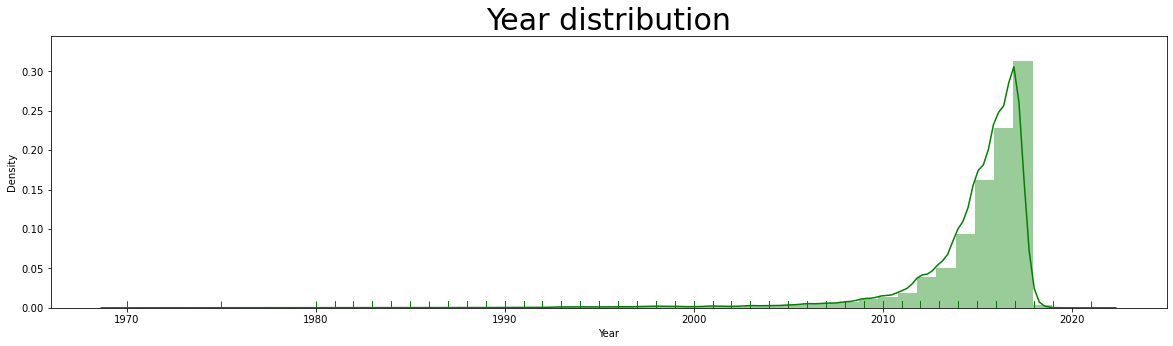

In [258]:
plt.figure(figsize=(20,5))
sns.distplot(data_games_modified_dates['Year'],rug=bool,color="g").set_title('Year distribution', fontsize=30)
plt.show()

Se puede observar que cada año incrementa el numero de juegos en la plataforma. Siendo el año 2018 el quue mas instancias tiene.

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


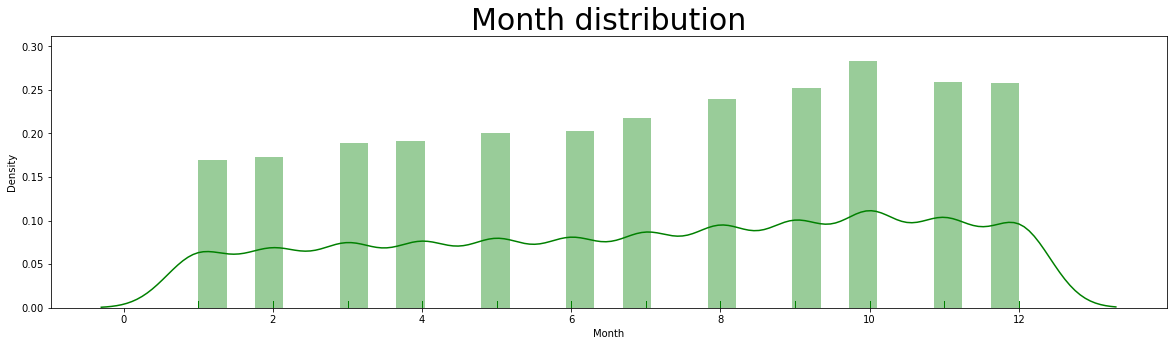

In [259]:
plt.figure(figsize=(20,5))
sns.distplot(data_games_modified_dates['Month'],rug=bool,color="g").set_title('Month distribution', fontsize=30)
plt.show()

La distribucion de en que mes se publican los juegos en la plataforma esta distribuida de una manera tal que que en el segundo semestre ingresan mas juegos, habiendo un pico en octubre y con noviembre y diciembre teniendo aprroximanamente la misma distribucion y son despues de octubre los que mas instancias tienen.

Por lo tanto es el ultimo 4to del año en el que mas juegos se publican.

In [260]:
data_games_modified_genres = data_games_modified_dates.copy()

g = data_games_modified_genres['genres'].apply(pd.Series, 1).stack()
g.index = g.index.droplevel(-1)
# Assign name to column
g.name = 'Genres'
# delete column
del data_games_modified_genres['genres']
# join new column with the existing dataframe
df_genres = data_games_modified_genres.join(g)

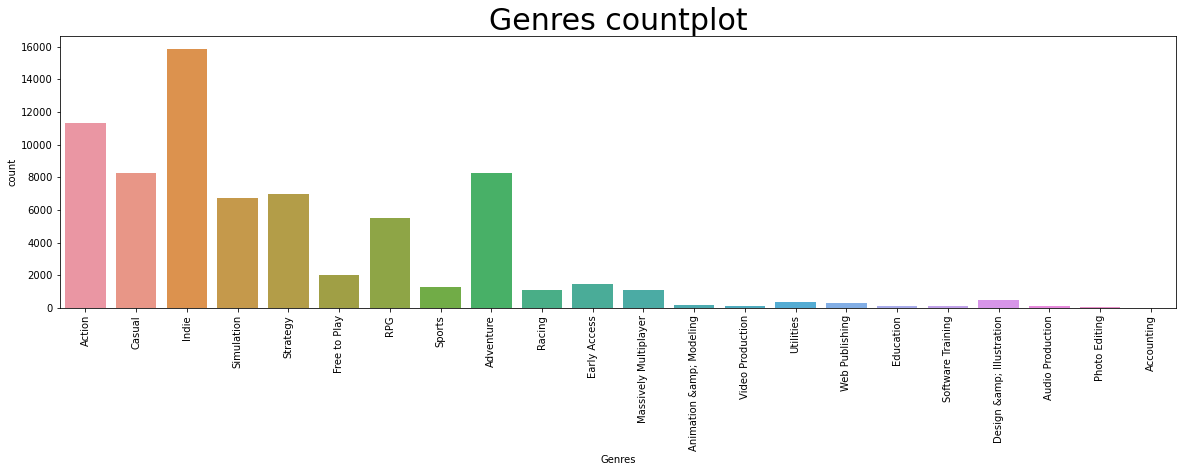

In [261]:
# Count of movies according to genre
plt.figure(figsize=(20,5))
sns.countplot(x='Genres', data=df_genres).set_title('Genres countplot', fontsize=30)
plt.xticks(rotation=90)
plt.show()

En la columna genres se especifican no solo los generos de los juegos que se encuentran en la plataforma, tambien se encuentran los tipos de programas que se venden en steam, como de "Photo Editing", "Audio Production", "Accounting", etc.

Podemos notar que la mayoria de las instancias corresonden a videojuegos, siendo notablle la diferencia en comparacion a los programas.

En el grafico podemos diferenciar los videojuegos de los programas ya que desde Massively Multiplayer (incluido) para la izquierda se representan los videojuegos y hacia la derecha los softwares.

Los juegos más populares son del género Indie seguido de action.

In [262]:
data_games_modified_specs = data_games_modified_dates.copy()

s = data_games_modified_specs['specs'].apply(pd.Series, 1).stack()
s.index = s.index.droplevel(-1)
# Assign name to column
s.name = 'Specs'
# delete column
del data_games_modified_specs['specs']
# join new column with the existing dataframe
df_specs = data_games_modified_specs.join(s)

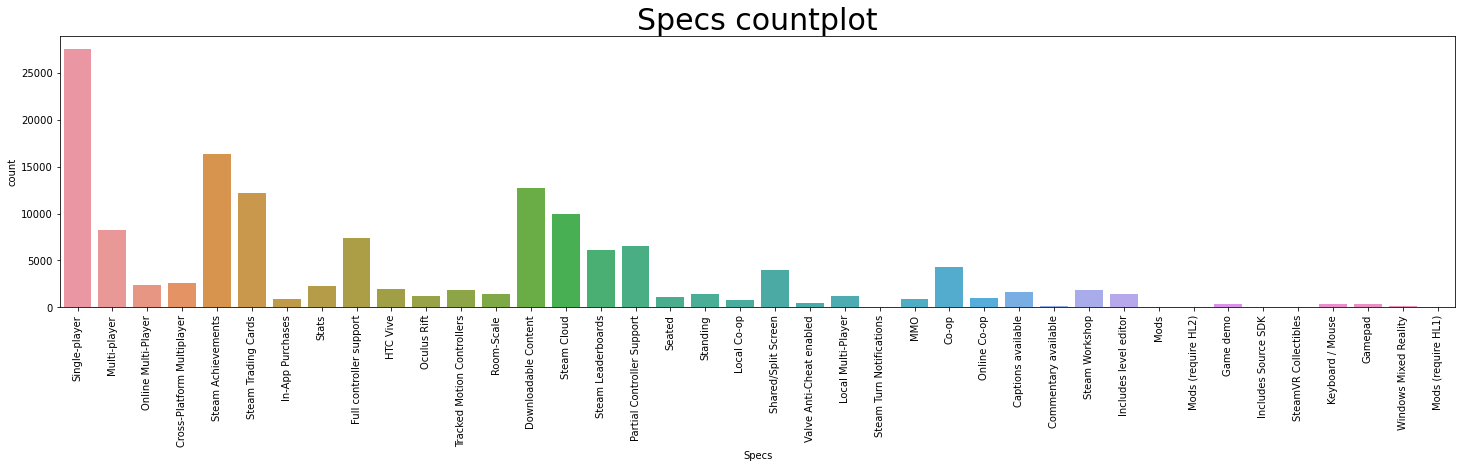

In [263]:
# Count of movies according to genre
plt.figure(figsize=(25,5))
sns.countplot(x='Specs', data=df_specs).set_title('Specs countplot', fontsize=30)
plt.xticks(rotation=90)
plt.show()

Se puede observar que la mayoria de las instancias corresponden a juegos "Single-player". Las especificacion mas relevante que le sigue es Steam Achievments que corresponde a que el juego otorga "logros" por determinadas acciones realizadas en el juego.

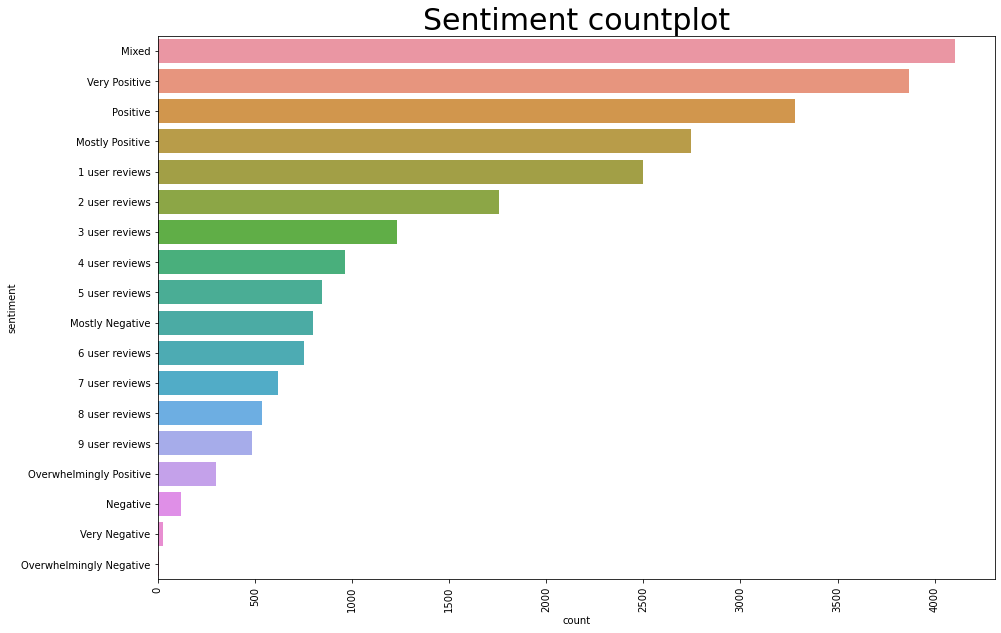

In [264]:
plt.figure(figsize=(15,10))
sns.countplot(y='sentiment', data=data_games_modified_dates,order=data_games_modified_dates['sentiment'].value_counts().index).set_title('Sentiment countplot', fontsize=30)
plt.xticks(rotation=90)
plt.show()

Estudiando la grafica de Sentiment countplot, se demuestra que la mayoria de los juegos tienen un sentimiento mixto o son positivas, indicando que en general los usuarios son mas propensos a dejar criticas positivas a los juegos.

Tambien notamos que hay unas categorias que son 1-9 user reviews. Esto nos podria estar diciendo que recien a partir de las decima calificacion se le otorga un sentimiento al juego. Estas "user reviews" podriamos considerarlas como valores de instancia nulos ya que no nos indica el sentmiento y no estan aportando informacion a la columna sentiment.

In [265]:
data_games_modified_dates['sentiment'] = data_games_modified_dates['sentiment'].apply(lambda x: 'Without Sentiment' if x not in ['Mixed','Mostly Negative','Mostly Positive','Negative','Overwhelmingly Negative','Overwhelmingly Positive','Positive','Very Negative','Very Positive'] else x)

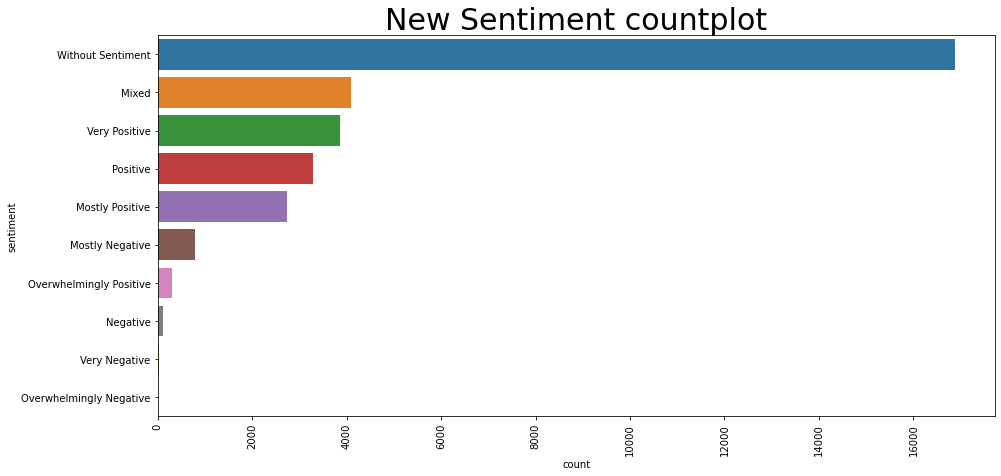

In [266]:
plt.figure(figsize=(15,7))
sns.countplot(y='sentiment', data=data_games_modified_dates,order=data_games_modified_dates['sentiment'].value_counts().index).set_title('New Sentiment countplot', fontsize=30)
plt.xticks(rotation=90)
plt.show()

Luego de realizar la transformacion, notamos que por amplia mayoria, los productos en steam no contienen un sentimiento asociado.

Creo un archivo csv con el dataset limpio y ordenado.

In [267]:
data_games_modified_dates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32133 entries, 0 to 32134
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      32133 non-null  object        
 1   app_name_or_title       32132 non-null  object        
 2   developer               28888 non-null  object        
 3   publisher               28900 non-null  object        
 4   price                   30756 non-null  float64       
 5   free_to_play            32133 non-null  bool          
 6   genres                  28851 non-null  object        
 7   tags                    31971 non-null  object        
 8   specs                   31464 non-null  object        
 9   early_access            32133 non-null  bool          
 10  sentiment               32133 non-null  object        
 11  has_metascore           32133 non-null  bool          
 12  release_date            29824 non-null  dateti

In [268]:
data_games_clean = data_games_modified_dates.iloc[:,[0,1,2,3,4,10,17]].copy()
data_games_clean['info_soup'] = data_games_modified_2.soup

Reemplazamos la columna de release_date por Year, ya que los juegos o software suelen ser categorizados por año de lanzamiento.

Reemplazamos tambien las columnas de free_to_play, early_access, has_metascore, genres, specs y tags por info_soup.

El dataset queda de la siguiente manera:

In [269]:
data_games_clean.head(1)

,id,app_name_or_title,developer,publisher,price,sentiment,Year,info_soup
0,761140,Lost Summoner Kitty,Kotoshiro,Kotoshiro,4.99,Without Sentiment,2018.0,kotoshiro strategy action indie casual simulat...


In [270]:
data_games_clean.to_csv('data_games_clean.csv',index=False)

### **Reviews + Games**

In [271]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime
import random

In [93]:
data_reviews_clean = pd.read_csv("data_reviews_clean.csv")
data_reviews_clean.head(1)

,product_id,text,hours,products,date,early_access,compensation,found_funny,new_user_id
0,725280,This would not be acceptable as an entertainme...,0.1,41.0,2017-12-17,False,False,0.0,0.0


In [92]:
data_games_clean = pd.read_csv("data_games_clean.csv")
data_games_clean.head(1)

,id,app_name_or_title,developer,publisher,price,sentiment,Year,info_soup
0,761140,Lost Summoner Kitty,Kotoshiro,Kotoshiro,4.99,Without Sentiment,2018.0,kotoshiro strategy action indie casual simulat...


In [275]:
data_reviews_games = pd.merge(left=data_reviews_clean, right=data_games_clean, how='left', left_on='product_id', right_on='id')
data_reviews_games = data_reviews_games.drop(['product_id'],axis=1)
data_reviews_games = data_reviews_games.iloc[:,[8,9,7,3,14,10,11,2,12,5,6,13,1,4,0,15]]
data_reviews_games = data_reviews_games.rename(columns={'date': 'date_of_review','Year': 'launch_year','products': 'products_sold','early_access': 'is_early_access_review'})
data_reviews_games.head(3)

,id,app_name_or_title,new_user_id,date_of_review,launch_year,developer,publisher,products_sold,price,compensation,found_funny,sentiment,hours,is_early_access_review,text,info_soup
0,725280,Psi Project,0.0,2017-12-17,2017.0,Vyacheslav Shilikhin,Vyacheslav Shilikhin,41.0,2.99,False,0.0,Positive,0.1,False,This would not be acceptable as an entertainme...,vyacheslavshilikhin action adventure indie sim...
1,328100,Gunspell - Steam Edition,1.0,2017-08-02,2014.0,Ino-Co Plus,KISS ltd,1386.0,14.99,False,0.0,Mixed,13.2,False,Addictive RPG ! Works fine on linux though it ...,inocoplus kissltd adventure rpg indie puzzle m...
2,725280,Psi Project,2.0,2017-11-12,2017.0,Vyacheslav Shilikhin,Vyacheslav Shilikhin,1706.0,2.99,False,0.0,Positive,0.1,False,Прикольная стрелялка. Взял дешево на распродаже.,vyacheslavshilikhin action adventure indie sim...


In [276]:
data_reviews_games_modified_dates = data_reviews_games.copy()

data_reviews_games_modified_dates['date_of_review']=pd.to_datetime(data_reviews_games_modified_dates['date_of_review'], format='%Y-%m-%d', errors='coerce')
#data_games_modified['release_date']=data_games_modified['release_date'].apply(pd.to_datetime)

data_reviews_games_modified_dates['date_of_review'] = data_reviews_games_modified_dates.date_of_review.dt.year
data_reviews_games_modified_dates= data_reviews_games_modified_dates.rename(columns={'date_of_review':'year_of_review'})

data_reviews_games_modified_dates.head(2)

,id,app_name_or_title,new_user_id,year_of_review,launch_year,developer,publisher,products_sold,price,compensation,found_funny,sentiment,hours,is_early_access_review,text,info_soup
0,725280,Psi Project,0.0,2017,2017.0,Vyacheslav Shilikhin,Vyacheslav Shilikhin,41.0,2.99,False,0.0,Positive,0.1,False,This would not be acceptable as an entertainme...,vyacheslavshilikhin action adventure indie sim...
1,328100,Gunspell - Steam Edition,1.0,2017,2014.0,Ino-Co Plus,KISS ltd,1386.0,14.99,False,0.0,Mixed,13.2,False,Addictive RPG ! Works fine on linux though it ...,inocoplus kissltd adventure rpg indie puzzle m...


In [277]:
data_reviews_games_clean = data_reviews_games_modified_dates.copy()

In [278]:
data_reviews_games_clean.to_csv('data_reviews_games_clean.csv',index=False)

In [279]:
data_reviews_games_clean = pd.read_csv("data_reviews_games_clean.csv")
data_reviews_games_clean.head(1)

,id,app_name_or_title,new_user_id,year_of_review,launch_year,developer,publisher,products_sold,price,compensation,found_funny,sentiment,hours,is_early_access_review,text,info_soup
0,725280,Psi Project,0.0,2017,2017.0,Vyacheslav Shilikhin,Vyacheslav Shilikhin,41.0,2.99,False,0.0,Positive,0.1,False,This would not be acceptable as an entertainme...,vyacheslavshilikhin action adventure indie sim...


#### **Exploracion de los datos**

In [280]:
data_reviews_games_modified_dates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 779951 entries, 0 to 779950
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      779951 non-null  int64  
 1   app_name_or_title       779951 non-null  object 
 2   new_user_id             779951 non-null  float64
 3   year_of_review          779951 non-null  int64  
 4   launch_year             775989 non-null  float64
 5   developer               775891 non-null  object 
 6   publisher               776053 non-null  object 
 7   products_sold           779951 non-null  float64
 8   price                   773278 non-null  float64
 9   compensation            779951 non-null  bool   
 10  found_funny             779951 non-null  float64
 11  sentiment               779951 non-null  object 
 12  hours                   779951 non-null  float64
 13  is_early_access_review  779951 non-null  bool   
 14  text                

Entonces contamos con un dataset de 16 columnas y 779951 filas.

El dataset contiene el ID y el nombre del producto, seguido del ID del usuario que realizo la review y la fecha en la que lo hizo. Luego tenemos datos del producto coomo la fecha de lanzamiento, desarrollador, publicador, cantidad de productos vendidos, precio, sentimiento y la sopa de informacion. Con respecto a los datos de la review y al usuarioo que la realizo tenemos los campos compensation, found_funny, horas de juego del usuario en el producto, el texto de la review y si esta fue realizada en un early_access.

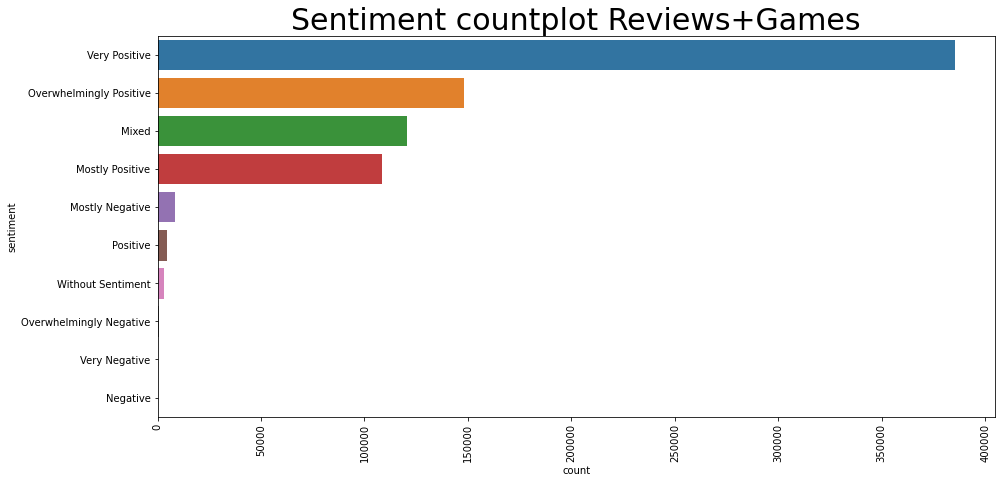

In [281]:
plt.figure(figsize=(15,7))
sns.countplot(y='sentiment', data=data_reviews_games_modified_dates,order=data_reviews_games_modified_dates['sentiment'].value_counts().index).set_title('Sentiment countplot Reviews+Games', fontsize=30)
plt.xticks(rotation=90)
plt.show()

Luego combinar los datasets de games y reviews, observamos que la gram mayoria de las reviews realizadas son a juegos que tienen un sentimiento muy positivo. Representando una clara diferencia con los negativos y tambien encontramos un numero elevado de reviews a juegos con un sentimiento mixto.

De los graficos anteriores hay algo que consideramos importante y es que en el dataset de games la mayoria de los juegos entran en la categoria de Without Sentiment, pero en el dataset de Reviews+Games, es una gran minoria las reviews que son a juegos que no tienen un sentimiento asociado.

In [282]:
data_reviews_games_modified_dates.groupby('sentiment').agg({'sentiment': 'count'})

,sentiment
sentiment,
Mixed,120782
Mostly Negative,8352
Mostly Positive,108490
Negative,317
Overwhelmingly Negative,675
Overwhelmingly Positive,148206
Positive,4512
Very Negative,347
Very Positive,385263


Son en total 3007 reviews que son a juegos que no tienen un sentimiento asociado, 120782 a juegos con un sentimiento mixto, 9691 a negativos y 385263 a juegos con sentimientos positivos.

In [283]:
data_reviews_games_modified_dates.nunique()

id                         12665
app_name_or_title          12658
new_user_id               540341
year_of_review                 9
launch_year                   36
developer                   8151
publisher                   6220
products_sold               3927
price                         99
compensation                   2
found_funny                  635
sentiment                     10
hours                      21762
is_early_access_review         2
text                      718776
info_soup                  12430
dtype: int64

Es importante remarcar que de las 7779951 instancias en el dataset de reviews+games solo hay 12665 juegos distintos y en el de games hay 32133.

In [289]:
df_sentiment_and_id_game = data_reviews_games_modified_dates.iloc[:,[0,11]]
df_sentiment_and_id_game.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 779951 entries, 0 to 779950
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         779951 non-null  int64 
 1   sentiment  779951 non-null  object
dtypes: int64(1), object(1)
memory usage: 34.0+ MB


In [290]:
df_sentiment_and_id_game.head(1)

,id,sentiment
0,725280,Positive


In [291]:
df_sentiment_and_id_game = df_sentiment_and_id_game.drop_duplicates()
df_sentiment_and_id_game.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12665 entries, 0 to 750267
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         12665 non-null  int64 
 1   sentiment  12665 non-null  object
dtypes: int64(1), object(1)
memory usage: 296.8+ KB


De los 12665 juegos que se encuentran en el dataset de reviews+games la cantidad de instancias de sentimientos asocidadas es la siguiente:

In [292]:
df_sentiment_and_id_game.groupby('sentiment').agg({'sentiment': 'count'})

,sentiment
sentiment,
Mixed,3037
Mostly Negative,589
Mostly Positive,2005
Negative,96
Overwhelmingly Negative,6
Overwhelmingly Positive,275
Positive,1612
Very Negative,27
Very Positive,3113


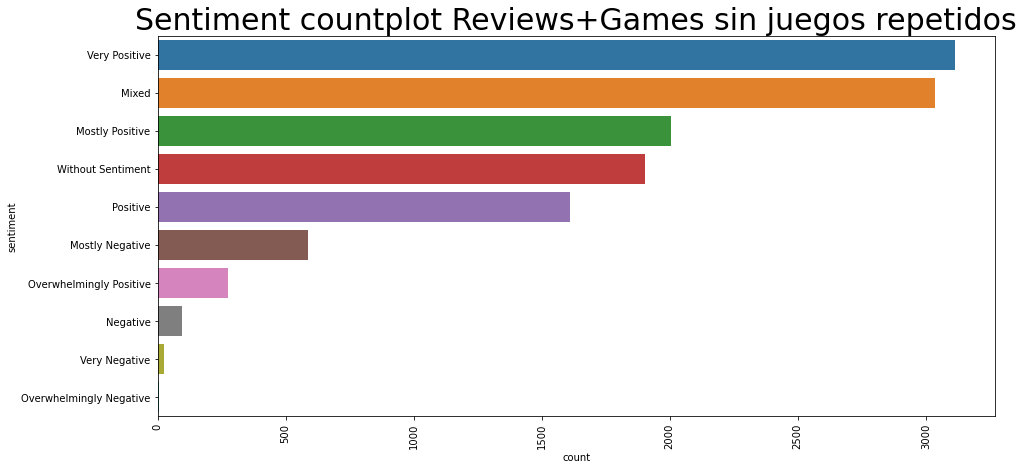

In [293]:
plt.figure(figsize=(15,7))
sns.countplot(y='sentiment', data=df_sentiment_and_id_game,order=df_sentiment_and_id_game['sentiment'].value_counts().index).set_title('Sentiment countplot Reviews+Games sin juegos repetidos', fontsize=30)
plt.xticks(rotation=90)
plt.show()

Por lo tanto la mayoria de los juegos que tienen una review en el dataset tienen  un sentimiento muy positivo seguido de los que tienen un sentmiento mixto.

Hay 1905 juegos sin un sentimiento asociado pero que tienen una review representando un 15% de los juegos con review y siendo 4ta de 10 categorias con mas intancias en lo que respecta a sentimiento.

Mas adelante intentaremos otorgarles un sentimiento a dichos juegos basandonos en los textos de las reviews de los juegos que si tienen sentimientos asociados. Para esto seguiremos trabajando con nuestro dataset que contiene los juegos sin repetirse y sus sentimientos pero incluiremos los textos de las reviews realizando un stemming.

#### **Procesamiento de Lenguaje Natural**

In [294]:
import itertools

import nltk

#nltk.download()

##### **Stemming**

Por razones gramaticales muchas palabras pueden escribirse de manera distinta (debido a conjugación, género, número) pero tener el mismo significado para el texto. Por ejemplo si decimos "jugar", "jugando" o "juega", debido a como estan conjugadas, la computadora puede tratarlas como palabras distintas. Pero, en términos de significado, todas estan relacionadas al verbo Jugar. Muchas veces nos va a convenir unir todas estos términos en uno solo.

Una de las manera de hacer esto es por "STEMMING". El Stemming es un proceso eurístico que recorta la terminación de las palabras, agrupándolas por su raiz. Reduzcamos la cantidad de palabras diferentes en nuestro dataset utilizando este proceso.


Importamos los stopwords del inglés

In [295]:
# Importamos esta libreria que nos permite reemplzar caracteres
import re

# Importamos la función que nos permite Stemmizar de nltk y definimos el stemmer
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

# Traemos nuevamente las stopwords
stopwords = nltk.corpus.stopwords.words('english')
#stopword.remove('no')
#stopword.remove('not')

In [296]:
# Recorremos todos los textos y le vamos aplicando la Normalizacion y luega el Stemming a cada uno
text_list=[]
for texto in data_reviews_games_modified_dates.text:
    # Vamos a reemplzar los caracteres que no sean leras por espacios
    texto=re.sub("[^a-zA-Z]"," ",str(texto))
    # Pasamos todo a minúsculas
    texto=texto.lower()
    # Tokenizamos para separar las palabras del texto
    texto=nltk.word_tokenize(texto)
    # Eliminamos las palabras de menos de 3 letras
    texto = [palabra for palabra in texto if len(palabra)>3]
    # Sacamos las Stopwords
    texto = [palabra for palabra in texto if not palabra in stopwords]
    
    ## Hasta acá Normalizamos, ahora a stemmizar
    
    # Aplicamos la funcion para buscar la raiz de las palabras
    texto=[stemmer.stem(palabra) for palabra in texto]
    # Por ultimo volvemos a unir el texto
    texto=" ".join(texto)
    
    # Vamos armando una lista con todos los textos
    text_list.append(texto)

data_reviews_games_modified_dates["text_stem"] = text_list

In [297]:
data_reviews_games_modified_dates.head(2)

,id,app_name_or_title,new_user_id,year_of_review,launch_year,developer,publisher,products_sold,price,compensation,found_funny,sentiment,hours,is_early_access_review,text,info_soup,text_stem
0,725280,Psi Project,0.0,2017,2017.0,Vyacheslav Shilikhin,Vyacheslav Shilikhin,41.0,2.99,False,0.0,Positive,0.1,False,This would not be acceptable as an entertainme...,vyacheslavshilikhin action adventure indie sim...,would accept entertain even back graphic effor...
1,328100,Gunspell - Steam Edition,1.0,2017,2014.0,Ino-Co Plus,KISS ltd,1386.0,14.99,False,0.0,Mixed,13.2,False,Addictive RPG ! Works fine on linux though it ...,inocoplus kissltd adventure rpg indie puzzle m...,addict work fine linux though minor bug recom ...


Tengo todos los textos de la reviews con un formato que se puede vectorizar, ahora para cada instancia en nuestro dataset que contiene el juego y su sentimiento agregaremos una columna que contenga todos los textos asociados a cada uno.

In [298]:
df_sentiment_and_id_game["all_text_stem"] = np.nan
for i in df_sentiment_and_id_game.id:
    df_sentiment_and_id_game.all_text_stem[df_sentiment_and_id_game.id == i] = data_reviews_games_modified_dates.text_stem[data_reviews_games_modified_dates.id == i].str.cat(sep=' ')

<ipython-input-298-31f0e7604f1b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sentiment_and_id_game.all_text_stem[df_sentiment_and_id_game.id == i] = data_reviews_games_modified_dates.text_stem[data_reviews_games_modified_dates.id == i].str.cat(sep=' ')


In [299]:
df_sentiment_and_id_game

,id,sentiment,all_text_stem
0,725280,Positive,would accept entertain even back graphic effor...
1,328100,Mixed,addict work fine linux though minor bug recom ...
3,631920,Positive,somewher zibylon zibylon command centr read re...
4,35140,Overwhelmingly Positive,game linear compar other good dollar winter sa...
5,288690,Without Sentiment,hello name dominik review bought sudoku detekt...
...,...,...,...
750057,460340,Very Positive,like strategi turn base game nice origin point...
750180,578320,Without Sentiment,bought game summer sale wait age dark parabl s...
750182,546380,Mixed,love chicken best game ever best hood ghetto s...
750221,608390,Mixed,garbag sinc review help intend justifi opinion...


Le doy un valor numerico a cada tipo de  de la siguiente manera:

1. Overwhelmingly Negative
1. Mostly Negative
1. Very Negative
1. Negative
1. Mixed
1. Positive
1. Very Positive
1. Mostly Positive
1. Overwhelmingly Positive

A las instancias de Without Sentiment les proporcionamos el valor 0.

In [300]:
df_sentiment_and_id_game.sentiment = df_sentiment_and_id_game.sentiment.apply(lambda x: 9 if x == 'Overwhelmingly Positive' else x)
df_sentiment_and_id_game.sentiment = df_sentiment_and_id_game.sentiment.apply(lambda x: 1 if x == 'Overwhelmingly Negative' else x)
df_sentiment_and_id_game.sentiment = df_sentiment_and_id_game.sentiment.apply(lambda x: 8 if x == 'Mostly Positive' else x)
df_sentiment_and_id_game.sentiment = df_sentiment_and_id_game.sentiment.apply(lambda x: 2 if x == 'Mostly Negative' else x)
df_sentiment_and_id_game.sentiment = df_sentiment_and_id_game.sentiment.apply(lambda x: 7 if x == 'Very Positive' else x)
df_sentiment_and_id_game.sentiment = df_sentiment_and_id_game.sentiment.apply(lambda x: 3 if x == 'Very Negative' else x)
df_sentiment_and_id_game.sentiment = df_sentiment_and_id_game.sentiment.apply(lambda x: 6 if x == 'Positive' else x)
df_sentiment_and_id_game.sentiment = df_sentiment_and_id_game.sentiment.apply(lambda x: 4 if x == 'Negative' else x)
df_sentiment_and_id_game.sentiment = df_sentiment_and_id_game.sentiment.apply(lambda x: 5 if x == 'Mixed' else x)
df_sentiment_and_id_game.sentiment = df_sentiment_and_id_game.sentiment.apply(lambda x: 0 if x == 'Without Sentiment' else x)
df_sentiment_and_id_game.reset_index(drop=True, inplace=True)
df_sentiment_and_id_game.tail(5)

,id,sentiment,all_text_stem
12660,460340,7,like strategi turn base game nice origin point...
12661,578320,0,bought game summer sale wait age dark parabl s...
12662,546380,5,love chicken best game ever best hood ghetto s...
12663,608390,5,garbag sinc review help intend justifi opinion...
12664,518790,8,first hunt game ever play streamer youtub hunt...


##### **Vectorizar**

Hasta ahora, tenemos un grupo de palabras por los textos de cada juego (bag of words) stemmizado. La idea ahora es representar esta lista de palabras como un vector. Para esto vamos a utilizar la función CountVectorizer de Scikit-Learn. Esta función nos permite representar cada texto por un vector con un 1 en las palabras que contiene y un 0 en las que no. Además, vamos a trabajar únicamente con las palabras que aparecen más veces en el texto, ya que las que aparecen una única vez o pocas veces no nos van a brindar información que se pueda generalizar.

Tomamos la lista de palabras de cada texto (exceptuando las que no tienen sentimiento ya que son las que queremos predecir) y el vector que nos dice el sentimiento del juego.

In [301]:
text_list = list(df_sentiment_and_id_game.all_text_stem.values)
sentiment_number = df_sentiment_and_id_game.sentiment[df_sentiment_and_id_game.sentiment > 0]

Preparamos el conversor de bag of words a vectores que traemos de sklearn. CountVectorizer posee varias funcionalidades que pueden determinarse a partir de parámetros.

In [302]:
from sklearn.feature_extraction.text import CountVectorizer

# Usaremos solo las 10000 palabras con mas frecuencia en todo el corpus para generar los vectores
max_features=10000

# Es decir que cada instancia tendrá 10000 features
cou_vec=CountVectorizer(max_features=max_features) # stop_words="english" , ngram_range=(1, 2)

Ahora sí, vamos a generar los vectores para cada texto a partir del corpus total.

In [303]:
matriz_textos = cou_vec.fit_transform(text_list)

# Tomamos las palabras
all_words = cou_vec.get_feature_names()

# Vizualizamos las 50 palabras mas usadas
print("Primeras 50 palabras mas usadas: ",all_words[0:50])

Primeras 50 palabras mas usadas:  ['abandon', 'abandonwar', 'abduct', 'aber', 'abil', 'abilit', 'abilti', 'abit', 'abl', 'abliti', 'abnorm', 'aboard', 'abomin', 'abort', 'abound', 'abrupt', 'abruptli', 'absenc', 'absent', 'absolut', 'absolutley', 'absolutli', 'absolv', 'absorb', 'absoult', 'abstract', 'absurd', 'absurdli', 'abund', 'abus', 'abysm', 'abyss', 'abzu', 'academi', 'acc', 'acceler', 'accent', 'accentu', 'accept', 'acces', 'access', 'accessori', 'accid', 'accident', 'acclaim', 'accommod', 'accomod', 'accompani', 'accomplish', 'accord']


Elimino las filas que corresponden a instancias sin sentimiento asociado y creo una matriz con estas instancias que luego serviran para realizar las predicciones

In [304]:
#Creo una lista con los indices de las intancias sin sentimiento
list_of_rows_WS = []
list_of_rows = []
for i in df_sentiment_and_id_game.index:
    if df_sentiment_and_id_game.iloc[i].sentiment == 0:
        list_of_rows_WS.append(i)
    else:
        list_of_rows.append(i)

In [305]:
matriz_textos_WS = matriz_textos[list_of_rows_WS]
matriz_textos = matriz_textos[list_of_rows]

In [306]:
matriz_textos_WS

<1905x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 101166 stored elements in Compressed Sparse Row format>

In [307]:
matriz_textos

<10760x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 4546825 stored elements in Compressed Sparse Row format>

Obtuvimos una matriz con los vectores de las instancias sin sentmientos y otra con todos los vectores con sentimientos.

---
## **4- Modelar**
---

Importamos las librerias que utilizaremos

In [1001]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

Primero separamos en test y train.

In [1002]:
x = matriz_textos.toarray()
y = sentiment_number

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3,random_state=42,stratify=y)

Tambien definimos una función que nos permitira plotear los resultados en una matriz de confusión.

In [1003]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def confusion(ytest,y_pred):
    
    names=[1,2,3,4,5,6,7,8,9]
    cm=confusion_matrix(ytest,y_pred)
    f,ax=plt.subplots(figsize=(11,9))
    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="w",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    return cm

Realizo una funcion para graficar los resultados del gridsearch y analizar de mejor manera la variacion de hiperparametros.

Para cada modelado vamos a realizar los siguientes pasos y luego los analizaremos en conjunto:

* Construyo el modelo
* Defino las variables en hiperparametros para el gridsearch (en los casos que utilice gridsearch)
* Entreno el modelo
* Construyo una matriz de confusion para cada modelo
* Realizo un Bench Marking

In [1004]:
def graficas_cross_validation (grid_params,gs):  
    df = pd.DataFrame(gs.cv_results_)
    results = ['mean_test_score',
               'mean_train_score',
               'std_test_score', 
               'std_train_score']

    def pooled_var(stds):
        # https://en.wikipedia.org/wiki/Pooled_variance#Pooled_standard_deviation
        n = 5 # size of each group
        return np.sqrt(sum((n-1)*(stds**2))/ len(stds)*(n-1))

    fig, axes = plt.subplots(1, len(grid_params), 
                             figsize = (5*len(grid_params), 7),
                             sharey='row')
    axes[0].set_ylabel("Score", fontsize=25)


    for idx, (param_name, param_range) in enumerate(grid_params.items()):
        grouped_df = df.groupby(f'param_{param_name}')[results]\
            .agg({'mean_train_score': 'mean',
                  'mean_test_score': 'mean',
                  'std_train_score': pooled_var,
                  'std_test_score': pooled_var})

        previous_group = df.groupby(f'param_{param_name}')[results]
        axes[idx].set_xlabel(param_name, fontsize=30)
        axes[idx].set_ylim(0.0, 1.1)
        lw = 2
        axes[idx].plot(param_range, grouped_df['mean_train_score'],'o-', label="Training score",
                    color="darkorange", lw=lw)
        axes[idx].fill_between(param_range,grouped_df['mean_train_score'] - grouped_df['std_train_score'],
                        grouped_df['mean_train_score'] + grouped_df['std_train_score'], alpha=0.2,
                        color="darkorange", lw=lw)
        axes[idx].plot(param_range, grouped_df['mean_test_score'],'o-', label="Cross-validation score",
                    color="navy", lw=lw)
        axes[idx].fill_between(param_range, grouped_df['mean_test_score'] - grouped_df['std_test_score'],
                        grouped_df['mean_test_score'] + grouped_df['std_test_score'], alpha=0.2,
                        color="navy", lw=lw)

    handles, labels = axes[0].get_legend_handles_labels()
    fig.suptitle('Validation curves', fontsize=40)
    fig.legend(handles, labels, loc=8, ncol=2, fontsize=20)

    fig.subplots_adjust(bottom=0.25, top=0.85)  
    plt.show()

Creo una funcion que agregue a un dataframe que contenga la precision de exactitud para cada sentimiento y el total de precision para los positivos como los negativos.

In [1005]:
from sklearn.metrics import f1_score

dataframe_score = pd.DataFrame(columns=['Modelo','Score','Negativos','Positivos','1','2','3','4','5','6','7','8','9'])



def tabla_f1_score(y_pred,modelo,dataframe_score,conf_matrix,score):
    
    negativos = 0
    positivos = 0
    negativos_bien_pred=0
    positivos_bien_pred=0
    negativos_bien_pred_con_mixed=0
    positivos_bien_pred_con_mixed=0
    for i in range(0,9):
        if i < 4:
            negativos = negativos + np.sum(conf_matrix[i])
            negativos_bien_pred = negativos_bien_pred + conf_matrix[i][i]
        elif i >4:
            positivos = positivos + np.sum(conf_matrix[i])
            positivos_bien_pred = positivos_bien_pred + conf_matrix[i][i]
            
    
    
    # Calculo los valores bien predichos     
    accuracy_negativos = negativos_bien_pred/negativos
    accuracy_positivos = positivos_bien_pred/positivos
    

        
    list_score = [modelo,score,accuracy_negativos,accuracy_positivos]
    for i in f1_score(ytest, y_pred, average=None):
        list_score.append(i)
        
    a_series = pd.Series(list_score, index = dataframe_score.columns)
    
    dataframe_score = dataframe_score.append(a_series, ignore_index=True)
    
    return dataframe_score
    



    

---
### **Naive Bayes**

---

En Gaussian Naive Bayes no hay un hiperparámetro para sintonizar, por lo que no tiene nada para buscar con grid_search. 

In [1006]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(xtrain,ytrain)
print("acc : ", nb.score(xtest,ytest))

acc :  0.2850061957868649


#### **Evaluacion del Modelo**

In [1]:
score_nb = nb.score(xtest,ytest)

NameError: name 'nb' is not defined

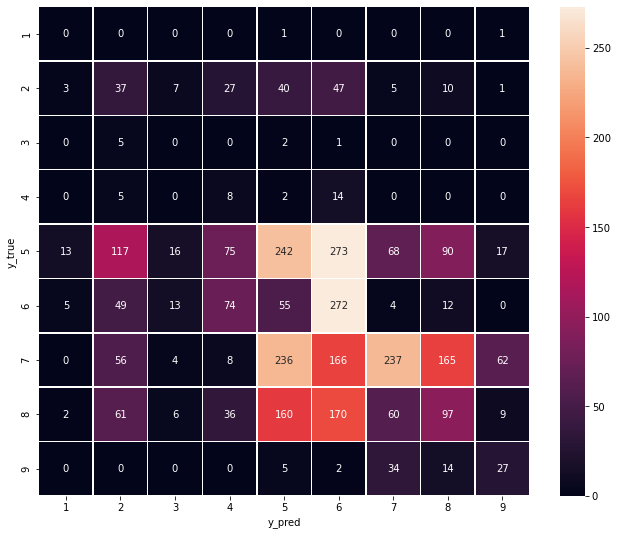

In [1008]:
y_pred_train_nb=nb.predict(xtrain)
y_pred_nb=nb.predict(xtest)
conf_matrix_nb = confusion(ytest,y_pred_nb)

In [1009]:
dataframe_score=tabla_f1_score(y_pred_nb,'Naive Bayes',dataframe_score,conf_matrix_nb,score_nb)

In [1010]:
dataframe_score

,Modelo,Score,Negativos,Positivos,1,2,3,4,5,6,7,8,9
0,Naive Bayes,0.285006,0.208333,0.301285,0.0,0.145957,0.0,0.062257,0.292624,0.380686,0.353204,0.196158,0.271357


In [1083]:
from sklearn.metrics import classification_report

print(classification_report(ytest, y_pred_nb))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.11      0.21      0.15       177
           3       0.00      0.00      0.00         8
           4       0.04      0.28      0.06        29
           5       0.33      0.27      0.29       911
           6       0.29      0.56      0.38       484
           7       0.58      0.25      0.35       934
           8       0.25      0.16      0.20       601
           9       0.23      0.33      0.27        82

    accuracy                           0.29      3228
   macro avg       0.20      0.23      0.19      3228
weighted avg       0.36      0.29      0.29      3228



Nuestro modelo de Naive Bayes tiene un score total del 29% acertando en un 21% los sentimientos negativos y un 30% los positivos, el sentimiento al que mas acerto es al 6 que corresponde a Positive.

---
### **Random Forest**

---

In [1011]:
from sklearn.ensemble import RandomForestClassifier

In [1012]:
parametros_random_forest_classifier = {
    'max_depth' : [6, 9, 12, 15,18], # None
    'n_estimators' : [50, 100], # 100
    'oob_score' : ['False','True'],#, # false
    'max_features' : ['auto','sqrt'] # auto   
}

In [1013]:
rf = RandomForestClassifier(random_state=42)

In [1014]:
gridsearch_rf = GridSearchCV(rf, parametros_random_forest_classifier, cv = 3,return_train_score=True)

In [1015]:
gridsearch_rf.fit(xtrain,ytrain)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [6, 9, 12, 15, 18],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [50, 100],
                         'oob_score': ['False', 'True']},
             return_train_score=True)

#### **Evaluacion del Modelo**

Los resultados obtenidos para cada combinacion de hiperparametros son los siguientes:

In [1016]:
pd.concat([pd.DataFrame(gridsearch_rf.cv_results_["params"]),pd.DataFrame(gridsearch_rf.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

,max_depth,max_features,n_estimators,oob_score,Accuracy
0,6,auto,50,False,0.413702
1,6,auto,50,True,0.413702
2,6,auto,100,False,0.415163
3,6,auto,100,True,0.415163
4,6,sqrt,50,False,0.413702
5,6,sqrt,50,True,0.413702
6,6,sqrt,100,False,0.415163
7,6,sqrt,100,True,0.415163
8,9,auto,50,False,0.427112
9,9,auto,50,True,0.427112


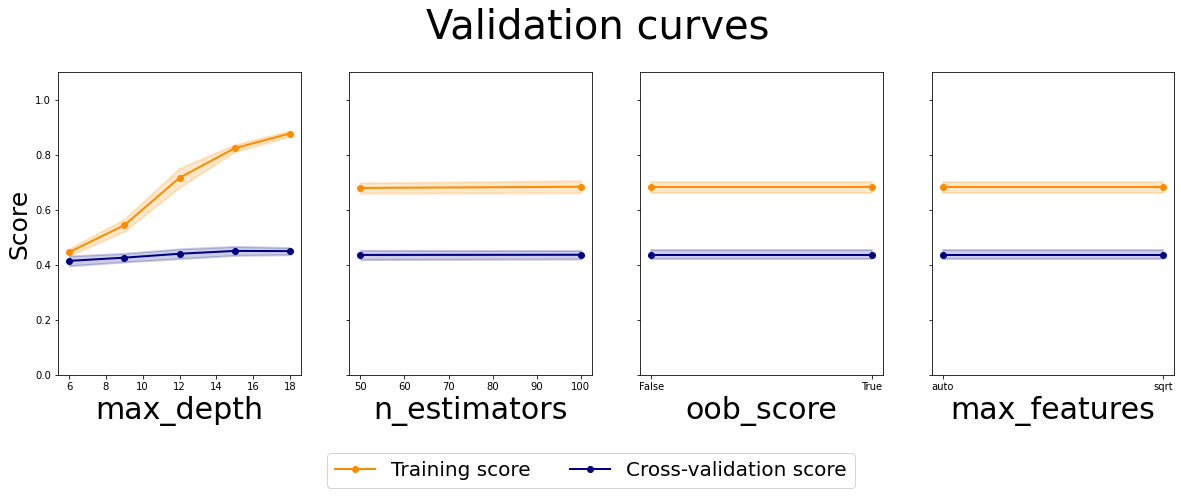

In [1017]:
graficas_cross_validation(parametros_random_forest_classifier,gridsearch_rf)

Analizamos cada hiperaparametro:
    
* n_estimators: Es aproximadamente constante para todos los valores.
* oob_score: Es aproximadamente constante para False y para True.
* Max_features: Es aproximadamente constante para todos los valores.
* Max_Depth: Es aproximadamente constante para el caso de las predicciones en un nivel de 0.4 y aumenta para valores mas altos de max_depth y el valor para training difiere mucho cuanto mas alto es el valor de max_depth.

Para todos los valores en training, su score es mucho mas alto que en test, lo  que hace que el modelo sea poco robusto.

In [1018]:
mejor_rf = gridsearch_rf.best_estimator_
mejor_resultado_rf = gridsearch_rf.best_score_

print("El mejor modelo es: ",mejor_rf)
print("El mejor resultado es: ",mejor_resultado_rf)

El mejor modelo es:  RandomForestClassifier(max_depth=18, oob_score='False', random_state=42)
El mejor resultado es:  0.45167319570780995


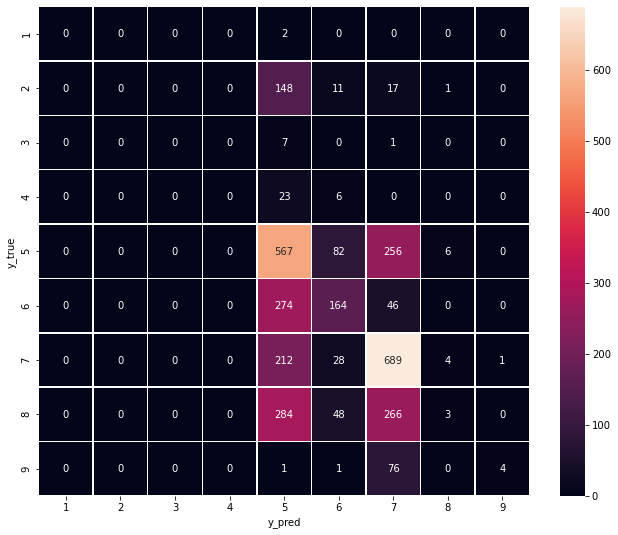

In [1019]:
y_pred_train_rf=mejor_rf.predict(xtrain)
y_pred_rf=mejor_rf.predict(xtest)
conf_matrix_rf=confusion(ytest,y_pred_rf)

Si bien nuestro modelo de Random Forest tuvo mayor precision que el de Naive Bayes, este no fue capaz de predecirnos ninguna instancia con un sentimiento menor a 5, es decir, ningun sentimiento negativo.

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


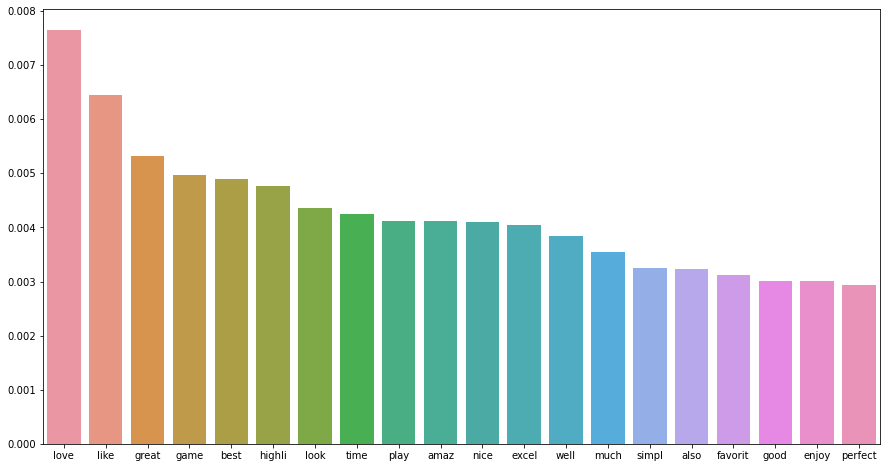

In [1020]:
# Le preguntamos la importancia de cada feature (cada palabra)
importances = mejor_rf.feature_importances_
# Tomamos la lista de palabras
all_words = cou_vec.get_feature_names()
columns = all_words

# Ordenamos por importnacia y tomamos las 20 primeras
indices = np.argsort(importances)[::-1]
indices = indices[:20]
selected_columns = [columns[i] for i in indices]
selected_importances = importances[indices]

# Por ultimo graficamos
plt.figure(figsize = (15,8))
sns.barplot(selected_columns, selected_importances)
plt.show()

Los feature mas importantes fueron game, great, love, like que son palabras que indican una review positiva mas que negativa.

Este modelo supo acertar de manera mas eficiente las intancias positivas pero se equivoco en todas las intancias negativas.

In [1021]:
dataframe_score=tabla_f1_score(y_pred_rf,'Random Forest',dataframe_score,conf_matrix_rf,mejor_resultado_rf)

In [1022]:
dataframe_score

,Modelo,Score,Negativos,Positivos,1,2,3,4,5,6,7,8,9
0,Naive Bayes,0.285006,0.208333,0.301285,0.0,0.145957,0.0,0.062257,0.292624,0.380686,0.353204,0.196158,0.271357
1,Random Forest,0.451673,0.000000,0.409329,0.0,0.000000,0.0,0.000000,0.466859,0.398058,0.603063,0.009756,0.091954


In [1082]:
from sklearn.metrics import classification_report

print(classification_report(ytest, y_pred_rf))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00       177
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00        29
           5       0.37      0.62      0.47       911
           6       0.48      0.34      0.40       484
           7       0.51      0.74      0.60       934
           8       0.21      0.00      0.01       601
           9       0.80      0.05      0.09        82

    accuracy                           0.44      3228
   macro avg       0.26      0.19      0.17      3228
weighted avg       0.39      0.44      0.37      3228



Nuestro modelo de Random Forest tiene un score total del 45% acertando en un 0% los sentimientos negativos y un 41% los positivos, el sentimiento al que mas acerto es al 7 que corresponde a Very Positive.

---
### **SVM**

---

In [1023]:
from sklearn.svm import LinearSVC

In [1024]:


parametros_svm = {'C':[0.1,1,10,100],
                  'max_iter':[500,1000],  #1000
                  'dual': [False,True], #default=True
                 }

In [1025]:
svc = LinearSVC()

In [1026]:
gridsearch_svc = GridSearchCV(svc, parametros_svm, cv = 3,return_train_score=True)

In [1027]:
gridsearch_svc.fit(xtrain,ytrain)

D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


GridSearchCV(cv=3, estimator=LinearSVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'dual': [False, True],
                         'max_iter': [500, 1000]},
             return_train_score=True)

#### **Evaluacion del Modelo**

Los resultados obtenidos para cada combinacion de hiperparametros son los siguientes:

In [1028]:
pd.concat([pd.DataFrame(gridsearch_svc.cv_results_["params"]),pd.DataFrame(gridsearch_svc.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

,C,dual,max_iter,Accuracy
0,0.1,False,500,0.440653
1,0.1,False,1000,0.433218
2,0.1,True,500,0.388477
3,0.1,True,1000,0.388344
4,1.0,False,500,0.433616
5,1.0,False,1000,0.425784
6,1.0,True,500,0.355285
7,1.0,True,1000,0.354754
8,10.0,False,500,0.436138
9,10.0,False,1000,0.426049


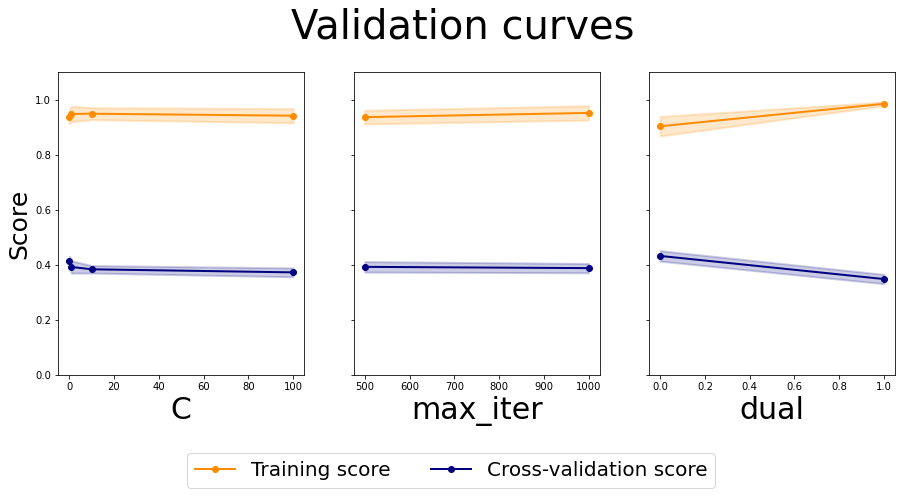

In [1029]:
graficas_cross_validation(parametros_svm,gridsearch_svc)

Analizamos cada hiperaparametro:
    
* C: Es aproximadamente constante para todos los valores en train o test pero con menor desviacion estandar en test para C <= 1 pero mayor en training.
* Max_iter: Es aproximadamente constante para 500 y para 1000.
* Dual: Mejora su valor en training para el caso de ser True pero con resultados inversos para test.

Para todos los valores en training, su score es mucho mas alto que en test, lo  que hace que el modelo sea poco robusto.

In [1030]:
mejor_svc = gridsearch_svc.best_estimator_
mejor_resultado_svc = gridsearch_svc.best_score_

print("El mejor modelo es: ",mejor_svc)
print("El mejor resultado es: ",mejor_resultado_svc)

El mejor modelo es:  LinearSVC(C=0.1, dual=False, max_iter=500)
El mejor resultado es:  0.44065252331970406


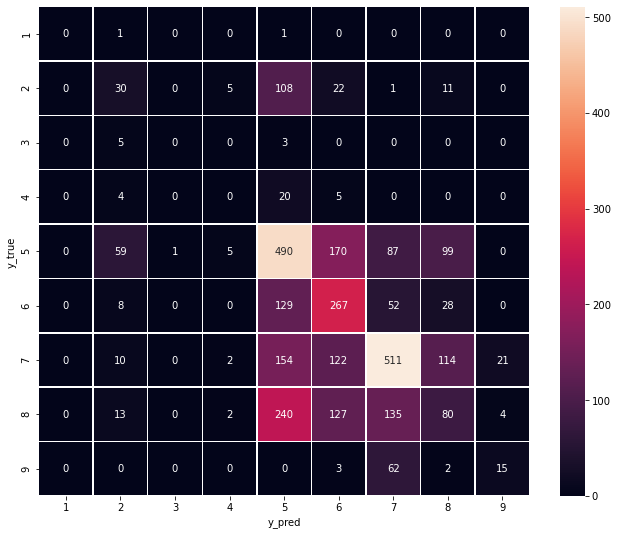

In [1031]:
y_pred_train_svm=mejor_svc.predict(xtrain)
y_pred_svm=mejor_svc.predict(xtest)
conf_matrix_svm=confusion(ytest,y_pred_svm)

In [1032]:
dataframe_score=tabla_f1_score(y_pred_svm,'SVM',dataframe_score,conf_matrix_svm,mejor_resultado_svc)

In [1033]:
dataframe_score

,Modelo,Score,Negativos,Positivos,1,2,3,4,5,6,7,8,9
0,Naive Bayes,0.285006,0.208333,0.301285,0.0,0.145957,0.0,0.062257,0.292624,0.380686,0.353204,0.196158,0.271357
1,Random Forest,0.451673,0.000000,0.409329,0.0,0.000000,0.0,0.000000,0.466859,0.398058,0.603063,0.009756,0.091954
2,SVM,0.440653,0.138889,0.415516,0.0,0.195440,0.0,0.000000,0.476654,0.445000,0.573513,0.171123,0.245902


In [1081]:
from sklearn.metrics import classification_report

print(classification_report(ytest, y_pred_svm))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.23      0.17      0.20       177
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00        29
           5       0.43      0.54      0.48       911
           6       0.37      0.55      0.45       484
           7       0.60      0.55      0.57       934
           8       0.24      0.13      0.17       601
           9       0.38      0.18      0.25        82

    accuracy                           0.43      3228
   macro avg       0.25      0.24      0.23      3228
weighted avg       0.42      0.43      0.42      3228



Nuestro modelo de SVM tiene un score total del 44% acertando en un 14% los sentimientos negativos y un 42% los positivos, el sentimiento al que mas acerto es al 7 que corresponde a Very Positive.

Tiene un peor rerendimiento total en comparacion al Random Forest pero a deiferncia de este, si supo predecir algunos resultados negativos .

---
### **RNA**

---

In [1034]:
import tensorflow as tf
from focal_loss import BinaryFocalLoss
from tensorflow import keras
from tensorflow.keras import layers

In [1035]:
def build_model_1():
    model = keras.Sequential([
        layers.Dense(28, activation='relu', input_shape=[10000]),
        layers.Dense(28, activation='relu'),
        layers.Dense(10,activation='softmax')
  ])

   

    model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
    return model

#------------------------------------------------------------------------------------------

def build_model_2():
    model = keras.Sequential([
        layers.Dense(56, activation='relu', input_shape=[10000]),
        layers.Dense(28, activation='relu'),
        layers.Dense(10,activation='softmax')
  ])

  

    model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'] 
)
    return model

#------------------------------------------------------------------------------------------

def build_model_3():
    model = keras.Sequential([
        layers.Dense(56, activation='relu', input_shape=[10000]),
        layers.Dense(56, activation='relu'),
        layers.Dense(10,activation='softmax')
  ])

  

    model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']# accuracy - binary_crossentropy - binary_accuracy
)
    return model

In [1036]:
#Funcion para obtener las predicciones y generar una lista
def prediction_rna(predictions):
    prediction_value = []
    for i in range(len(predictions)):
        prediction_value.append(np.argmax(predictions[i]))
    return prediction_value

#### **Modelo RNA 1**

In [1037]:
model_1 = build_model_1()
model_1.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_84 (Dense)             (None, 28)                280028    
_________________________________________________________________
dense_85 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_86 (Dense)             (None, 10)                290       
Total params: 281,130
Trainable params: 281,130
Non-trainable params: 0
_________________________________________________________________


In [1038]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

EPOCHS = 100

with tf.device('/CPU:0'):
    history_1 = model_1.fit(xtrain, ytrain, 
                                 epochs=EPOCHS, 
                                 validation_split = 0.5, 
                                 verbose=0,
                                 callbacks=[PrintDot()])


....................................................................................................

##### **Evaluacion del Modelo**

In [1039]:
hist_1 = pd.DataFrame(history_1.history)
hist_1['epoch'] = history_1.epoch
hist_1.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
95,0.009041,0.996283,7.718227,0.450876,95
96,0.008896,0.996814,7.622082,0.443707,96
97,0.009055,0.995751,7.742576,0.446097,97
98,0.008562,0.996814,7.760592,0.448486,98
99,0.009380,0.995486,7.883269,0.449814,99


In [1040]:
hist_1.head()

,loss,accuracy,val_loss,val_accuracy,epoch
0,2.261014,0.367499,2.291165,0.329262,0
1,1.626208,0.489910,1.770256,0.460967,1
2,1.308987,0.577536,1.616053,0.483802,2
3,1.100269,0.628784,1.678329,0.470791,3
4,0.904403,0.700743,1.780858,0.479554,4


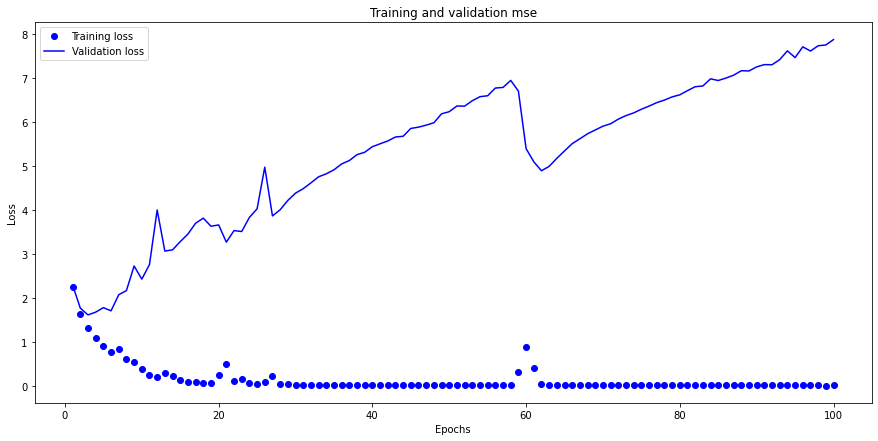

In [1041]:
history_dict_1 = history_1.history
history_dict_1.keys()


acc = history_dict_1['accuracy']
val_acc = history_dict_1['val_accuracy']
loss = history_dict_1['loss']
val_loss = history_dict_1['val_loss']

epochs = range(1, len(acc) + 1)


plt.figure(figsize=(15,7))
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation mse')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


<Figure size 432x288 with 0 Axes>

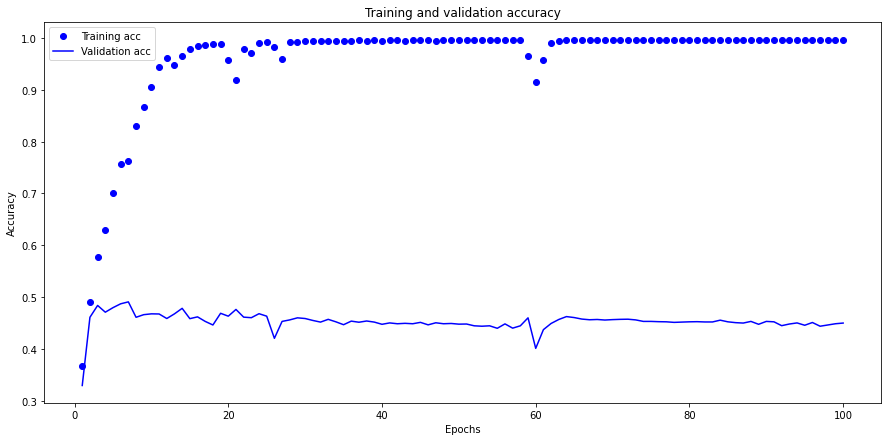

In [1042]:

plt.clf()   # clear figure
plt.figure(figsize=(15,7))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


En este gráfico, los puntos representan la pérdida y la precisión del entrenamiento, y las líneas continuas son la pérdida y la precisión de la validación.

Observamos que la pérdida de entrenamiento disminuye con cada epoch y la precisión del entrenamiento aumenta con cada epoch.

Este no es el caso para la pérdida y precisión de la validación; parecen alcanzar su punto máximo después de unos 22 epochs. Este es un ejemplo de sobreajuste: el modelo funciona mejor con los datos de entrenamiento que con los datos que nunca antes había visto. Después de este punto, el modelo sobreoptimiza y aprende representaciones específicas de los datos de entrenamiento que no se generalizan a los datos de prueba.

Para este caso particular, podríamos evitar el sobreajuste simplemente deteniendo el entrenamiento después de unos 22 epochs.

In [1043]:
predictions_1 = model_1.predict(xtest)

In [1044]:
y_pred_rna_1 = prediction_rna(predictions_1)

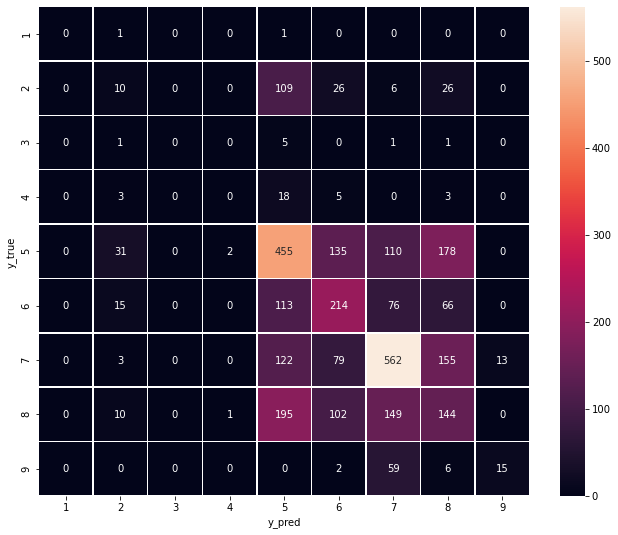

In [1045]:
conf_matrix_rna_1 = confusion(ytest,y_pred_rna_1)

In [1046]:
dataframe_score=tabla_f1_score(y_pred_rna_1,'RNA-1',dataframe_score,conf_matrix_rna_1,history_dict_1['val_accuracy'][99])

In [1047]:
dataframe_score

,Modelo,Score,Negativos,Positivos,1,2,3,4,5,6,7,8,9
0,Naive Bayes,0.285006,0.208333,0.301285,0.0,0.145957,0.0,0.062257,0.292624,0.380686,0.353204,0.196158,0.271357
1,Random Forest,0.451673,0.000000,0.409329,0.0,0.000000,0.0,0.000000,0.466859,0.398058,0.603063,0.009756,0.091954
2,SVM,0.440653,0.138889,0.415516,0.0,0.195440,0.0,0.000000,0.476654,0.445000,0.573513,0.171123,0.245902
3,RNA-1,0.449814,0.046296,0.445026,0.0,0.079681,0.0,0.000000,0.471747,0.408787,0.592514,0.244068,0.272727


In [1080]:
from sklearn.metrics import classification_report

print(classification_report(ytest, y_pred_rna_1))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.14      0.06      0.08       177
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00        29
           5       0.45      0.50      0.47       911
           6       0.38      0.44      0.41       484
           7       0.58      0.60      0.59       934
           8       0.25      0.24      0.24       601
           9       0.54      0.18      0.27        82

    accuracy                           0.43      3228
   macro avg       0.26      0.22      0.23      3228
weighted avg       0.42      0.43      0.42      3228



Nuestro modelo de RNA-1 tiene un accuracy score total del 45% acertando en un 5% los sentimientos negativos y un 45% los positivos, el sentimiento al que mas acerto es al 7 que corresponde a Very Positive.

 #### **Modelo RNA 2**

In [1048]:
model_2 = build_model_2()
model_2.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_87 (Dense)             (None, 56)                560056    
_________________________________________________________________
dense_88 (Dense)             (None, 28)                1596      
_________________________________________________________________
dense_89 (Dense)             (None, 10)                290       
Total params: 561,942
Trainable params: 561,942
Non-trainable params: 0
_________________________________________________________________


In [1049]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

EPOCHS = 100

with tf.device('/CPU:0'):
    history_2 = model_2.fit(xtrain, ytrain, 
                                 epochs=EPOCHS, 
                                 validation_split = 0.5, 
                                 verbose=0,
                                 callbacks=[PrintDot()])


....................................................................................................

##### **Evaluacion del Modelo**

In [1050]:
hist_2 = pd.DataFrame(history_2.history)
hist_2['epoch'] = history_2.epoch
hist_2.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
95,0.009194,0.996283,6.108146,0.438131,95
96,0.009013,0.996283,6.199943,0.440255,96
97,0.009254,0.996548,6.213863,0.439458,97
98,0.009084,0.996283,6.266471,0.442910,98
99,0.009425,0.996017,6.318811,0.438131,99


In [1051]:
hist_2.head()

,loss,accuracy,val_loss,val_accuracy,epoch
0,2.175647,0.324217,1.910197,0.429899,0
1,1.592881,0.474509,1.678498,0.437334,1
2,1.315848,0.543282,1.743724,0.441848,2
3,1.112448,0.608603,1.731882,0.466808,3
4,0.980529,0.693309,1.771172,0.476368,4


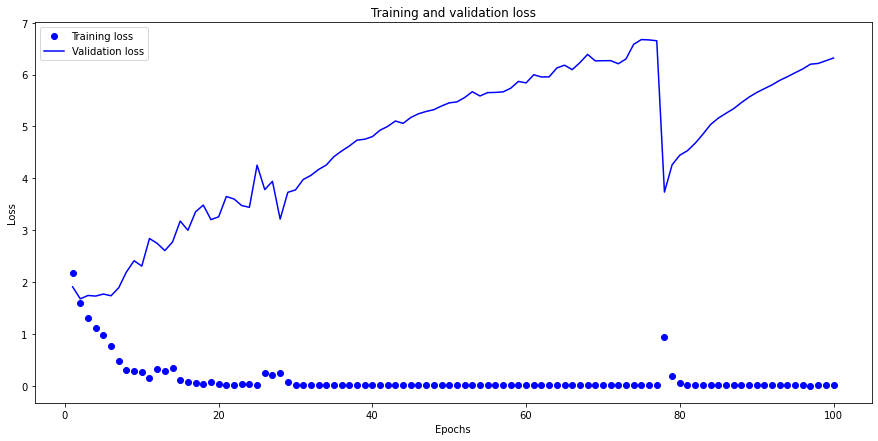

In [1052]:
history_dict_2 = history_2.history
history_dict_2.keys()


acc = history_dict_2['accuracy']
val_acc = history_dict_2['val_accuracy']
loss = history_dict_2['loss']
val_loss = history_dict_2['val_loss']

epochs = range(1, len(acc) + 1)


plt.figure(figsize=(15,7))
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


<Figure size 432x288 with 0 Axes>

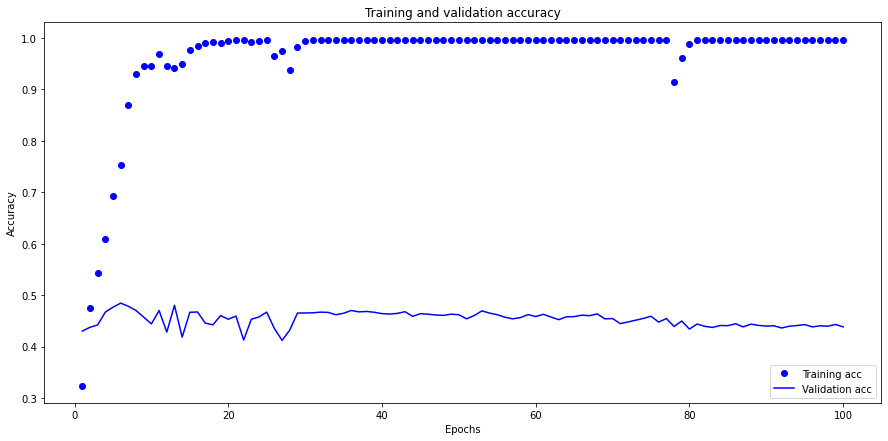

In [1053]:

plt.clf()   # clear figure
plt.figure(figsize=(15,7))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


En este gráfico, los puntos representan la pérdida y la precisión del entrenamiento, y las líneas continuas son la pérdida y la precisión de la validación.

Observamos que la pérdida de entrenamiento disminuye con cada epoch y la precisión del entrenamiento aumenta con cada epoch.

Este no es el caso para la pérdida y precisión de la validación; parecen alcanzar su punto máximo después de unos 20 epochs. Este es un ejemplo de sobreajuste: el modelo funciona mejor con los datos de entrenamiento que con los datos que nunca antes había visto. Después de este punto, el modelo sobreoptimiza y aprende representaciones específicas de los datos de entrenamiento que no se generalizan a los datos de prueba.

Para este caso particular, podríamos evitar el sobreajuste simplemente deteniendo el entrenamiento después de unos 20 epochs.

In [1072]:
predictions_2 = model_2.predict(xtest)

In [1055]:
predictions_2.shape

(3228, 10)

In [1056]:
y_pred_rna_2 = prediction_rna(predictions_2)

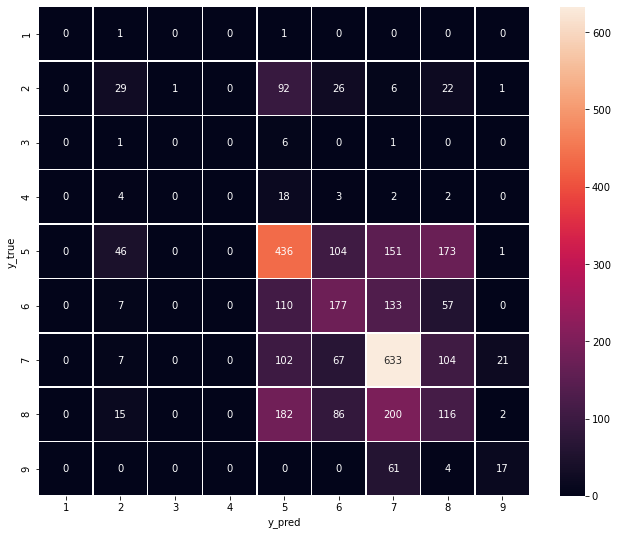

In [1057]:
conf_matrix_rna_2 = confusion(ytest,y_pred_rna_2)

In [1058]:
dataframe_score=tabla_f1_score(y_pred_rna_2,'RNA-2',dataframe_score,conf_matrix_rna_2,history_dict_2['val_accuracy'][99])

In [1059]:
dataframe_score

,Modelo,Score,Negativos,Positivos,1,2,3,4,5,6,7,8,9
0,Naive Bayes,0.285006,0.208333,0.301285,0.0,0.145957,0.0,0.062257,0.292624,0.380686,0.353204,0.196158,0.271357
1,Random Forest,0.451673,0.000000,0.409329,0.0,0.000000,0.0,0.000000,0.466859,0.398058,0.603063,0.009756,0.091954
2,SVM,0.440653,0.138889,0.415516,0.0,0.195440,0.0,0.000000,0.476654,0.445000,0.573513,0.171123,0.245902
3,RNA-1,0.449814,0.046296,0.445026,0.0,0.079681,0.0,0.000000,0.471747,0.408787,0.592514,0.244068,0.272727
4,RNA-2,0.438131,0.134259,0.448834,0.0,0.202091,0.0,0.000000,0.469322,0.373812,0.596888,0.215014,0.274194


In [1079]:
from sklearn.metrics import classification_report

print(classification_report(ytest, y_pred_rna_2))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.26      0.16      0.20       177
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00        29
           5       0.46      0.48      0.47       911
           6       0.38      0.37      0.37       484
           7       0.53      0.68      0.60       934
           8       0.24      0.19      0.22       601
           9       0.40      0.21      0.27        82

    accuracy                           0.44      3228
   macro avg       0.25      0.23      0.24      3228
weighted avg       0.41      0.44      0.42      3228



Nuestro modelo de RNA-2 tiene un accuracy score total del 44% acertando en un 13% los sentimientos negativos y un 45% los positivos, el sentimiento al que mas acerto es al 7 que corresponde a Very Positive.

#### **Modelo RNA 3**

In [1060]:
model_3 = build_model_3()
model_3.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_90 (Dense)             (None, 56)                560056    
_________________________________________________________________
dense_91 (Dense)             (None, 56)                3192      
_________________________________________________________________
dense_92 (Dense)             (None, 10)                570       
Total params: 563,818
Trainable params: 563,818
Non-trainable params: 0
_________________________________________________________________


In [1061]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

EPOCHS = 100

with tf.device('/CPU:0'):
    history_3 = model_3.fit(xtrain, ytrain, 
                                 epochs=EPOCHS, 
                                 validation_split = 0.5, 
                                 verbose=0,
                                 callbacks=[PrintDot()])


....................................................................................................

##### **Evaluacion del Modelo**

In [1062]:
hist_3 = pd.DataFrame(history_3.history)
hist_3['epoch'] = history_3.epoch
hist_3.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
95,0.009193,0.996283,7.124767,0.467339,95
96,0.009570,0.995751,7.111761,0.460170,96
97,0.009217,0.995751,7.161293,0.460435,97
98,0.009161,0.996283,7.234644,0.464153,98
99,0.009728,0.996017,7.256194,0.455390,99


In [1063]:
hist_3.head()

,loss,accuracy,val_loss,val_accuracy,epoch
0,2.117522,0.370420,1.950520,0.436803,0
1,1.500122,0.500797,1.632388,0.476633,1
2,1.146275,0.609931,1.682415,0.467339,2
3,1.079712,0.655868,1.860099,0.474774,3
4,0.795145,0.737918,1.738276,0.500266,4


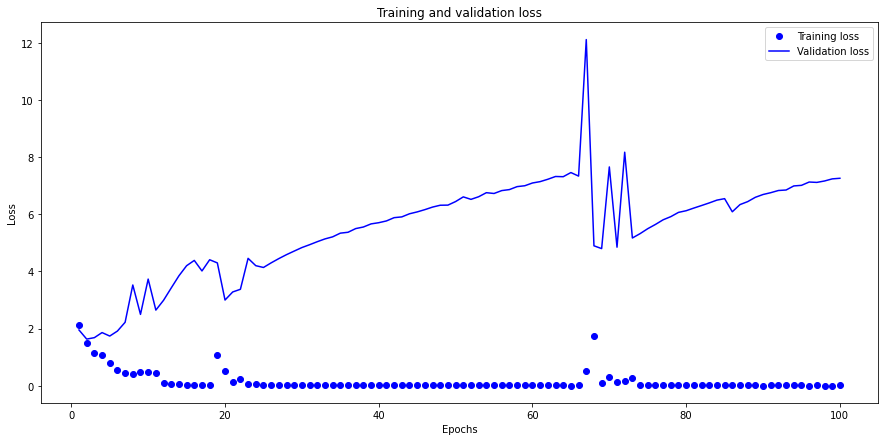

In [1064]:
history_dict_3 = history_3.history
history_dict_3.keys()


acc = history_dict_3['accuracy']
val_acc = history_dict_3['val_accuracy']
loss = history_dict_3['loss']
val_loss = history_dict_3['val_loss']

epochs = range(1, len(acc) + 1)


plt.figure(figsize=(15,7))
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


<Figure size 432x288 with 0 Axes>

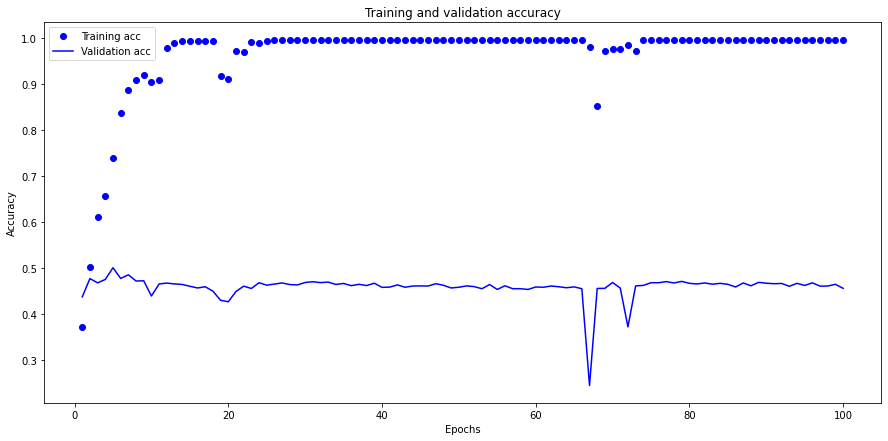

In [1065]:

plt.clf()   # clear figure
plt.figure(figsize=(15,7))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


En este gráfico, los puntos representan la pérdida y la precisión del entrenamiento, y las líneas continuas son la pérdida y la precisión de la validación.

Observamos que la pérdida de entrenamiento disminuye con cada epoch y la precisión del entrenamiento aumenta con cada epoch.

Este no es el caso para la pérdida y precisión de la validación; parecen alcanzar su punto máximo después de unos 23 epochs. Este es un ejemplo de sobreajuste: el modelo funciona mejor con los datos de entrenamiento que con los datos que nunca antes había visto. Después de este punto, el modelo sobreoptimiza y aprende representaciones específicas de los datos de entrenamiento que no se generalizan a los datos de prueba.

Para este caso particular, podríamos evitar el sobreajuste simplemente deteniendo el entrenamiento después de unos 23 epochs.

In [1073]:
predictions_3 = model_3.predict(xtest)

In [1067]:
y_pred_rna_3 = prediction_rna(predictions_3)

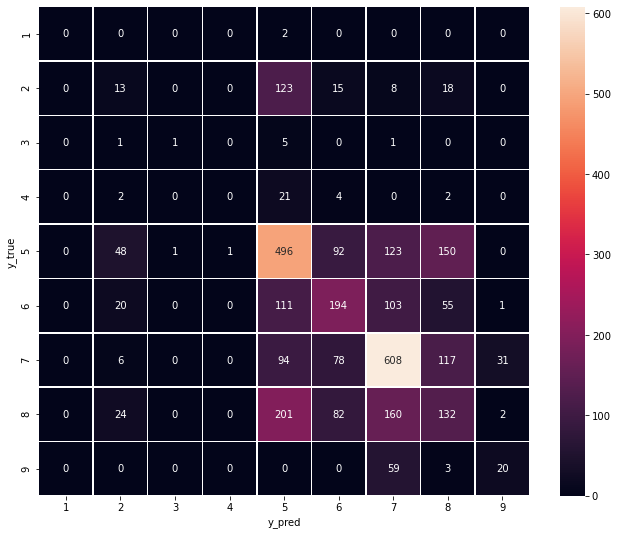

In [1096]:
conf_matrix_rna_3=confusion(ytest,y_pred_rna_3)

In [1069]:
dataframe_score=tabla_f1_score(y_pred_rna_3,'RNA-3',dataframe_score,conf_matrix_rna_3,history_dict_3['val_accuracy'][99])

In [1070]:
dataframe_score

,Modelo,Score,Negativos,Positivos,1,2,3,4,5,6,7,8,9
0,Naive Bayes,0.285006,0.208333,0.301285,0.0,0.145957,0.0,0.062257,0.292624,0.380686,0.353204,0.196158,0.271357
1,Random Forest,0.451673,0.000000,0.409329,0.0,0.000000,0.0,0.000000,0.466859,0.398058,0.603063,0.009756,0.091954
2,SVM,0.440653,0.138889,0.415516,0.0,0.195440,0.0,0.000000,0.476654,0.445000,0.573513,0.171123,0.245902
3,RNA-1,0.449814,0.046296,0.445026,0.0,0.079681,0.0,0.000000,0.471747,0.408787,0.592514,0.244068,0.272727
4,RNA-2,0.438131,0.134259,0.448834,0.0,0.202091,0.0,0.000000,0.469322,0.373812,0.596888,0.215014,0.274194
5,RNA-3,0.455390,0.064815,0.454069,0.0,0.089347,0.2,0.000000,0.505092,0.408851,0.609218,0.244898,0.294118


In [1078]:
from sklearn.metrics import classification_report

print(classification_report(ytest, y_pred_rna_3))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.11      0.07      0.09       177
           3       0.50      0.12      0.20         8
           4       0.00      0.00      0.00        29
           5       0.47      0.54      0.51       911
           6       0.42      0.40      0.41       484
           7       0.57      0.65      0.61       934
           8       0.28      0.22      0.24       601
           9       0.37      0.24      0.29        82

    accuracy                           0.45      3228
   macro avg       0.30      0.25      0.26      3228
weighted avg       0.43      0.45      0.44      3228



Nuestro modelo de RNA-3 tiene un accuracy score total del 46% acertando en un 7% los sentimientos negativos y un 46% los positivos, el sentimiento al que mas acerto es al 7 que corresponde a Very Positive.

---
### **Seleccion del modelo**

---

A continuacion vamos a seleccionar uno de los modelos realizados para crear una columna en nuestro dataset que indique si el usuario recomienda el juego.

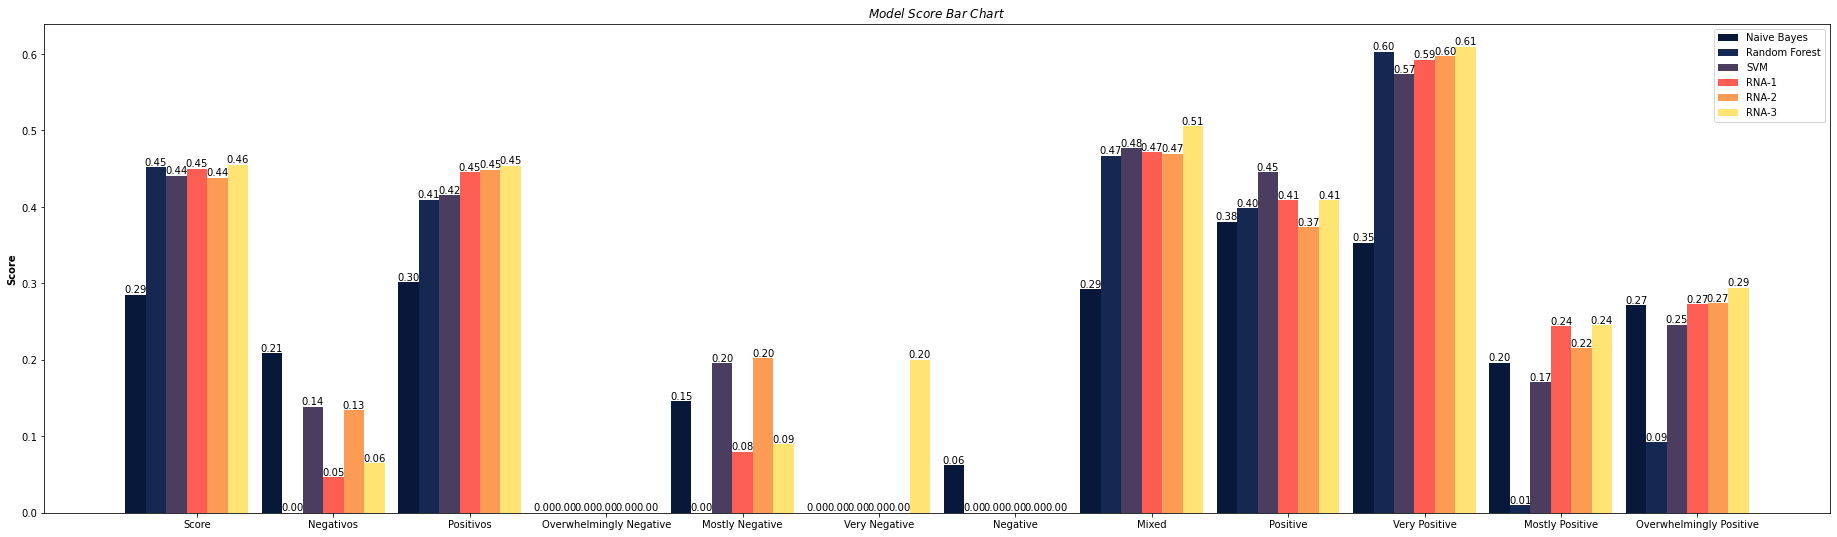

In [1084]:
# Displaying values at the top of the Grouped Bar Chart using plt.text()
plt.figure(figsize=(32,9))

# set width of bar
barWidth = 0.15

# set height of bar
y1= np.array(dataframe_score.iloc[0,1:13])
y2 =np.array(dataframe_score.iloc[1,1:13])
y3 =np.array(dataframe_score.iloc[2,1:13])
y4= np.array(dataframe_score.iloc[3,1:13])
y5 =np.array(dataframe_score.iloc[4,1:13])
y6 =np.array(dataframe_score.iloc[5,1:13])

# Set position of bar on X axis
pos1 = np.arange(len(y1))
pos2 = [x + barWidth for x in pos1]
pos3 = [x + barWidth for x in pos2]
pos4 = [x + barWidth for x in pos3]
pos5 = [x + barWidth for x in pos4]
pos6 = [x + barWidth for x in pos5]

# Make the plot
plt.bar(pos1, y1, color='#08183A', width=barWidth, label='Naive Bayes')
plt.bar(pos2, y2, color='#152852', width=barWidth, label='Random Forest')
plt.bar(pos3, y3, color='#4B3D60', width=barWidth, label='SVM')
plt.bar(pos4, y4, color='#FD5E53', width=barWidth, label='RNA-1')
plt.bar(pos5, y5, color='#FC9C54', width=barWidth, label='RNA-2')
plt.bar(pos6, y6, color='#FFE373', width=barWidth, label='RNA-3')

# Add xticks on the middle of the group bars
name_column=dataframe_score.columns.tolist()
name_column.remove('Modelo')

#plt.xlabel('', fontweight='bold')
plt.ylabel('Score', fontweight='bold')
plt.xticks([i + barWidth*3 for i in range(len(y1))],['Score','Negativos','Positivos','Overwhelmingly Negative','Mostly Negative','Very Negative','Negative','Mixed','Positive','Very Positive','Mostly Positive','Overwhelmingly Positive'])
for x,y in zip(pos1,y1):
    plt.text(x, y, '%.2f' % y, ha='center' , va= 'bottom')
for x,y in zip(pos2,y2):
    plt.text(x, y, '%.2f' % y, ha='center' , va= 'bottom')
for x,y in zip(pos3,y3):
    plt.text(x, y, '%.2f' % y, ha='center' , va= 'bottom')
for x,y in zip(pos4,y4):
    plt.text(x, y, '%.2f' % y, ha='center' , va= 'bottom')
for x,y in zip(pos5,y5):
    plt.text(x, y, '%.2f' % y, ha='center' , va= 'bottom')
for x,y in zip(pos6,y6):
    plt.text(x, y, '%.2f' % y, ha='center' , va= 'bottom')

plt.title ('$Model $ $ Score $ $ Bar $ $ Chart$')

# Create legend & Show graphic
plt.legend()
plt.show()

Del grafico podemos notar que el modelo con mejor score en la mayoria de los campos es el modelo de RNA-3, en 7 de 12 posibles, y con mayor score general.. s por esto que decidimos utilizarlo para predecir los datos de sentimientos a los juegos que no contienen un sentimiento asociado. 

Sabemos que si bien las precisiones no son de un nivel muy alto, todos rondan en el 50% aproximadamente, esto se puede deber a varios factores:

* No tenemos en cuenta la categoria Mixed al realizar los conteos para negativos o positivos y pueden influir ya que un sentimiento de un juego corresponde a muchas criticas y uno mixto es porque tiene tanto negativas o positivas y puede ocurrir que un usuario catalogue un juego como positivo sin haber dejado un texto de review o viceversa y nosotros nos encontramos analizando los textos. Es decir que puede estar sesgado nuestro modelo ya que no contamos con una categoria que nos indique cuantas reviews positivas o negativas sin texto tuvo un juego.

* Tambien sabemos que a partir de 1 critica de un juego no puede indicar un sentimiento de Overwhelmingly Negative o Positive ya que estos se conforman con MUCHAS reviews del mismo indole y no con solo una.

* Todos los modelos tienen mejores rendimientos al predecir las criticas postivas, esto puede originarse ya que las mayoria de las intancias utilizadas para realizar los modelos son de criticas positivas provocando que los modelos aprendan mas de los sentimientos positivos.

Ahora con nuestro modelo de RNA-3 le otorgaremos un sentimiento a los juegos que contienen un texto de review pero no tienen un sentimiento asociado.

---
## **5- Sistema de Recomendacion**
---

### **Preparacion de los datos**

#### **Prediccion**

Ya tenemos nuestra matriz con las palabras mas utilizadas en los textos de juegos sin sentimientos y los utilizaremos para predecir los mismos.

Por lo mencionado a la hora de evaluacioon del modelo de RNA-3, vamos a utilizar el modelo pero con un cantidad de epochs reducida a 23.

In [2]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

EPOCHS = 23

with tf.device('/CPU:0'):
    history_3 = model_3.fit(xtrain, ytrain, 
                                 epochs=EPOCHS, 
                                 validation_split = 0.5, 
                                 verbose=0,
                                 callbacks=[PrintDot()])

NameError: name 'keras' is not defined

Predecimos los sentimientos.

In [ ]:
x_WS = matriz_textos_WS.toarray()
predictions_WS = model_3.predict(x_WS)
y_pred_WS = prediction_rna(predictions_WS)
len(y_pred_WS)

Introducimos los valores a nuestro dataframe.

In [ ]:
df_sentiment_and_id_game_WS = df_sentiment_and_id_game.copy()
c = 0
for i in df_sentiment_and_id_game_WS.index:
    if df_sentiment_and_id_game_WS.iloc[i].sentiment == 0:
        df_sentiment_and_id_game_WS.sentiment[df_sentiment_and_id_game_WS.index == i] = y_pred_WS[c]
        c = c + 1

df_sentiment_and_id_game_WS.head(10)

In [ ]:
df_sentiment_and_id_game_WS

In [ ]:
df_sentiment_and_id_game_WS.info()

In [ ]:
df_sentiment_and_id_game_WS.groupby('sentiment').agg({'sentiment': 'count'})

In [ ]:
df_sentiment_and_id_game_WS.to_csv('df_sentiment_and_id_game_WS.csv',index=False)

#### **Dataset Final**

In [ ]:
df_sentiment_and_id_game_WS = pd.read_csv("df_sentiment_and_id_game_WS.csv")
df_sentiment_and_id_game_WS.head(1)

Crearemos un dataset que contenga los siguientes campos:

* ID: Id del producto 
* Name: Nombre del producto
* Price: Precio del producto
* Sentiment: Sentimiento del producto
* Year: Año del producto
* Info: Sopa de informacion del producto
* Players: ID de los usuarios que realizaron una review del producto

Lo crearemos a partir del dataframe df_sentiment_and_id_game_WS.

In [ ]:
df_final = df_sentiment_and_id_game_WS.iloc[:,[0,1]]
df_final = pd.merge(left=df_final, right=data_games_clean, how='left', left_on='id', right_on='id')
df_final = df_final.iloc[:,[0,1,2,5,7,8]]
df_final.head(1)

Agrego una columna llamada players que contenga una lista con loos id de los usuarios que realizaron una review al producto

In [ ]:
df_final['users'] = ""
df_final['users'] = df_final.id.apply(lambda x: (data_reviews_clean[data_reviews_clean.product_id ==x].new_user_id.astype(int).to_list()))

In [ ]:
df_final = df_final.rename(columns={'sentiment_x': 'sentiment'})
df_final.head(5)

Agrego las filas con los juegos que se encuentran en el dataset de data_games_clean pero que no tienen una review

In [ ]:
data_games_clean_2 = data_games_clean.copy()
#Creo una lista con los id de las intancias qe se encuentran en df_final
list_of_id = df_final.id.to_list()
# Elimino las instancias de data_games_clean cuyo id ya se encuentra en nuestro df_final
data_games_clean_2 = data_games_clean_2[~data_games_clean_2['id'].isin(list_of_id)]

In [ ]:
#Transformo los valores de sentiment a numericos
data_games_clean_2.sentiment = data_games_clean_2.sentiment.apply(lambda x: 9 if x == 'Overwhelmingly Positive' else x)
data_games_clean_2.sentiment = data_games_clean_2.sentiment.apply(lambda x: 1 if x == 'Overwhelmingly Negative' else x)
data_games_clean_2.sentiment = data_games_clean_2.sentiment.apply(lambda x: 8 if x == 'Mostly Positive' else x)
data_games_clean_2.sentiment = data_games_clean_2.sentiment.apply(lambda x: 2 if x == 'Mostly Negative' else x)
data_games_clean_2.sentiment = data_games_clean_2.sentiment.apply(lambda x: 7 if x == 'Very Positive' else x)
data_games_clean_2.sentiment = data_games_clean_2.sentiment.apply(lambda x: 3 if x == 'Very Negative' else x)
data_games_clean_2.sentiment = data_games_clean_2.sentiment.apply(lambda x: 6 if x == 'Positive' else x)
data_games_clean_2.sentiment = data_games_clean_2.sentiment.apply(lambda x: 4 if x == 'Negative' else x)
data_games_clean_2.sentiment = data_games_clean_2.sentiment.apply(lambda x: 5 if x == 'Mixed' else x)
data_games_clean_2.sentiment = data_games_clean_2.sentiment.apply(lambda x: 0 if x == 'Without Sentiment' else x)

data_games_clean_2 = data_games_clean_2.iloc[:,[0,5,1,4,6,7]]

In [ ]:
data_games_clean_2['users'] = np.nan
data_games_clean_2.head((1))

In [ ]:
df_final = df_final.append(data_games_clean_2)
df_final.head(1)

In [ ]:
#Ellimino los valoes nulos de info_soup
df_final= df_final.dropna(subset=['info_soup'])

In [ ]:
df_final.info()

Por lo tanto, nuestro dataset final contiene 32126 filas y 7 columnas.

In [ ]:
# Agregamos una columna que me indique la cantidad de jugadores que realizaron la review
n_users = []
for i in df_final.users:
    if isinstance(i,list):
        n_users.append(len(i))
    else:
        n_users.append(0)
        
df_final = df_final.assign(n_users=n_users)

In [ ]:
#Ordenamos nuestro DataFrame
df_final = df_final.iloc[:,[0,2,4,3,1,5,6,7]]

In [3]:
df_final.head(5)

NameError: name 'df_final' is not defined

In [ ]:
df_final = df_final.reset_index(drop=True)

for i in df_final.index:
    if isinstance(df_final.users.iloc[i],list):
        df_final.users.iloc[i] = ' '.join(map(str, df_final.users.iloc[i]))
    else:
        df_final.users.iloc[i] = ''

In [4]:
df_final

NameError: name 'df_final' is not defined

In [ ]:
df_final.to_csv('df_final.csv',index=False)

### **Matriz de Utilidad - Basada en Contenido**

In [15]:
df_final = pd.read_csv("df_final.csv")
df_final.head(5)

,id,app_name_or_title,Year,price,sentiment,info_soup,users,n_users
0,725280,Psi Project,2017.0,2.99,6,vyacheslavshilikhin action adventure indie sim...,0 2,2
1,328100,Gunspell - Steam Edition,2014.0,14.99,5,inocoplus kissltd adventure rpg indie puzzle m...,1 19 33 97 109 121 128,7
2,631920,Somewhere on Zibylon,2017.0,9.99,6,mykhailkonokh indie action puzzle exploration ...,3 22 25,3
3,35140,Batman: Arkham Asylum Game of the Year Edition,2010.0,19.99,9,rocksteadystudiosferalinteractive(mac) warnerb...,4 18 36 38 56 58 74 126 129 144 147 168 171 18...,913
4,288690,Sudokuball Detective,2009.0,4.99,8,witanentertainment libredia casual puzzle sing...,5 10,2


Realizamos una recomendación basada en la información que tenemos acerca de los ítems. La información es lo que esta contenido en nuestra sopa de informacion; el género, desarrollador y publicador, specs, tags, early access, gratis para jugar y si es que tiene metascore.

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df_final['info_soup'])

In [17]:
count_matrix.shape

(32126, 13004)

En la salida anterior, puede ver que hay 13004 vocabularios en los metadatos que le proporciononamos.

A continuación, utilizaremos cosine_similarity para medir la distancia entre las incrustaciones. 

In [18]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(count_matrix, count_matrix)

Vamos a definir una función que toma el nombre de un producto como entrada y genera una lista de los 20 productos más similares. En primer lugar, para esto, necesitamos un mapeo inverso de nombres de productos e índices de DataFrame. En otras palabras, necesitamos un mecanismo para identificar el índice de un producto en su DataFrame de metadatos, dado su nombre. 

In [19]:
ids = pd.Series(df_final.index, index=df_final['app_name_or_title'])

Ahora estamos en buena forma para definir nuestra función de recomendación. Estos son los siguientes pasos que seguiremos:

* Obtenemos el índice del producto basado en su nombre.

* Obtenemos la lista de puntuaciones de similitud de coseno para ese producto en particular con todos los productos. Lo convertimos en una lista de tuplas donde el primer elemento es su posición y el segundo es la puntuación de similitud.

* Ordenamos la lista de tuplas antes mencionada según las puntuaciones de similitud; es decir, el segundo elemento.

* Obtenemos los 20 elementos principales de esta lista. Ignoramos el primer elemento ya que se refiere a sí mismo (el producto más similar a un producto en particular es el producto en sí).

* Devolvemos los nombres correspondientes a los índices de los elementos superiores. 

#### **Basico**

In [22]:
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the product that matches the title
    idx = ids[title]

    # Get the pairwsie similarity scores of all games with that product
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the games based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 20 most similar product
    sim_scores = sim_scores[1:21]

    # Get the game indices
    product_indices = [i[0] for i in sim_scores]

    # Return the top 20 most similar product
    return df_final['app_name_or_title'].iloc[product_indices]

Realizamos unas pruebas para verificar que nuestro sistema funcione correctamente. Probaremos con 2 juegos:

TITLE: Half-Life 2
 / GENRE: Action
 / DEVELOPER: Valve
 / PUBLISHER: Valve
 / FRANCHISE: Half-Life

TITLE: Outlast
 / GENRE: Action, Adventure, Indie
 / DEVELOPER: Red Barrels
 / PUBLISHER: Red Barrels
 / FRANCHISE: Outlast

In [23]:
get_recommendations('Half-Life 2', cosine_sim)

8966                              Half-Life 2: Episode Two
10688                             Half-Life 2: Episode One
3855                                   Half-Life 2: Update
12225                                    Half-Life: Source
12074                                           Black Mesa
7140                                 Half-Life: Blue Shift
3499                                             Half-Life
5068                             Half-Life: Opposing Force
6403                                                Portal
10282    RESIDENT EVIL 7 biohazard / BIOHAZARD 7 reside...
2112                               Half-Life 2: Lost Coast
8792                                BioShock™ 2 Remastered
1287                                                  DOOM
4642                                      Estranged: Act I
434                                        Call of Juarez™
8769                                   Deadfall Adventures
331                             Transmissions: Element 1

Notamos que para Half-Life 2 obtuvimos juegos similares, que cumplen con las caracteristicas de ser juegos de accion, primera persona y tambien mucha relacion con los que son del mismo desarrollador.

In [92]:
get_recommendations('Counter-Strike: Global Offensive', cosine_sim)

11505                                           Insurgency
7268                                Counter-Strike: Source
6159                                       Team Fortress 2
6912     Red Orchestra 2: Heroes of Stalingrad with Ris...
4562                                 Day of Defeat: Source
1655                                 Guns of Icarus Online
7376                                               Warface
31117                Rising Storm Game of the Year Edition
1241                                 Call of Duty®: Ghosts
5914                                                Arma 3
6176                                         Left 4 Dead 2
2279                                   Natural Selection 2
6773                                        Counter-Strike
5075                                         Day of Defeat
3235                                           Left 4 Dead
22                                             LawBreakers
9976                           Arma 2: Operation Arrowhe

Lo mismo ocurre para Outlast, juegos similares del estilo accion, horror, survival-horror, etc.

Por lo que podemos afirmar que nuestro sistema de recomendacion funciona correctamente. Pero a continuacion vamos a agregarle algunas propiedades mas.

#### **Con Ordenamientos**

Con la misma funcion previa, le agregamos una entrada mas a la funcion la cual tiene que ser una lista con el el noombre de la columna a partir de la cual queremos ordenar nuestras recomendaciones, puede ser mas de 1 criterio de ordenamiento.

Podemos ordenar por:

* Sentimiento
* Año
* Precio
* Cantidad de reviews

In [25]:
def get_recommendations_order(title,order, cosine_sim=cosine_sim ):
    # Get the index of the product that matches the title
    idx = ids[title]

    # Get the pairwsie similarity scores of all games with that product
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the games based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 20 most similar product
    sim_scores = sim_scores[1:51]

    # Get the game indices
    product_indices = [i[0] for i in sim_scores]

    # Insert Order
    
    order_list = order
    ascending_list=[]
    for i in order_list:
        if i=='price':
            ascending_list.append(True)
        else:
            ascending_list.append(False)
    
    df_final_PF = df_final.iloc[product_indices]
    df_final_PF = df_final_PF.sort_values(order_list, ascending=ascending_list)
    
    # Return the top 20 most similar product
    return df_final_PF['app_name_or_title'].iloc[0:21]

---
**Orden por Popularidad**

Este recomendador tomaría los 50 productos más similares y utilizando la columna sentiment y la cantidad de usuarios que realizaron reviews devolvería los 20 productos principales ordenados por sentimiento en primer lugar y por cantidad de revieews en segundo lugar.

In [26]:
get_recommendations_order('Half-Life 2',['sentiment','n_users'], cosine_sim)

3499                                           Half-Life
5744                                                SOMA
6403                                              Portal
1836                   Deus Ex: Game of the Year Edition
8347                     S.T.A.L.K.E.R.: Call of Pripyat
6516                                               QUAKE
6195     Unreal Tournament 2004: Editor's Choice Edition
6176                                       Left 4 Dead 2
12225                                  Half-Life: Source
4176                                          F.E.A.R. 3
2928                                         Dead Effect
8769                                 Deadfall Adventures
4877                          Wolfenstein: The New Order
6937                                           BioShock™
3235                                         Left 4 Dead
1287                                                DOOM
1334          Deus Ex: Human Revolution - Director's Cut
12074                          

---
**Orden por Año**

Este recomendador tomaría los 50 productos más similares y utilizando la columna year, ordenaremos los productos recomendados de mas nuevos a mas viejos.

In [27]:
get_recommendations_order('Half-Life 2',['Year'], cosine_sim)

10282    RESIDENT EVIL 7 biohazard / BIOHAZARD 7 reside...
331                             Transmissions: Element 120
2954             Resident Evil 0 / biohazard 0 HD REMASTER
8792                                BioShock™ 2 Remastered
1287                                                  DOOM
3855                                   Half-Life 2: Update
5744                                                  SOMA
12074                                           Black Mesa
790                  Resident Evil / biohazard HD REMASTER
10408                           Wolfenstein: The Old Blood
8657                               Metro: Last Light Redux
2928                                           Dead Effect
4877                            Wolfenstein: The New Order
4642                                      Estranged: Act I
6555                                      Montague's Mount
8769                                   Deadfall Adventures
1334            Deus Ex: Human Revolution - Director's C

---
**Orden por Año y Popularidad**

In [90]:
get_recommendations_order('Half-Life 2',['Year','sentiment','n_users'], cosine_sim)

10282    RESIDENT EVIL 7 biohazard / BIOHAZARD 7 reside...
1287                                                  DOOM
331                             Transmissions: Element 120
2954             Resident Evil 0 / biohazard 0 HD REMASTER
8792                                BioShock™ 2 Remastered
5744                                                  SOMA
12074                                           Black Mesa
790                  Resident Evil / biohazard HD REMASTER
3855                                   Half-Life 2: Update
10408                           Wolfenstein: The Old Blood
2928                                           Dead Effect
4877                            Wolfenstein: The New Order
8657                               Metro: Last Light Redux
4642                                      Estranged: Act I
8769                                   Deadfall Adventures
1334            Deus Ex: Human Revolution - Director's Cut
1712     Resident Evil Revelations / Biohazard Revelatio

---
**Orden por Precio**

Este recomendador tomaría los 50 productos más similares y utilizando la columna price, ordenaremos los productos recomendados de mas baratos a mas caros.

In [29]:
get_recommendations_order('Half-Life 2',['price'], cosine_sim)

3855                   Half-Life 2: Update
4642                      Estranged: Act I
331             Transmissions: Element 120
8075           DOOM 3 Resurrection of Evil
2085                               DOOM II
6555                      Montague's Mount
7140                 Half-Life: Blue Shift
2928                           Dead Effect
5068             Half-Life: Opposing Force
5966                              QUAKE II
4557                            Final DOOM
9921          Return to Castle Wolfenstein
6516                                 QUAKE
590                                 DOOM 3
1836     Deus Ex: Game of the Year Edition
8966              Half-Life 2: Episode Two
10688             Half-Life 2: Episode One
3499                             Half-Life
434                        Call of Juarez™
566              S.T.A.L.K.E.R.: Clear Sky
12225                    Half-Life: Source
Name: app_name_or_title, dtype: object

---
**Orden por Precio y Popularidad**

In [89]:
get_recommendations_order('Half-Life 2',['price','sentiment','n_users'], cosine_sim)

331             Transmissions: Element 120
4642                      Estranged: Act I
3855                   Half-Life 2: Update
8075           DOOM 3 Resurrection of Evil
6516                                 QUAKE
2928                           Dead Effect
5068             Half-Life: Opposing Force
7140                 Half-Life: Blue Shift
590                                 DOOM 3
9921          Return to Castle Wolfenstein
2085                               DOOM II
5966                              QUAKE II
4557                            Final DOOM
6555                      Montague's Mount
1836     Deus Ex: Game of the Year Edition
10688             Half-Life 2: Episode One
8966              Half-Life 2: Episode Two
3499                             Half-Life
6403                                Portal
12225                    Half-Life: Source
566              S.T.A.L.K.E.R.: Clear Sky
Name: app_name_or_title, dtype: object

### **Matriz de Utilidad - Colaborativa**

Utilizamos solo los juegos que contienen reviews.

In [31]:
df_final_colaborativo = pd.read_csv("df_final.csv")
df_final_colaborativo = df_final_colaborativo.dropna(subset=['users'])
df_final_colaborativo.head(5)

,id,app_name_or_title,Year,price,sentiment,info_soup,users,n_users
0,725280,Psi Project,2017.0,2.99,6,vyacheslavshilikhin action adventure indie sim...,0 2,2
1,328100,Gunspell - Steam Edition,2014.0,14.99,5,inocoplus kissltd adventure rpg indie puzzle m...,1 19 33 97 109 121 128,7
2,631920,Somewhere on Zibylon,2017.0,9.99,6,mykhailkonokh indie action puzzle exploration ...,3 22 25,3
3,35140,Batman: Arkham Asylum Game of the Year Edition,2010.0,19.99,9,rocksteadystudiosferalinteractive(mac) warnerb...,4 18 36 38 56 58 74 126 129 144 147 168 171 18...,913
4,288690,Sudokuball Detective,2009.0,4.99,8,witanentertainment libredia casual puzzle sing...,5 10,2


Realizamos una recomendación basada en la información que tenemos acerca de cuales usuarios realizaron reviews a cada producto. La información es lo que esta contenido en nuestra columna users.

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix_colaborativo = count.fit_transform(df_final_colaborativo.users)

In [33]:
count_matrix_colaborativo.shape

(12666, 540331)

En la salida anterior, puede ver que hay 540331 vocabularios en los metadatos que le proporciononamos.

A continuación, utilizaremos cosine_similarity para medir la distancia entre las incrustaciones. 

In [34]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim_colaborativo = cosine_similarity(count_matrix_colaborativo, count_matrix_colaborativo)

Vamos a definir una función que toma el nombre de un producto como entrada y genera una lista de los 20 productos más similares. En primer lugar, para esto, necesitamos un mapeo inverso de nombres de productos e índices de DataFrame. En otras palabras, necesitamos un mecanismo para identificar el índice de un producto en su DataFrame de metadatos, dado su nombre. 

In [36]:
ids_colaborativo = pd.Series(df_final_colaborativo.index, index=df_final_colaborativo['app_name_or_title'])

Ahora estamos en buena forma para definir nuestra función de recomendación. Estos son los siguientes pasos que seguiremos:

* Obtenemos el índice del producto basado en su nombre.

* Obtenemos la lista de puntuaciones de similitud de coseno para ese producto en particular con todos los productos. Lo convertimos en una lista de tuplas donde el primer elemento es su posición y el segundo es la puntuación de similitud.

* Ordenamos la lista de tuplas antes mencionada según las puntuaciones de similitud; es decir, el segundo elemento.

* Obtenemos los 20 elementos principales de esta lista. Ignoramos el primer elemento ya que se refiere a sí mismo (el producto más similar a un producto en particular es el producto en sí).

* Devolvemos los nombres correspondientes a los índices de los elementos superiores. 

#### **Basico**

In [37]:
def get_recommendations_colaborativo(title, cosine_sim=cosine_sim_colaborativo):
    # Get the index of the product that matches the title
    idx = ids_colaborativo[title]

    # Get the pairwsie similarity scores of all games with that product
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the games based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 20 most similar product
    sim_scores = sim_scores[1:21]

    # Get the game indices
    product_indices = [i[0] for i in sim_scores]

    # Return the top 20 most similar product
    return df_final_colaborativo['app_name_or_title'].iloc[product_indices]

In [38]:
get_recommendations_colaborativo('Half-Life 2', cosine_sim_colaborativo)

7029              Bulby - Diamond Course
3499                           Half-Life
10688           Half-Life 2: Episode One
6494     Little Busters! English Edition
5038                            Portal 2
6159                     Team Fortress 2
2236                  Job the Leprechaun
3543                           Blue Rose
9718                     American Psycho
499                        Horizon Shift
12209                               Rust
14                                Quadle
810                      Sound Euphonium
1815                           Down Here
3175          Sam & Max 105: Reality 2.0
4074                             Enlysia
4849             Odysseus: Long Way Home
6028                         Evil Dead 2
7932                Ghost in the Machine
8297                            Marblize
Name: app_name_or_title, dtype: object

Notamos que para Half-Life 2 obtuvimos juegos similares, que cumplen con las caracteristicas de ser juegos de accion, primera persona y tambien mucha relacion con los que son del mismo desarrollador.

In [93]:
get_recommendations_colaborativo('Counter-Strike: Global Offensive', cosine_sim_colaborativo)

9123            Flight 787 - Advanced
8687       Trainz Settle and Carlisle
350                         Unlimited
1182                          Madness
5807               Grid Legion, Storm
6445             Crystals of Niberium
6495              Whitetail Challenge
7029           Bulby - Diamond Course
8584                          C:\raft
8663      FARIA: Ghosts of the Stream
9413                    Infinity Saga
1657                          JumpSky
4769                    TAP TOUCH RUN
10288                      Idol Hands
6159                  Team Fortress 2
406                     Ashes Cricket
12209                            Rust
1068     The Emptiness Deluxe Edition
1530              Vaporwave Simulator
1617               Marine Park Empire
Name: app_name_or_title, dtype: object

Lo mismo ocurre para Outlast, juegos similares del estilo accion, horror, survival-horror, etc.

#### **Con Ordenamientos**

Con la misma funcion previa, le agregamos una entrada mas a la funcion la cual tiene que ser una lista con el el noombre de la columna a partir de la cual queremos ordenar nuestras recomendaciones, puede ser mas de 1 criterio de ordenamiento.

Podemos ordenar por:

* Sentimiento
* Año
* Precio
* Cantidad de reviews

In [40]:
def get_recommendations_order_colaborativo(title,order, cosine_sim=cosine_sim_colaborativo ):
    # Get the index of the product that matches the title
    idx = ids_colaborativo[title]

    # Get the pairwsie similarity scores of all games with that product
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the games based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 20 most similar product
    sim_scores = sim_scores[1:51]

    # Get the game indices
    product_indices = [i[0] for i in sim_scores]

    # Insert Order
    
    order_list = order
    ascending_list=[]
    for i in order_list:
        if i=='price':
            ascending_list.append(True)
        else:
            ascending_list.append(False)
    
    df_final_PF = df_final_colaborativo.iloc[product_indices]
    df_final_PF = df_final_PF.sort_values(order_list, ascending=ascending_list)
    
    # Return the top 20 most similar product
    return df_final_PF['app_name_or_title'].iloc[0:21]

---
**Orden por Popularidad**

Este recomendador tomaría los 50 productos más similares y utilizando la columna sentiment y la cantidad de usuarios que realizaron reviews devolvería los 20 productos principales ordenados por sentimiento en primer lugar y por cantidad de revieews en segundo lugar.

In [95]:
get_recommendations_order_colaborativo('Half-Life 2',['sentiment','n_users'], cosine_sim_colaborativo)

11840                      Borderlands 2
5038                            Portal 2
3499                           Half-Life
7114                     Blood and Bacon
12225                  Half-Life: Source
11987                         Bit Heroes
2996                           Ironbound
8858               AquaNox 2: Revelation
2236                  Job the Leprechaun
1530                 Vaporwave Simulator
14                                Quadle
810                      Sound Euphonium
6159                     Team Fortress 2
12209                               Rust
5914                              Arma 3
11474                      Emily is Away
10688           Half-Life 2: Episode One
5068           Half-Life: Opposing Force
7140               Half-Life: Blue Shift
579                        Cat on a Diet
6494     Little Busters! English Edition
Name: app_name_or_title, dtype: object

---
**Orden por Año**

Este recomendador tomaría los 50 productos más similares y utilizando la columna year, ordenaremos los productos recomendados de mas nuevos a mas viejos.

In [42]:
get_recommendations_order_colaborativo('Half-Life 2',['Year'], cosine_sim_colaborativo)

1530                    Vaporwave Simulator
2996                              Ironbound
7029                 Bulby - Diamond Course
810                         Sound Euphonium
1164                                 Questr
3728                 True or False Universe
11987                            Bit Heroes
4769                          TAP TOUCH RUN
12489                      SoM Soul Of Mask
4074                                Enlysia
1854                           Just A Dream
6494        Little Busters! English Edition
9059          Bathory - The Bloody Countess
7114                        Blood and Bacon
579                           Cat on a Diet
8297                               Marblize
8589                                  CATS!
2236                     Job the Leprechaun
4181     Lumber Island - That Special Place
3282                              Fallout 4
11474                         Emily is Away
Name: app_name_or_title, dtype: object

---
**Orden por Año y Popularidad**

In [88]:
get_recommendations_order_colaborativo('Half-Life 2',['Year','sentiment','n_users'], cosine_sim_colaborativo)

2996                           Ironbound
1530                 Vaporwave Simulator
11987                         Bit Heroes
810                      Sound Euphonium
6494     Little Busters! English Edition
3728              True or False Universe
1164                              Questr
1854                        Just A Dream
4769                       TAP TOUCH RUN
7029              Bulby - Diamond Course
12489                   SoM Soul Of Mask
4074                             Enlysia
7114                     Blood and Bacon
579                        Cat on a Diet
8297                            Marblize
8589                               CATS!
9059       Bathory - The Bloody Countess
2236                  Job the Leprechaun
14                                Quadle
11474                      Emily is Away
499                        Horizon Shift
Name: app_name_or_title, dtype: object

---
**Orden por Precio**

Este recomendador tomaría los 50 productos más similares y utilizando la columna price, ordenaremos los productos recomendados de mas baratos a mas caros.

In [44]:
get_recommendations_order_colaborativo('Half-Life 2',['price'], cosine_sim_colaborativo)

1854                           Just A Dream
11474                         Emily is Away
3728                 True or False Universe
2996                              Ironbound
6159                        Team Fortress 2
11987                            Bit Heroes
1530                    Vaporwave Simulator
2236                     Job the Leprechaun
4769                          TAP TOUCH RUN
7114                        Blood and Bacon
810                         Sound Euphonium
7029                 Bulby - Diamond Course
4849                Odysseus: Long Way Home
6028                            Evil Dead 2
9718                        American Psycho
12489                      SoM Soul Of Mask
7140                  Half-Life: Blue Shift
499                           Horizon Shift
8858                  AquaNox 2: Revelation
579                           Cat on a Diet
4181     Lumber Island - That Special Place
Name: app_name_or_title, dtype: object

---
**Orden por Precio y Popularidad**

In [87]:
get_recommendations_order_colaborativo('Half-Life 2',['price','sentiment','n_users'], cosine_sim_colaborativo)

11987                            Bit Heroes
2996                              Ironbound
6159                        Team Fortress 2
11474                         Emily is Away
3728                 True or False Universe
1854                           Just A Dream
7114                        Blood and Bacon
2236                     Job the Leprechaun
1530                    Vaporwave Simulator
4769                          TAP TOUCH RUN
810                         Sound Euphonium
7029                 Bulby - Diamond Course
9718                        American Psycho
6028                            Evil Dead 2
4849                Odysseus: Long Way Home
8858                  AquaNox 2: Revelation
5068              Half-Life: Opposing Force
7140                  Half-Life: Blue Shift
579                           Cat on a Diet
499                           Horizon Shift
4181     Lumber Island - That Special Place
Name: app_name_or_title, dtype: object

Por lo que podemos afirmar que nuestro sistema de recomendacion funciona correctamente. Pero a continuacion vamos a agregarle algunas propiedades mas.

### **Matriz de Utilidad - Hibrida**

Utilizando el dataset final colaborativo (solo con productos que contengan reviews), podemos realizar tambien un sistema de recomendacion hibrido, es decir, tanto basado en contenido como colaborativo.

Lo que vamos a realizar es a partir de un producto vamos a armar un dataframe de 100 productos a partir de un sistema colaborativo y a ese dataframe lo vamos a ordenar de manera basada en un sistema de recomendacion basado en contenido.

#### **Basico**

In [77]:
def get_recommendations_colaborativo_H(title, cosine_sim=cosine_sim_colaborativo):
    # Get the index of the product that matches the title
    idx = ids_colaborativo[title]

    # Get the pairwsie similarity scores of all games with that product
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the games based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 100 most similar product
    sim_scores = sim_scores[0:101]

    # Get the game indices
    product_indices = [i[0] for i in sim_scores]

    # Return the top 100 most similar product
    return df_final_colaborativo.iloc[product_indices]

def get_recommendations_contenido_hibrido(title,ids_hibrido,df_hibrido, cosine_sim_hibrido):
    #cosine_sim=cosine_sim_hibrido
    # Get the index of the product that matches the title
    idx = ids_hibrido[title]

    # Get the pairwsie similarity scores of all games with that product
    sim_scores = list(enumerate(cosine_sim_hibrido[idx]))

    # Sort the games based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 20 most similar product
    sim_scores = sim_scores[1:21]

    # Get the game indices
    product_indices = [i[0] for i in sim_scores]

    # Return the top 20 most similar product
    return df_hibrido['app_name_or_title'].iloc[product_indices]

def get_recommendations_hibrido(title):
    df_hibrido = get_recommendations_colaborativo_H(title, cosine_sim=cosine_sim_colaborativo)
    df_hibrido = df_hibrido.reset_index(drop=True)
    count_matrix_hibrido = count.fit_transform(df_hibrido.info_soup)
    cosine_sim_hibrido = cosine_similarity(count_matrix_hibrido, count_matrix_hibrido)
    ids_hibrido = pd.Series(df_hibrido.index, index=df_hibrido['app_name_or_title'])
    x = get_recommendations_contenido_hibrido(title,ids_hibrido,df_hibrido, cosine_sim_hibrido)
    return x

In [78]:
get_recommendations_hibrido('Half-Life 2')

96     Half-Life 2: Episode Two
3      Half-Life 2: Episode One
34            Half-Life: Source
82                   Black Mesa
41        Half-Life: Blue Shift
2                     Half-Life
29    Half-Life: Opposing Force
81                     F.E.A.R.
5                      Portal 2
93      Half-Life 2: Deathmatch
83                   Sven Co-op
40                    Fallout 4
57                     Bitardia
79                  Garry's Mod
90       Counter-Strike: Source
77                    Element4l
88                    Far Cry 3
43            Burn Zombie Burn!
92           Grand Theft Auto V
35                       Arma 3
Name: app_name_or_title, dtype: object

In [79]:
get_recommendations_hibrido('Outlast')

33                         Doorways: Prelude
67                      Pesadelo - Regressão
78                 Amnesia: The Dark Descent
91                                      ENKI
49                                 Alan Wake
59                            The Crow's Eye
53                        Escape Dead Island
71                                    Bedlam
58                                LOST ORBIT
26                                  DYSTORIA
10    Eekeemoo - Splinters of the Dark Shard
57                              Back in 1995
44                       Project Temporality
95                                  Portal 2
6                                     Please
52                                  Anarcute
99            TRI: Of Friendship and Madness
29                                Blood Feed
89                          An Imp? A Fiend!
5                                      Shiny
Name: app_name_or_title, dtype: object

#### **Con Ordenamientos**

Con la misma funcion previa, le agregamos una entrada mas a la funcion la cual tiene que ser una lista con el el noombre de la columna a partir de la cual queremos ordenar nuestras recomendaciones, puede ser mas de 1 criterio de ordenamiento.

Podemos ordenar por:

* Sentimiento
* Año
* Precio
* Cantidad de reviews

In [80]:
def get_recommendations_colaborativo_H(title, cosine_sim=cosine_sim_colaborativo):
    # Get the index of the product that matches the title
    idx = ids_colaborativo[title]

    # Get the pairwsie similarity scores of all games with that product
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the games based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 100 most similar product
    sim_scores = sim_scores[0:101]

    # Get the game indices
    product_indices = [i[0] for i in sim_scores]

    # Return the top 100 most similar product
    return df_final_colaborativo.iloc[product_indices]

def get_recommendations_contenido_hibrido_order(title,ids_hibrido,df_hibrido,order, cosine_sim_hibrido):
    #cosine_sim=cosine_sim_hibrido
    # Get the index of the product that matches the title
    idx = ids_hibrido[title]

    # Get the pairwsie similarity scores of all games with that product
    sim_scores = list(enumerate(cosine_sim_hibrido[idx]))

    # Sort the games based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 20 most similar product
    sim_scores = sim_scores[1:21]

    # Get the game indices
    product_indices = [i[0] for i in sim_scores]
    
    # Insert Order
    
    order_list = order
    ascending_list=[]
    for i in order_list:
        if i=='price':
            ascending_list.append(True)
        else:
            ascending_list.append(False)
    
    df_hibrido = df_hibrido.iloc[product_indices]
    df_hibrido = df_hibrido.sort_values(order_list, ascending=ascending_list)

    # Return the top 20 most similar product
    return df_hibrido['app_name_or_title'].iloc[0:21]

def get_recommendations_hibrido_order(title,order):
    df_hibrido = get_recommendations_colaborativo_H(title, cosine_sim=cosine_sim_colaborativo)
    df_hibrido = df_hibrido.reset_index(drop=True)
    count_matrix_hibrido = count.fit_transform(df_hibrido.info_soup)
    cosine_sim_hibrido = cosine_similarity(count_matrix_hibrido, count_matrix_hibrido)
    ids_hibrido = pd.Series(df_hibrido.index, index=df_hibrido['app_name_or_title'])
    x = get_recommendations_contenido_hibrido_order(title,ids_hibrido,df_hibrido,order, cosine_sim_hibrido)
    return x

---
**Orden por Popularidad**

Este recomendador tomaría los 50 productos más similares y utilizando la columna sentiment y la cantidad de usuarios que realizaron reviews devolvería los 20 productos principales ordenados por sentimiento en primer lugar y por cantidad de revieews en segundo lugar.

In [82]:
get_recommendations_hibrido_order('Half-Life 2',['sentiment','n_users'])

5                      Portal 2
79                  Garry's Mod
90       Counter-Strike: Source
2                     Half-Life
34            Half-Life: Source
35                       Arma 3
88                    Far Cry 3
82                   Black Mesa
83                   Sven Co-op
81                     F.E.A.R.
3      Half-Life 2: Episode One
93      Half-Life 2: Deathmatch
29    Half-Life: Opposing Force
41        Half-Life: Blue Shift
96     Half-Life 2: Episode Two
77                    Element4l
57                     Bitardia
40                    Fallout 4
92           Grand Theft Auto V
43            Burn Zombie Burn!
Name: app_name_or_title, dtype: object

---
**Orden por Año**

Este recomendador tomaría los 50 productos más similares y utilizando la columna year, ordenaremos los productos recomendados de mas nuevos a mas viejos.

In [83]:
get_recommendations_hibrido_order('Half-Life 2',['Year'])

40                    Fallout 4
92           Grand Theft Auto V
82                   Black Mesa
57                     Bitardia
35                       Arma 3
77                    Element4l
88                    Far Cry 3
5                      Portal 2
43            Burn Zombie Burn!
96     Half-Life 2: Episode Two
3      Half-Life 2: Episode One
79                  Garry's Mod
81                     F.E.A.R.
93      Half-Life 2: Deathmatch
90       Counter-Strike: Source
34            Half-Life: Source
41        Half-Life: Blue Shift
29    Half-Life: Opposing Force
83                   Sven Co-op
2                     Half-Life
Name: app_name_or_title, dtype: object

---
**Orden por Año y Popularidad**

In [84]:
get_recommendations_hibrido_order('Half-Life 2',['Year','sentiment','n_users'])

82                   Black Mesa
57                     Bitardia
40                    Fallout 4
92           Grand Theft Auto V
35                       Arma 3
77                    Element4l
88                    Far Cry 3
5                      Portal 2
43            Burn Zombie Burn!
96     Half-Life 2: Episode Two
79                  Garry's Mod
3      Half-Life 2: Episode One
81                     F.E.A.R.
90       Counter-Strike: Source
34            Half-Life: Source
93      Half-Life 2: Deathmatch
41        Half-Life: Blue Shift
83                   Sven Co-op
29    Half-Life: Opposing Force
2                     Half-Life
Name: app_name_or_title, dtype: object

---
**Orden por Precio**

Este recomendador tomaría los 50 productos más similares y utilizando la columna price, ordenaremos los productos recomendados de mas baratos a mas caros.

In [85]:
get_recommendations_hibrido_order('Half-Life 2',['price'])

83                   Sven Co-op
93      Half-Life 2: Deathmatch
57                     Bitardia
29    Half-Life: Opposing Force
41        Half-Life: Blue Shift
96     Half-Life 2: Episode Two
3      Half-Life 2: Episode One
77                    Element4l
34            Half-Life: Source
79                  Garry's Mod
43            Burn Zombie Burn!
2                     Half-Life
82                   Black Mesa
5                      Portal 2
90       Counter-Strike: Source
88                    Far Cry 3
40                    Fallout 4
92           Grand Theft Auto V
35                       Arma 3
81                     F.E.A.R.
Name: app_name_or_title, dtype: object

---
 **Orden por Precio y Popularidad**

In [86]:
get_recommendations_hibrido_order('Half-Life 2',['price','sentiment','n_users'])

83                   Sven Co-op
93      Half-Life 2: Deathmatch
29    Half-Life: Opposing Force
41        Half-Life: Blue Shift
57                     Bitardia
3      Half-Life 2: Episode One
96     Half-Life 2: Episode Two
77                    Element4l
79                  Garry's Mod
2                     Half-Life
34            Half-Life: Source
43            Burn Zombie Burn!
5                      Portal 2
90       Counter-Strike: Source
88                    Far Cry 3
82                   Black Mesa
40                    Fallout 4
35                       Arma 3
92           Grand Theft Auto V
81                     F.E.A.R.
Name: app_name_or_title, dtype: object

---
## **6- Conclusiones**
---

De los sistemas de recomendación realizados podemos concluir lo siguiente:

* Basado en Contenido:

El sistema es muy preciso con las recomendaciones, otorgandole mucho valor al desarrolador o publicador del producto y más aún cuando son el mismo. También respeta muchoo el género del producto más que las especificaciones, esto puede deberse a que en los tags de los juegos se repiten con más frecuencias los géneros que las especificaciones.

Las recomendaciones realizadas pueden estar un poco sesgadas ya que por ejemplo para el caso de Half-life 2 se recomendaron practicamente toda la franquicia Half-Life, es pro esto que recomendam realizar alguno de los ordenamientos propuestos, ya sea año, precio, popularidad o una combinación entre ellos. En particular, yo considero que popularidad es el mejor y combinarlo con año o precio es una cuestion que puede pasar poor gustos de cada usuario.

* Colaborativo:

Para este caso se descartaron muchas instancias del dataset final ya que solo ppodemos realizar un filtro colaborativo basandonos en los productos que fueron adquiridos por los usarios. Surge un problema en este caso y es que ya que no contamos con información que nos indique si a determinado usuario le gustó o no el producto. Entonces solo pudimos basar nuestras recomendaciones basandonos a partir de un producto, tomamos una lista con los usarios que adquirieron el producto y comparamos con otros prodcutos y sus listas de usuarios.

Consideramos que no es tan preciso como el basado en contenido por ser un dataset de menor tamaño, lo cual es algo que impica menos informacion para realizar la recomendacion y menos productos para recomendar; también porque no contamos con información que indique si un usaurio recomienda un producto o no.


*  Hibrido:

Este modelo de sistema de recomendación combina ambos sistemas previos por lo que cuenta con los beneficios de ambos y los defectos también. Por lo que contamos con un sistema que a partir de un producto, toma los 100 productos que fueron adquiridos por usuarios similares y a estos 100 los ordena basandoose en las similitudes de los productos entre ellos (su contenido).

Consideramos que este es el mejor sistema de recomendación de los 3 realizados y que obtiene mejores recomendaciones al realizar un ordenamiento por popularidad.

---
---

Luego del estudio realizado consideramos que hay maneras de seguir mejorando nuestro sistema de recomendacion. Al realizar el orden por popularidad utilizamos como medida el sentimiento asociado al juego y la cantidad de reviews. En vez de realizar esto, podemos crear una columna de nuestro dataset que se denomine ¨Popularidad¨ por ejemplo y que contenga a partir de una metrica, la popularidad del juego. Estimamos que esta metrica deberia estar conformada por la cantidad de usuarios, el sentimiento y horas jugadas por los usuarios.

Podemos basarnos en la fórmula de calificación ponderada de IMDB como métrica / puntuación. Matemáticamente, se representa de la siguiente manera: 

WeightedRating(WR) = ( v*R / (v+m) ) + ( m*C / (v+m) )

En la ecuación anterior,

* v es el número de votos para la película - podemos reemplazarlo por el numero de usarios que realizaron review.

* m es el mínimo de votos requerido para ser incluido en el cuadro - podemos reemplazarlo por el minimo numero de usuarios que realizaron review requerido.

* R es la calificación promedio de la película - podemos reemplazarlo por el sentimiento

* C es el voto medio de todo el informe - podemos reemplazarlo por la cantidad de horas jugadas en total

Tambien podemos seguir avanzado con el proyectoo realizando más analisis al dataset, como realizar algún tipo de cluster entre los usuarios con relacion a sus reviews y el genero del juego, publicador, precio, etc; o  algun tipo de cluster entre la cantidad de reviews de un juego, genero o publicador, precio, etc.

Creemos tambien importante que con algun dataset de la rerviews de steam que coontenga los verdaderos valoores en la columna recommended se podria encarar de mejor manera el desarrolllo de un sistema de recomendación ya que tendríamos una columna que podría validar nuestras recomendaciones y así conseguir un valor de precisión con nuestros sistemas de recomendación.
